# prep

In [923]:

## on nuke, we use env `anaconda3`due to `base` being outdated

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.io as sio
import scipy.stats as stats
from numpy import dot
from numpy.linalg import norm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from tqdm import tqdm
from IPython.display import clear_output
import os
import pickle

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [924]:
local_flag = False
if local_flag:
    repo_dir = r'D:\repo\inter_data\inter'.replace("\\", "/") # under env dimred
else:
    # repo_dir = r'C:\Users\ll357\Documents\inter'.replace("\\", "/")
    repo_dir = r'C:\Users\lan\Documents\repos\inter'.replace("\\", "/")
os.chdir(repo_dir)
from src import adp

In [925]:
dir_inter = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
dir_file = os.path.join(dir_inter, 'adp_dataset_master.xlsx')
data_info = pd.read_excel(dir_file)
data_info.head()

meta = data_info[(data_info.paradigm == 'grating') 
                 & (data_info.area == 'LM')
                 & ((data_info.cellpose_seg == True) | (data_info.manual_seg == True))] # ensure segmentation
meta = meta.reset_index(drop=True)
nset = meta.shape[0]
print(meta.area.value_counts(), nset)

meta_LM = meta.copy()
meta_LM.tail()

LM    22
Name: area, dtype: int64 22


,mouse,date,area,depth,num,cellpose_seg,manual_seg,paradigm,gcamp,AWS,note
17,1373,230302,LM,200.0,003,1.0,NaN,grating,6s,NaN,NaN
18,1373,230302,LM,150.0,004,1.0,NaN,grating,6s,NaN,NaN
19,1381,230307,LM,200.0,002,1.0,NaN,grating,6s,NaN,NaN
20,1381,230307,LM,200.0,003,1.0,NaN,grating,6s,NaN,NaN
21,1381,230307,LM,150.0,004,1.0,NaN,grating,6s,NaN,NaN


In [926]:
meta = data_info[(data_info.paradigm == 'grating') 
                 & (data_info.area == 'V1') 
                 & (data_info.gcamp == '6s') # avoid mixing in gcamp8f
                 & ((data_info.cellpose_seg == True) | (data_info.manual_seg == True))] # there are 2 data in V1 that haven't been segmented due to cellpose failing with low quality tiff
meta = meta.reset_index(drop=True)
nset = meta.shape[0]
print(meta.area.value_counts(), nset)

meta_V1 = meta.copy()
meta_V1

V1    6
Name: area, dtype: int64 6


,mouse,date,area,depth,num,cellpose_seg,manual_seg,paradigm,gcamp,AWS,note
0,1323,200720,V1,200.0,003,NaN,True,grating,6s,1.0,NaN
1,1324,200728,V1,200.0,003,NaN,True,grating,6s,NaN,NaN
2,1322,200803,V1,200.0,002,NaN,True,grating,6s,NaN,NaN
3,1328,201015,V1,200.0,004,NaN,True,grating,6s,1.0,NaN
4,1329,201209,V1,200.0,002,NaN,True,grating,6s,NaN,NaN
5,1337,210120,V1,150.0,003,1.0,NaN,grating,6s,NaN,NaN


In [927]:
meta = data_info[(data_info.paradigm == 'grating') 
                 & (data_info.area == 'LI') 
                 & (data_info.gcamp == '6s') # avoid mixing in gcamp8f
                 & (data_info.manual_seg != 'TODO') # 2 LI data still need manual segm
                 & (data_info.note.str.contains('bad') != True) # exclude bad data
                 ]
meta = meta.reset_index(drop=True)
nset = meta.shape[0]
print(meta.area.value_counts(), nset)

meta_LI = meta.copy()
meta_LI

LI    18
Name: area, dtype: int64 18


,mouse,date,area,depth,num,cellpose_seg,manual_seg,paradigm,gcamp,AWS,note
0,1323,200723,LI,200.0,003,NaN,True,grating,6s,1.0,NaN
1,1322,200806,LI,200.0,003,NaN,True,grating,6s,1.0,NaN
2,1328,201202,LI,200.0,003,NaN,True,grating,6s,1.0,terrible find_ca_latency_ca_window.jpg
3,1328,201202,LI,150.0,004,NaN,True,grating,6s,1.0,terrible find_ca_latency_ca_window.jpg
4,1329,210113,LI,200.0,004,NaN,True,grating,6s,NaN,NaN
5,1329,210113,LI,150.0,006,NaN,True,grating,6s,NaN,terrible find_ca_latency_ca_window.jpg
6,1337,210203,LI,200.0,003,NaN,True,grating,6s,NaN,NaN
7,1337,210203,LI,150.0,004,NaN,True,grating,6s,NaN,NaN
8,1339,210930,LI,200.0,002,NaN,True,grating,6s,NaN,terrible find_ca_latency_ca_window.jpg
9,1339,210930,LI,150.0,003,NaN,True,grating,6s,NaN,terrible find_ca_latency_ca_window.jpg


# batch write df_tidy (don't rerun)

In [936]:
meta = pd.concat([meta_V1, meta_LM, meta_LI], axis=0).reset_index(drop=True)
nset = len(meta)

for iset in tqdm(range(nset)):
    print(f'iset={iset}, nset={nset}')


    ## load data
    mouse = meta.loc[iset, 'mouse'].astype(str)
    imouse = 'i' + mouse
    date = meta.loc[iset, 'date'].astype(str)
    area = meta.loc[iset, 'area']
    sess = meta.loc[iset, 'num']
    print(mouse, date, area, sess)
    dir_identifier = f'{area}_{imouse}_{date}_{sess}'

    mat_inter = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
    for dirname in os.listdir(mat_inter):
        if dir_identifier in dirname:
            dir_data = mat_inter + dirname
            break

    stim_id, resp_ad, resp_tg = adp.load_resp_trial(os.path.join(dir_data), vis_filter=False) # already sliced by resp time window from matlab. only differentiating isi in resp_tg by indexing into trial. match isi_nframe
    ## NOTE: stim_id contains the final trial, which should be cut off due to incomplete trial, to match trace_by_trial


    ## construct dfof
    R1_dfof = resp_ad.flatten() # cell x trial, row major flatten
    R2_dfof = resp_tg.flatten()
    dfof = np.hstack((R1_dfof, R2_dfof)) # sort by cell_id, then trial_id, finally resp_id


    ## construct cell, trial, resp id
    ncell = resp_ad.shape[0]
    ntrial = resp_ad.shape[1]
    cell_id = np.repeat(np.arange(ncell), ntrial) # repeat cell id arr for ntrial times == sort by cell_id, then trial_id
    cell_id = np.hstack((cell_id, cell_id)) # stack two copies for R1 and R2. finally sort by resp_id

    trial_id = np.tile(np.arange(ntrial), ncell) # for each cell, go over all trials
    trial_id = np.hstack((trial_id, trial_id))

    len_df = ncell * ntrial * 2 # 2 for (R1, R2)
    resp_id = ['R1'] * int(len_df/2) + ['R2'] * int(len_df/2) # first half is flattened resp_ad, second half is flattened resp_tg


    ## construct stim info col: stim 2 orientation, stim 1 orien, isi, adapter contrast
    trial_stim_orien = [item[0] for item in stim_id['stim_ori']] # print(np.sort(np.unique(trial_stim_orien)))
    trial_stim_orien_dict = {} ## map stim2 orientation to int. convert from grat ori in deg to 0-based indexing (ensured)
    for i, item in enumerate(np.sort(np.unique(trial_stim_orien))):
        trial_stim_orien_dict[item] = i
    trial_stim_orien_int = [trial_stim_orien_dict[item] for item in trial_stim_orien]

    trial_isi_nframe = [item[0] for item in stim_id['isi_nframe']]
    trial_adapter_contrast = [item[0] for item in stim_id['adapter_contrast']]

    trial_stim_orien_int = trial_stim_orien_int[:ntrial] # if any stim info longer than ntrial, slice off the last one
    trial_isi_nframe = trial_isi_nframe[:ntrial]
    trial_adapter_contrast = trial_adapter_contrast[:ntrial]
    

    ## make stim info col: same as trial_id - tile then hstack
    stim_id_col = np.tile(trial_stim_orien_int, ncell)
    isi_col = np.tile(trial_isi_nframe, ncell)
    ad_con_col = np.tile(trial_adapter_contrast, ncell)

    stim_id_col = np.hstack((stim_id_col, stim_id_col)) # stim2 orientation
    isi_col = np.hstack((isi_col, isi_col))
    ad_con_col = np.hstack((ad_con_col, ad_con_col))

    df_tidy = pd.DataFrame({'dfof': dfof, 'cell_id': cell_id, 'trial_id': trial_id, 'resp_id': resp_id, 
                            'isi': isi_col, 'stim1_contrast': ad_con_col, 
                            'stim2_id': stim_id_col,})
    df_tidy['area'] = area
    df_tidy['stim1_id'] = 0 # adapter (stim1) is always 0 deg / vertical gratings
    df_tidy.loc[(df_tidy.stim1_contrast == 0) & (df_tidy.resp_id == 'R1'), 'dfof'] = np.nan # set R1 to nan if no adapter (stim1_contrast == 0)
    df_tidy = df_tidy.dropna().reset_index(drop=True) # drop nan rows

    df_tidy['isi'] = df_tidy['isi'].apply(lambda x: 250 if x <= 10 else 750) # convert isi_nframe to ms. 250 ms is about 8 frames, 750 ms is about 22-23 frames
    df_tidy.loc[df_tidy.stim1_contrast == 0, 'isi'] = 6000 # set ISI to 6000 ms (equal to ITI) if no adapter (stim1_contrast == 0)


    ## vis cell filter, well_fit filter, & img driven cell-stim filter
    df_tidy['filter_cell_vis'] = np.nan
    df_tidy['filter_cell_well_fit'] = np.nan
    df_tidy['filter_cell_stim'] = np.nan

    with open(os.path.join(dir_data, 'vis_driven_ttest_bonferroni_strict.pickle'), 'rb') as f: # changed to strict bonferroni
        filter_file = pickle.load(f)
    filter_cell_stim = filter_file['img_driven']
    filter_cell_vis = filter_file['vis_driven']
    
    well_fit = sio.loadmat(os.path.join(dir_data, 'fit_bootstrap_90perc.mat'))
    well_fit_cell = np.array([x[0] for x in well_fit['well_fit_cell']])

    for icell in np.arange(filter_cell_stim.shape[0]): # filter_cell_stim is ncell x nstim
        df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell_vis'] = filter_cell_vis[icell]
        df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell_well_fit'] = well_fit_cell[icell]
        for istim in np.arange(filter_cell_stim.shape[1]):
            df_tidy.loc[(df_tidy['stim2_id']==istim) & (df_tidy['cell_id']==icell), 'filter_cell_stim'] = filter_cell_stim[icell, istim]
    # df_tidy.filter_cell_vis.value_counts(), df_tidy.filter_cell_stim.value_counts()


    ## cell tuning in 3 possible ISI, 2 runs (each run uses half of the trials)
    fit_tuning_half = sio.loadmat(os.path.join(dir_data, 'fit_tuning_half_trials.mat'))
    ori_pref_run1 = fit_tuning_half['ori_pref_runs'][:, :, 0] # ncell x 3isi x 2run, [noad vs ad750 vs ad250]
    ori_pref_run2 = fit_tuning_half['ori_pref_runs'][:, :, 1]

    # ori_pref_runs_sorted = well_fit['ori_pref_runs']
    # # ori_pref_runs_sorted = np.array([np.sort(x) for x in well_fit['ori_pref_runs']]) # ncell x nrun. sort each row of ori_pref_runs
    # # for icell in np.arange(10):
    # #     plt.plot(ori_pref_runs_sorted[icell, :])

    # percentile_threshold = 0.9
    # # if area == 'LI':
    # #     percentile_threshold = 0.7 # taken from well_fit_cell_criteria(_relax).m, only relax for LI
    # nrun = ori_pref_runs_sorted.shape[1]
    # rand_idx = np.random.randint(nrun*(1-percentile_threshold), nrun*percentile_threshold, size=2) # # bc well_fit cells are defined as: 90% of bootstrapped ori_pref within 22.5 deg, randomly select 2 indices between 100-900 in ori_pref_runs_sorted
    # ori_pref_noad1 = ori_pref_runs_sorted[:, rand_idx[0]] # ncell x 1
    # ori_pref_noad2 = ori_pref_runs_sorted[:, rand_idx[1]]


    ## goodness of fit (R square) in isi 250 or 750
    fit_tuning = sio.loadmat(os.path.join(dir_data, 'fit_tuning_isi3.mat')) # fit_tuning['fit_param'].shape # ncell x nparam x nstim
    R_square = fit_tuning['fit_param'][:, -1, :] # ncell x nstim, final param is R_square of fit
    R_square_750 = R_square[:, 1] # use R_sq to determine well_fit_ad
    R_square_250 = R_square[:, 2]
    well_fit_ad_250 = R_square_250 >= np.percentile(R_square_250, 50) # ncell x 1. only take top 50% of R_sq
    well_fit_ad_750 = R_square_750 >= np.percentile(R_square_750, 50)


    ## write cell property to df_tidy
    ncell = df_tidy.cell_id.unique().shape[0]
    for icell in np.arange(ncell):
        df_tidy.loc[(df_tidy.cell_id == icell), 'ori_pref_noad'] = ori_pref_run1[icell, 0] # ori_pref_run1 is ncell x 3isi, [noad vs ad750 vs ad250]
        df_tidy.loc[(df_tidy.cell_id == icell), 'ori_pref_ad_750'] = ori_pref_run1[icell, 1]
        df_tidy.loc[(df_tidy.cell_id == icell), 'ori_pref_ad_250'] = ori_pref_run1[icell, 2]

        df_tidy.loc[(df_tidy.cell_id == icell), 'ori_pref_noad1'] = ori_pref_run1[icell, 0] # for control plot. ori_pref_noad1 is same as ori_pref_noad
        df_tidy.loc[(df_tidy.cell_id == icell), 'ori_pref_noad2'] = ori_pref_run2[icell, 0] # take from another run

        df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell_well_fit_ad_250'] = well_fit_ad_250[icell]
        df_tidy.loc[df_tidy['cell_id']==icell, 'filter_cell_well_fit_ad_750'] = well_fit_ad_750[icell]
    
    # break

    ## save df_tidy as csv
    df_tidy.to_csv(os.path.join(dir_data, 'df_tidy_strict_vis.csv'), index=False)

# clear_output()

  0%|          | 0/46 [00:00<?, ?it/s]

iset=0, nset=46
1323 200720 V1 003
ncell: 103, nstim: 8, ntrial: 463


  2%|▏         | 1/46 [00:07<05:21,  7.15s/it]

iset=1, nset=46
1324 200728 V1 003
ncell: 93, nstim: 8, ntrial: 463


  4%|▍         | 2/46 [00:15<05:57,  8.11s/it]

iset=2, nset=46
1322 200803 V1 002
ncell: 97, nstim: 8, ntrial: 463


  7%|▋         | 3/46 [00:28<07:08,  9.97s/it]

iset=3, nset=46
1328 201015 V1 004
ncell: 82, nstim: 8, ntrial: 464


  9%|▊         | 4/46 [00:37<06:49,  9.75s/it]

iset=4, nset=46
1329 201209 V1 002
ncell: 146, nstim: 8, ntrial: 463


 11%|█         | 5/46 [00:54<08:27, 12.39s/it]

iset=5, nset=46
1337 210120 V1 003
ncell: 62, nstim: 8, ntrial: 464


 13%|█▎        | 6/46 [01:01<06:59, 10.49s/it]

iset=6, nset=46
1323 200721 LM 002
ncell: 39, nstim: 8, ntrial: 465


 15%|█▌        | 7/46 [01:05<05:23,  8.29s/it]

iset=7, nset=46
1324 200729 LM 003
ncell: 52, nstim: 8, ntrial: 464


 17%|█▋        | 8/46 [01:10<04:38,  7.33s/it]

iset=8, nset=46
1322 200804 LM 003
ncell: 69, nstim: 8, ntrial: 464


 20%|█▉        | 9/46 [01:18<04:39,  7.54s/it]

iset=9, nset=46
1328 201119 LM 003
ncell: 71, nstim: 8, ntrial: 464


 22%|██▏       | 10/46 [01:25<04:26,  7.41s/it]

iset=10, nset=46
1328 201127 LM 002
ncell: 40, nstim: 8, ntrial: 463


 24%|██▍       | 11/46 [01:30<03:47,  6.51s/it]

iset=11, nset=46
1329 201217 LM 002
ncell: 107, nstim: 8, ntrial: 464


 26%|██▌       | 12/46 [01:42<04:43,  8.34s/it]

iset=12, nset=46
1329 201217 LM 004
ncell: 90, nstim: 8, ntrial: 463


 28%|██▊       | 13/46 [01:50<04:33,  8.30s/it]

iset=13, nset=46
1337 210127 LM 002
ncell: 86, nstim: 8, ntrial: 464


 30%|███       | 14/46 [02:00<04:40,  8.78s/it]

iset=14, nset=46
1337 210127 LM 003
ncell: 62, nstim: 8, ntrial: 463


 33%|███▎      | 15/46 [02:08<04:22,  8.47s/it]

iset=15, nset=46
1338 210325 LM 002
ncell: 85, nstim: 8, ntrial: 465


 35%|███▍      | 16/46 [02:16<04:11,  8.39s/it]

iset=16, nset=46
1338 210805 LM 002
ncell: 80, nstim: 8, ntrial: 463


 37%|███▋      | 17/46 [02:25<04:08,  8.56s/it]

iset=17, nset=46
1350 211020 LM 002
ncell: 62, nstim: 8, ntrial: 463


 39%|███▉      | 18/46 [02:32<03:45,  8.06s/it]

iset=18, nset=46
1350 211020 LM 003
ncell: 68, nstim: 8, ntrial: 463


 41%|████▏     | 19/46 [02:40<03:37,  8.05s/it]

iset=19, nset=46
1351 220228 LM 002
ncell: 63, nstim: 8, ntrial: 464


 43%|████▎     | 20/46 [02:47<03:18,  7.65s/it]

iset=20, nset=46
1351 220228 LM 003
ncell: 72, nstim: 8, ntrial: 464


 46%|████▌     | 21/46 [02:55<03:12,  7.72s/it]

iset=21, nset=46
1380 230221 LM 002
ncell: 67, nstim: 8, ntrial: 500


 48%|████▊     | 22/46 [03:02<03:04,  7.69s/it]

iset=22, nset=46
1380 230221 LM 003
ncell: 36, nstim: 8, ntrial: 501


 50%|█████     | 23/46 [03:07<02:34,  6.71s/it]

iset=23, nset=46
1373 230302 LM 003
ncell: 139, nstim: 8, ntrial: 502


 52%|█████▏    | 24/46 [03:20<03:14,  8.85s/it]

iset=24, nset=46
1373 230302 LM 004
ncell: 142, nstim: 8, ntrial: 500


 54%|█████▍    | 25/46 [03:33<03:32, 10.10s/it]

iset=25, nset=46
1381 230307 LM 002
ncell: 87, nstim: 8, ntrial: 500


 57%|█████▋    | 26/46 [03:43<03:16,  9.80s/it]

iset=26, nset=46
1381 230307 LM 003
ncell: 98, nstim: 8, ntrial: 500


 59%|█████▊    | 27/46 [03:56<03:24, 10.75s/it]

iset=27, nset=46
1381 230307 LM 004
ncell: 100, nstim: 8, ntrial: 500


 61%|██████    | 28/46 [04:06<03:09, 10.53s/it]

iset=28, nset=46
1323 200723 LI 003
ncell: 33, nstim: 8, ntrial: 464


 63%|██████▎   | 29/46 [04:09<02:22,  8.37s/it]

iset=29, nset=46
1322 200806 LI 003
ncell: 53, nstim: 8, ntrial: 464


 65%|██████▌   | 30/46 [04:14<01:59,  7.48s/it]

iset=30, nset=46
1328 201202 LI 003
ncell: 9, nstim: 8, ntrial: 463


 67%|██████▋   | 31/46 [04:15<01:22,  5.52s/it]

iset=31, nset=46
1328 201202 LI 004
ncell: 29, nstim: 8, ntrial: 463


 70%|██████▉   | 32/46 [04:18<01:06,  4.78s/it]

iset=32, nset=46
1329 210113 LI 004
ncell: 22, nstim: 8, ntrial: 464


 72%|███████▏  | 33/46 [04:21<00:54,  4.19s/it]

iset=33, nset=46
1329 210113 LI 006
ncell: 23, nstim: 8, ntrial: 463


 74%|███████▍  | 34/46 [04:23<00:43,  3.62s/it]

iset=34, nset=46
1337 210203 LI 003
ncell: 43, nstim: 8, ntrial: 463


 76%|███████▌  | 35/46 [04:28<00:42,  3.84s/it]

iset=35, nset=46
1337 210203 LI 004
ncell: 25, nstim: 8, ntrial: 463


 78%|███████▊  | 36/46 [04:31<00:35,  3.60s/it]

iset=36, nset=46
1339 210930 LI 002
ncell: 24, nstim: 8, ntrial: 462


 80%|████████  | 37/46 [04:33<00:29,  3.25s/it]

iset=37, nset=46
1339 210930 LI 003
ncell: 25, nstim: 8, ntrial: 463


 83%|████████▎ | 38/46 [04:36<00:25,  3.18s/it]

iset=38, nset=46
1350 211028 LI 002
ncell: 35, nstim: 8, ntrial: 464


 85%|████████▍ | 39/46 [04:40<00:23,  3.38s/it]

iset=39, nset=46
1350 211028 LI 003
ncell: 34, nstim: 8, ntrial: 462


 87%|████████▋ | 40/46 [04:45<00:23,  3.96s/it]

iset=40, nset=46
1380 230110 LI 002
ncell: 35, nstim: 8, ntrial: 463


 89%|████████▉ | 41/46 [04:50<00:20,  4.09s/it]

iset=41, nset=46
1380 230110 LI 003
ncell: 15, nstim: 8, ntrial: 462


 91%|█████████▏| 42/46 [04:52<00:13,  3.48s/it]

iset=42, nset=46
1373 230228 LI 002
ncell: 73, nstim: 8, ntrial: 501


 93%|█████████▎| 43/46 [04:59<00:14,  4.68s/it]

iset=43, nset=46
1373 230228 LI 003
ncell: 86, nstim: 8, ntrial: 502


 96%|█████████▌| 44/46 [05:08<00:12,  6.01s/it]

iset=44, nset=46
1381 230309 LI 002
ncell: 94, nstim: 8, ntrial: 501


 98%|█████████▊| 45/46 [05:18<00:07,  7.11s/it]

iset=45, nset=46
1381 230309 LI 003
ncell: 33, nstim: 8, ntrial: 478


100%|██████████| 46/46 [05:22<00:00,  7.00s/it]


In [288]:
# trial_stim_orien = [item[0] for item in stim_id['stim_ori']] # print(np.sort(np.unique(trial_stim_orien)))
# np.max(trial_stim_orien), np.min(trial_stim_orien)

# trial_stim_orien_dict = {} ## map stim2 orientation to int
# for i, item in enumerate(np.sort(np.unique(trial_stim_orien))):
#     trial_stim_orien_dict[item] = i
# trial_stim_orien_dict

# trial_stim_orien_int = [trial_stim_orien_dict[item] for item in trial_stim_orien]
# trial_stim_orien_int[:10], trial_stim_orien[:10]

([5, 2, 2, 3, 2, 0, 7, 5, 4, 4],
 [112.5, 45.0, 45.0, 67.5, 45.0, 0.0, 157.5, 112.5, 90.0, 90.0])

# batch load df_tidy

In [937]:
meta = pd.concat([meta_V1, meta_LM, meta_LI], axis=0).reset_index(drop=True)
# meta = meta_LI.copy()
# meta.sample(5, random_state=0)
meta

,mouse,date,area,depth,num,cellpose_seg,manual_seg,paradigm,gcamp,AWS,note
0,1323,200720,V1,200.0,003,NaN,True,grating,6s,1.0,NaN
1,1324,200728,V1,200.0,003,NaN,True,grating,6s,NaN,NaN
2,1322,200803,V1,200.0,002,NaN,True,grating,6s,NaN,NaN
3,1328,201015,V1,200.0,004,NaN,True,grating,6s,1.0,NaN
4,1329,201209,V1,200.0,002,NaN,True,grating,6s,NaN,NaN
5,1337,210120,V1,150.0,003,1.0,NaN,grating,6s,NaN,NaN
6,1323,200721,LM,200.0,002,NaN,True,grating,6s,1.0,NaN
7,1324,200729,LM,200.0,003,NaN,True,grating,6s,1.0,NaN
8,1322,200804,LM,200.0,003,NaN,True,grating,6s,1.0,NaN
9,1328,201119,LM,200.0,003,NaN,True,grating,6s,1.0,NaN


In [985]:
nset = len(meta)
df_tidy = pd.DataFrame()

for iset in range(nset):
    print(f'iset={iset}, nset={nset}')

    mouse = meta.loc[iset, 'mouse'].astype(str)
    imouse = 'i' + mouse
    date = meta.loc[iset, 'date'].astype(str)
    area = meta.loc[iset, 'area']
    # sess = '00' + meta.loc[iset, 'num'].astype(str)
    sess = meta.loc[iset, 'num']
    print(imouse, date, area, sess)
    dir_identifier = f'{area}_{imouse}_{date}_{sess}'

    dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter/'.replace('\\', '/')
    csv_filename = 'df_tidy_fit_tuning_half_trials.csv'
    # csv_filename = 'df_tidy_strict_vis.csv'
    try:
        df_tidy_now = pd.read_csv(os.path.join(dir_data, dir_identifier, csv_filename))
    except:
        dir_identifier = dir_identifier + '_cellpose'
        df_tidy_now = pd.read_csv(os.path.join(dir_data, dir_identifier, csv_filename))

    df_tidy_now['mouse'] = mouse
    df_tidy_now['date'] = date
    df_tidy_now['sess'] = sess
    df_tidy_now['cell_id'] = (df_tidy_now.date.astype(str) + '_' 
                               + df_tidy_now.sess.astype(str) + '_' 
                               + df_tidy_now.cell_id.astype(str)) # cell_id adjusted to be unique across mice, dates, sessions
    df_tidy = pd.concat([df_tidy, df_tidy_now], axis=0).reset_index(drop=True)
    # break
    
clear_output()

In [939]:
print(df_tidy.mouse.unique(), 
      df_tidy.date.unique(), 
      df_tidy.sess.unique(), 
      df_tidy.area.unique(), 
      df_tidy.isi.unique(), 
      df_tidy.stim1_contrast.unique(), 
      df_tidy.stim2_id.unique(), 
      df_tidy.resp_id.unique())
df_tidy.sample(5, random_state=0)

['1323' '1324' '1322' '1328' '1329' '1337' '1338' '1350' '1351' '1380'
 '1373' '1381' '1339'] ['200720' '200728' '200803' '201015' '201209' '210120' '200721' '200729'
 '200804' '201119' '201127' '201217' '210127' '210325' '210805' '211020'
 '220228' '230221' '230302' '230307' '200723' '200806' '201202' '210113'
 '210203' '210930' '211028' '230110' '230228' '230309'] ['003' '002' '004' '006'] ['V1' 'LM' 'LI'] [ 750  250 6000] [1 0] [5 2 3 0 7 4 1 6] ['R1' 'R2']


,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,ori_pref_noad,ori_pref_ad_750,ori_pref_ad_250,ori_pref_noad1,ori_pref_noad2,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess
1535086,0.240415,230302_004_131,195,R1,250,1,6,LM,0,True,...,22.411221,54.393090,91.114959,22.411221,120.626840,False,False,1373,230302,004
1498362,0.018307,230302_004_25,274,R1,750,1,6,LM,0,False,...,58.724983,53.278383,58.957617,58.724983,81.351494,True,False,1373,230302,004
10251,0.200723,200720_003_31,432,R1,250,1,7,V1,0,False,...,136.372631,75.088934,51.436862,136.372631,120.642231,False,True,1323,200720,003
26153,-0.088930,200720_003_81,217,R1,250,1,3,V1,0,False,...,153.698038,60.333359,154.467921,153.698038,157.858841,True,False,1323,200720,003
1794444,-0.057807,230307_004_76,294,R1,750,1,0,LM,0,False,...,135.352068,154.343347,138.591214,135.352068,157.510524,False,True,1381,230307,004


# adaptation by area

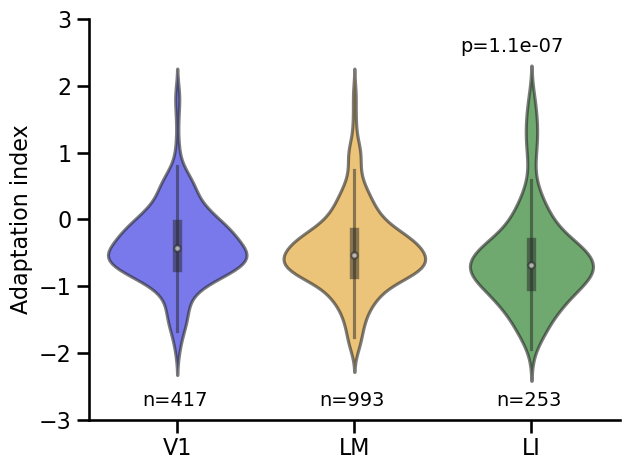

In [120]:
## suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

def adp_in_area(df_filter):

    gb_R1 = df_filter[(df_filter.stim2_id == 0) & (df_filter.resp_id == 'R1')].groupby(['area', 'cell_id']).sum()['dfof'].values
    gb_R2 = df_filter[(df_filter.stim2_id == 0) & (df_filter.resp_id == 'R2')].groupby(['area', 'cell_id']).sum()['dfof'].values
    gb_adp = (gb_R2 - gb_R1) / (gb_R1 + 1e-7)
    gb_adp = gb_adp[np.abs(gb_adp) < 2]

    return gb_adp

df_filter = df_tidy[(df_tidy.isi == 250)
                    & (df_tidy.filter_cell_vis == True)
                    ]
gb_adp_V1 = adp_in_area(df_filter[df_filter.area == 'V1'])
gb_adp_LM = adp_in_area(df_filter[df_filter.area == 'LM'])
gb_adp_LI = adp_in_area(df_filter[df_filter.area == 'LI'])

# plt.hist(gb_adp_V1, bins=50, alpha=.5, label='V1')
# plt.hist(gb_adp_LM, bins=50, alpha=.5, label='LM')
# plt.hist(gb_adp_LI, bins=50, alpha=.5, label='LI')
# plt.legend();

# adp_mean_arr = [np.mean(gb_adp_V1), np.mean(gb_adp_LM), np.mean(gb_adp_LI)]
# adp_med_arr = [np.median(gb_adp_V1), np.median(gb_adp_LM), np.median(gb_adp_LI)]
# adp_sem_arr = [np.std(gb_adp_V1) / np.sqrt(len(gb_adp_V1)), 
#                np.std(gb_adp_LM) / np.sqrt(len(gb_adp_LM)),
#                 np.std(gb_adp_LI) / np.sqrt(len(gb_adp_LI))]
# plt.errorbar([1, 2, 3], adp_mean_arr, yerr=adp_sem_arr, label='mean', alpha=.5)
# plt.errorbar([1, 2, 3], adp_med_arr, yerr=adp_sem_arr, label='median', alpha=.5)
# plt.xticks([1, 2, 3], ['V1', 'LM', 'LI']);
# plt.ylim([-1, 0]);
# plt.legend(frameon=False);

# sns.boxplot(data=[gb_adp_V1, gb_adp_LM, gb_adp_LI], palette='Set2', notch=True, showfliers=False) # dont show the outliers beyond the caps
ax = sns.violinplot(data=[gb_adp_V1, gb_adp_LM, gb_adp_LI], 
                    palette=['blue', 'orange', 'green'], 
                    )
plt.setp(ax.collections, alpha=.6)
plt.setp(ax.lines, alpha=.5);

## ncell in each area
xpos = -0.2
ypos = -2.8
plt.text(xpos, ypos, f'n={len(gb_adp_V1)}', fontsize=14)
plt.text(xpos+1, ypos, f'n={len(gb_adp_LM)}', fontsize=14)
plt.text(xpos+2, ypos, f'n={len(gb_adp_LI)}', fontsize=14)

## p value
_, p_kruskal = stats.kruskal(gb_adp_V1, gb_adp_LM, gb_adp_LI)
plt.text(xpos+1.8, 2.5, 'p={:.1e}'.format(p_kruskal), fontsize=14)

plt.xticks([0, 1, 2], ['V1', 'LM', 'LI'], fontsize=16);
plt.ylim([-3, 3]);
plt.ylabel('Adaptation index', fontsize=16);
sns.despine();
plt.tight_layout();

dir_fig = repo_dir + r'\results\tuning bias'.replace('\\', '/')
plt.savefig(os.path.join(dir_fig, 'adp_by_area_grat8_vis.pdf'))

In [10]:
df_filter.groupby('area').cell_id.nunique()

area
LI     288
LM    1098
V1     460
Name: cell_id, dtype: int64

In [12]:
## kruskal wallis test
print(stats.kruskal(gb_adp_V1, gb_adp_LM, gb_adp_LI))

## mann whitney u test (Wilcoxon rank-sum test)
stats.mannwhitneyu(gb_adp_V1, gb_adp_LM), stats.mannwhitneyu(gb_adp_V1, gb_adp_LI), stats.mannwhitneyu(gb_adp_LM, gb_adp_LI)

KruskalResult(statistic=32.07076345801761, pvalue=1.0862310172432835e-07)


(MannwhitneyuResult(statistic=229899.0, pvalue=0.0010534819327570474),
 MannwhitneyuResult(statistic=66164.0, pvalue=3.3442096917466384e-08),
 MannwhitneyuResult(statistic=144906.0, pvalue=0.00015967155341313323))

## population level adp across area

In [168]:
df_tidy['date_sess'] = df_tidy.date.astype(str) + '_' + df_tidy.sess.astype(str)
df_tidy.date_sess.unique()

array(['200720_003', '200728_003', '200803_002', '201015_004',
       '201209_002', '210120_003', '200721_002', '200729_003',
       '200804_003', '201119_003', '201127_002', '201217_002',
       '201217_004', '210127_002', '210127_003', '210325_002',
       '210805_002', '211020_002', '211020_003', '220228_002',
       '220228_003', '230221_002', '230221_003', '230302_003',
       '230302_004', '230307_002', '230307_003', '230307_004',
       '200723_003', '200806_003', '201202_003', '201202_004',
       '210113_004', '210113_006', '210203_003', '210203_004',
       '210930_002', '210930_003', '211028_002', '211028_003',
       '230110_002', '230110_003', '230228_002', '230228_003',
       '230309_002', '230309_003'], dtype=object)

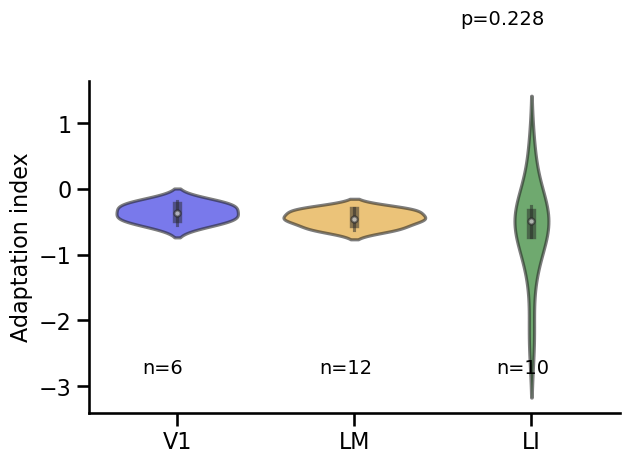

In [179]:
# ## suppress FutureWarning
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

def adp_in_area_pop(df_filter):

    gb_R1 = df_filter[(df_filter.stim2_id == 0) & (df_filter.resp_id == 'R1')].groupby(['mouse']).sum()['dfof'].values
    gb_R2 = df_filter[(df_filter.stim2_id == 0) & (df_filter.resp_id == 'R2')].groupby(['mouse']).sum()['dfof'].values
    gb_adp = (gb_R2 - gb_R1) / (gb_R1 + 1e-7)
    # gb_adp = gb_adp[np.abs(gb_adp) < 2]

    return gb_adp

df_filter = df_tidy[(df_tidy.isi == 250)
                    & (df_tidy.filter_cell_vis == True)
                    ]
gb_adp_V1 = adp_in_area_pop(df_filter[df_filter.area == 'V1'])
gb_adp_LM = adp_in_area_pop(df_filter[df_filter.area == 'LM'])
gb_adp_LI = adp_in_area_pop(df_filter[df_filter.area == 'LI'])

ax = sns.violinplot(data=[gb_adp_V1, gb_adp_LM, gb_adp_LI], 
                    palette=['blue', 'orange', 'green'], 
                    )
plt.setp(ax.collections, alpha=.6)
plt.setp(ax.lines, alpha=.5);

## ncell in each area
xpos = -0.2
ypos = -2.8
plt.text(xpos, ypos, f'n={len(gb_adp_V1)}', fontsize=14)
plt.text(xpos+1, ypos, f'n={len(gb_adp_LM)}', fontsize=14)
plt.text(xpos+2, ypos, f'n={len(gb_adp_LI)}', fontsize=14)

## p value
_, p_kruskal = stats.kruskal(gb_adp_V1, gb_adp_LM, gb_adp_LI)
plt.text(xpos+1.8, 2.5, 'p={:.3f}'.format(p_kruskal), fontsize=14)

plt.xticks([0, 1, 2], ['V1', 'LM', 'LI'], fontsize=16);
# plt.ylim([-3, 3]);
plt.ylabel('Adaptation index', fontsize=16);
sns.despine();
plt.tight_layout();

dir_fig = repo_dir + r'\results\tuning bias'.replace('\\', '/')
# plt.savefig(os.path.join(dir_fig, 'adp_by_area_grat8_vis.pdf'))

In [180]:
## kruskal wallis test
print(stats.kruskal(gb_adp_V1, gb_adp_LM, gb_adp_LI))

## mann whitney u test (Wilcoxon rank-sum test)
stats.mannwhitneyu(gb_adp_V1, gb_adp_LM), stats.mannwhitneyu(gb_adp_V1, gb_adp_LI), stats.mannwhitneyu(gb_adp_LM, gb_adp_LI)

KruskalResult(statistic=2.9534482758620726, pvalue=0.22838462080849378)


(MannwhitneyuResult(statistic=51.0, pvalue=0.1797026502908856),
 MannwhitneyuResult(statistic=44.0, pvalue=0.14710289710289712),
 MannwhitneyuResult(statistic=70.0, pvalue=0.5310451014658126))

## old version adaptation

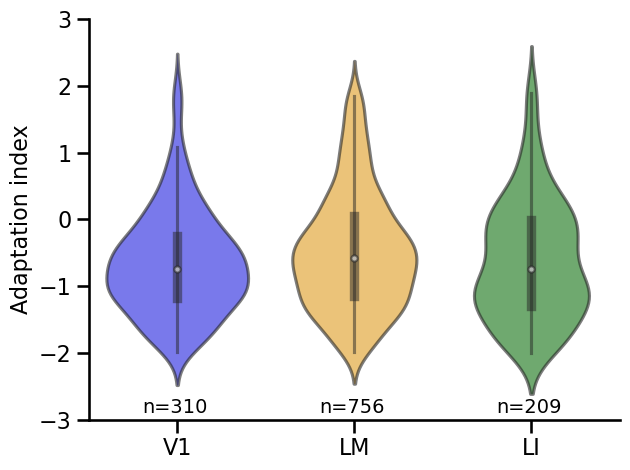

In [122]:
# ## suppress FutureWarning
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

def old_adp_in_area(df_filter, area):

    gb_R1 = (df_filter[(df_filter.area == area) 
                & (df_filter.stim2_id == 0) 
                & (df_filter.resp_id == 'R1')
                ]
            .groupby(['trial_id', 'cell_id']) # each trial_id is a pair of R1-R2
            .dfof.apply(lambda x: x.values[0]) # take dfof value from the only row in each group
            )
    gb_R2 = (df_filter[(df_filter.area == area) 
                & (df_filter.stim2_id == 0) 
                & (df_filter.resp_id == 'R2')
                ]
            .groupby(['trial_id', 'cell_id'])
            .dfof.apply(lambda x: x.values[0])
            )

    gb_adp = (gb_R2 - gb_R1) / (gb_R1 + 1e-7)

    gb = (df_filter[(df_filter.area == area) 
                & (df_filter.stim2_id == 0) 
                & (df_filter.resp_id == 'R1')
                ]
            .groupby(['trial_id', 'cell_id'])
            .dfof.sum().to_frame() # not used, just providing index
            )
    gb['adp'] = gb_adp
    gb = gb.drop(columns='dfof').reset_index()
    adp_cell = gb.groupby('cell_id').adp.mean().values
    adp_cell = adp_cell[np.abs(adp_cell) < 2]

    return adp_cell


df_filter = df_tidy[(df_tidy.isi == 250)
                    & (df_tidy.filter_cell_vis == True)
                    ]
gb_adp_V1 = old_adp_in_area(df_filter, 'V1')
gb_adp_LM = old_adp_in_area(df_filter, 'LM')
gb_adp_LI = old_adp_in_area(df_filter, 'LI')


ax = sns.violinplot(data=[gb_adp_V1, gb_adp_LM, gb_adp_LI], 
                    palette=['blue', 'orange', 'green'], 
                    )
plt.setp(ax.collections, alpha=.6)
plt.setp(ax.lines, alpha=.5);

## ncell in each area
xpos = -0.2
ypos = -2.9
plt.text(xpos, ypos, f'n={len(gb_adp_V1)}', fontsize=14)
plt.text(xpos+1, ypos, f'n={len(gb_adp_LM)}', fontsize=14)
plt.text(xpos+2, ypos, f'n={len(gb_adp_LI)}', fontsize=14)

# ## p value
# _, p_kruskal = stats.kruskal(gb_adp_V1, gb_adp_LM, gb_adp_LI)
# plt.text(xpos+1.8, 2.5, 'p={:.1e}'.format(p_kruskal), fontsize=14)

plt.xticks([0, 1, 2], ['V1', 'LM', 'LI'], fontsize=16);
plt.ylim([-3, 3]);
plt.ylabel('Adaptation index', fontsize=16);
sns.despine();
plt.tight_layout();

dir_fig = repo_dir + r'\results\tuning bias'.replace('\\', '/')
plt.savefig(os.path.join(dir_fig, 'old_ver_adp_by_area_grat8_vis.pdf'))

# tuning bias crude max-ori

## filter cell well-max

11

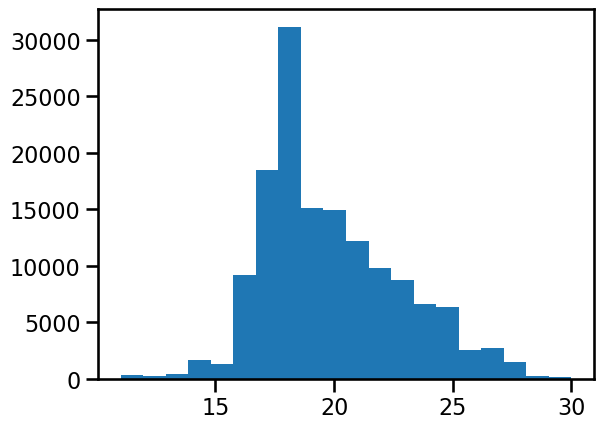

In [13]:
df_nrep = (df_tidy[df_tidy.resp_id == 'R2'] # only R2 has diff ori
            [['dfof', 'cell_id', 'resp_id', 'isi', 'stim2_id']]
              .groupby(['cell_id', 'isi', 'stim2_id']).count() # count trials per cell, isi, ori
            )
plt.hist(df_nrep.values.flatten(), bins=20);
min(df_nrep.values.flatten())

In [15]:
## construct tuning_vec column

max_ori_bootstrap = np.array([])
nboot = 50

for iboot in tqdm(range(nboot)):
    max_ori = (df_tidy[df_tidy.resp_id == 'R2'] # only R2 has diff ori
                [['dfof', 'cell_id', 'resp_id', 'isi', 'stim2_id']]
                .groupby(['cell_id', 'isi', 'stim2_id'])
                .sample(frac=.7, random_state=iboot) # sample x trials per group. min rep = 48
                .groupby(['cell_id', 'isi', 'stim2_id'])
                .agg({'dfof': 'mean'}) # aggregate resp by cell, isi, ori
                .groupby(['cell_id', 'isi']).apply(lambda x: np.argmax(x)) # get ori with max resp
                .reset_index() # NOTE: due to prev groupby, cell_id and isi are in order
                .rename(columns={0: 'max_ori'}).max_ori.values
                )
    max_ori_bootstrap = np.append(max_ori_bootstrap, max_ori)

100%|██████████| 50/50 [09:00<00:00, 10.80s/it]


In [16]:
max_ori_bootstrap = max_ori_bootstrap.reshape(nboot, -1) # reshape max_ori_bootstrap to: nboot x (ncell x nisi)

## sort max_ori_bootstrap in each col (across boots)
max_ori_bootstrap = np.sort(max_ori_bootstrap, axis=0)
# sns.heatmap(max_ori_bootstrap[:, 10:30], cmap='viridis', cbar=True, annot=True);

## count the most freq value in each col (across boots)
max_ori_mode = stats.mode(max_ori_bootstrap, axis=0)[0][0]
max_ori_mode_freq = stats.mode(max_ori_bootstrap, axis=0)[1][0]
filter_cell_well_max = (max_ori_mode_freq >= nboot * 0.7) # NOTE: strictness of well-max can be adjusted here

# ## query values at ith and (100-i)th percentile to see if their diff > 1
# percentile = 5 # NOTE: strictness of well-max can be adjusted here
# max_ori_boot_low = np.percentile(max_ori_bootstrap, percentile, axis=0)
# max_ori_boot_high = np.percentile(max_ori_bootstrap, 100-percentile, axis=0)
# max_ori_boot_var = max_ori_boot_high - max_ori_boot_low
# max_ori_boot_var.shape # df_tidy.cell_id.nunique() x df_tidy.isi.nunique() = 160 x 3

# ## use max_ori_boot_var to get filter_cell_well_max
# filter_cell_well_max = ((max_ori_boot_var <= 1) | (max_ori_boot_var == 7)) # 7 is equivalent to 1, due to circularity. NOTE: strictness of well-max can be adjusted here too
# # plt.plot(max_ori_boot_var[10:30], color='k');
# # plt.plot(filter_cell_well_max[10:30], color='r');

## merge filter_cell_well_max with df
df_well_max = (df_tidy[df_tidy.resp_id == 'R2'][['cell_id', 'isi']]
                .groupby(['cell_id', 'isi'])
                .first() # get first trial per cell, isi
                .reset_index() # due to prev groupby, cell_id and isi are in the same order as max_ori
                )
df_well_max['filter_cell_well_max'] = filter_cell_well_max
# df_well_max.filter_cell_well_max.sum() / df_well_max.shape[0]
df_well_max

C:\Users\lan\AppData\Local\Temp\6\ipykernel_1864\3558592134.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  max_ori_mode = stats.mode(max_ori_bootstrap, axis=0)[0][0]
C:\Users\lan\AppData\Local\Temp\6\ipykernel_1864\3558592134.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

,cell_id,isi,filter_cell_well_max
0,200720_003_0,250,False
1,200720_003_0,750,True
2,200720_003_0,6000,False
3,200720_003_1,250,True
4,200720_003_1,750,False
...,...,...,...
8962,230309_003_8,750,False
8963,230309_003_8,6000,True
8964,230309_003_9,250,True
8965,230309_003_9,750,False


In [17]:
## inherit df_well_max['filter_cell_well_max']
df_tidy = df_tidy.merge(
      df_well_max, 
      on=['cell_id', 'isi'], how='left') # take filter_cell_well_max from df_well_max, for each cell and isi
df_tidy

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,ori_pref_ad_750,ori_pref_ad_250,ori_pref_noad1,ori_pref_noad2,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,filter_cell_well_max
0,-0.003253,200720_003_0,0,R1,750,1,5,V1,0,True,...,71.987028,71.465895,106.324995,76.532412,True,True,1323,200720,003,True
1,0.088726,200720_003_0,1,R1,250,1,2,V1,0,True,...,71.987028,71.465895,106.324995,76.532412,True,True,1323,200720,003,False
2,-0.010485,200720_003_0,2,R1,250,1,2,V1,0,True,...,71.987028,71.465895,106.324995,76.532412,True,True,1323,200720,003,False
3,-0.050493,200720_003_0,3,R1,750,1,3,V1,0,True,...,71.987028,71.465895,106.324995,76.532412,True,True,1323,200720,003,True
4,0.052611,200720_003_0,5,R1,750,1,0,V1,0,True,...,71.987028,71.465895,106.324995,76.532412,True,True,1323,200720,003,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413843,0.074167,230309_003_32,473,R2,750,1,6,LI,0,False,...,157.942666,3.533193,156.854627,107.836194,True,False,1381,230309,003,False
2413844,-0.023736,230309_003_32,474,R2,750,1,0,LI,0,False,...,157.942666,3.533193,156.854627,107.836194,True,False,1381,230309,003,False
2413845,0.060245,230309_003_32,475,R2,250,1,1,LI,0,False,...,157.942666,3.533193,156.854627,107.836194,True,False,1381,230309,003,True
2413846,0.009333,230309_003_32,476,R2,6000,0,2,LI,0,False,...,157.942666,3.533193,156.854627,107.836194,True,False,1381,230309,003,False


## pref_ori for cell, no adapter or with adapter
crude preference: take max-resp orientation as the preferred orien

In [19]:
pref_ori_noad = (df_tidy[(df_tidy.resp_id == 'R2') & (df_tidy.isi == 6000)]
                .groupby(['cell_id', 'stim2_id'])
                [['dfof']].sum().reset_index()
                .groupby('cell_id') # NOTE: stim2_id is sorted due to prev groupby
                ['dfof'].apply(list).to_frame()
                .dfof.apply(lambda x: np.argmax(x)).to_frame()
                .rename(columns={'dfof': 'pref_ori_noad'})
                )

pref_ori_ad_250 = (df_tidy[(df_tidy.resp_id == 'R2') & (df_tidy.isi == 250)]
                .groupby(['cell_id', 'stim2_id'])
                [['dfof']].sum().reset_index()
                .groupby('cell_id') # NOTE: stim2_id is sorted due to prev groupby
                ['dfof'].apply(list).to_frame()
                .dfof.apply(lambda x: np.argmax(x)).to_frame()
                .rename(columns={'dfof': 'pref_ori_ad_250'})
                )

pref_ori_ad_750 = (df_tidy[(df_tidy.resp_id == 'R2') & (df_tidy.isi == 750)]
                .groupby(['cell_id', 'stim2_id'])
                [['dfof']].sum().reset_index()
                .groupby('cell_id') # NOTE: stim2_id is sorted due to prev groupby
                ['dfof'].apply(list).to_frame()
                .dfof.apply(lambda x: np.argmax(x)).to_frame()
                .rename(columns={'dfof': 'pref_ori_ad_750'})
                )

df_tidy = (df_tidy.merge(pref_ori_noad, on='cell_id')
            .merge(pref_ori_ad_250, on='cell_id')
            .merge(pref_ori_ad_750, on='cell_id'))
df_tidy

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,ori_pref_noad2,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,filter_cell_well_max,pref_ori_noad,pref_ori_ad_250,pref_ori_ad_750
0,-0.003253,200720_003_0,0,R1,750,1,5,V1,0,True,...,76.532412,True,True,1323,200720,003,True,4,3,3
1,0.088726,200720_003_0,1,R1,250,1,2,V1,0,True,...,76.532412,True,True,1323,200720,003,False,4,3,3
2,-0.010485,200720_003_0,2,R1,250,1,2,V1,0,True,...,76.532412,True,True,1323,200720,003,False,4,3,3
3,-0.050493,200720_003_0,3,R1,750,1,3,V1,0,True,...,76.532412,True,True,1323,200720,003,True,4,3,3
4,0.052611,200720_003_0,5,R1,750,1,0,V1,0,True,...,76.532412,True,True,1323,200720,003,True,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413843,0.074167,230309_003_32,473,R2,750,1,6,LI,0,False,...,107.836194,True,False,1381,230309,003,False,5,0,7
2413844,-0.023736,230309_003_32,474,R2,750,1,0,LI,0,False,...,107.836194,True,False,1381,230309,003,False,5,0,7
2413845,0.060245,230309_003_32,475,R2,250,1,1,LI,0,False,...,107.836194,True,False,1381,230309,003,True,5,0,7
2413846,0.009333,230309_003_32,476,R2,6000,0,2,LI,0,False,...,107.836194,True,False,1381,230309,003,False,5,0,7


In [20]:
def bin_ori(x):
    # bin pref ori to 0, 45, 90
    if x < 30:
        return 0
    elif x <= 60:
        return 45
    else:
        return 90

def distace_from_adapter(x):
    # adapter is always 0 deg
    x = 22.5*x # convert from stim id int to degree
    if x > 90:
        x = 180 - x
    return x


df_tidy['pref_unadapted_distance'] = df_tidy['pref_ori_noad'].apply(lambda x: distace_from_adapter(x)) # unadapted pref ori, distance from adapter
df_tidy['pref_unadapted_distance_bin'] = df_tidy['pref_unadapted_distance'].apply(lambda x: bin_ori(x)) # bin the distance to 0, 45, 90

df_tidy.loc[(df_tidy.isi == 250), 'pref_adapted_distance'] = df_tidy['pref_ori_ad_250'].apply(lambda x: distace_from_adapter(x)) # isi 250 adapted pref ori, distance from adapter # TODO: refactor pref_ori_ad_250 similarly, so it's only one column of pref_ori_ad, but can filter by isi
df_tidy.loc[(df_tidy.isi == 750), 'pref_adapted_distance'] = df_tidy['pref_ori_ad_750'].apply(lambda x: distace_from_adapter(x)) # isi 750 adapted pref ori, distance from adapter

df_tidy['tuning_bias'] = df_tidy['pref_adapted_distance'] - df_tidy['pref_unadapted_distance'] # distance from adapter, adapted - unadapted. if tuning repelled from adapter, this is positive; attracted, negative

# dir_data = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter\df tidy for plots/'.replace('\\', '/')
# df_tidy.to_csv(os.path.join(dir_data, 'df_tidy_tuning_bias_nofit.csv'), index=False)

df_tidy.sample(5)

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,date,sess,filter_cell_well_max,pref_ori_noad,pref_ori_ad_250,pref_ori_ad_750,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias
1512253,0.046347,230302_004_26,389,R2,6000,0,2,LM,0,True,...,230302,004,False,1,1,1,22.5,0,NaN,NaN
1627158,0.022536,230307_002_20,444,R1,250,1,5,LM,0,True,...,230307,002,False,3,4,3,67.5,90,90.0,22.5
195151,-0.017614,200803_002_52,93,R2,250,1,2,V1,0,True,...,200803,002,True,2,2,2,45.0,45,45.0,0.0
2251305,0.027210,230228_003_20,234,R2,6000,0,6,LI,0,True,...,230228,003,False,6,1,7,45.0,45,NaN,NaN
373589,-0.018160,201209_002_99,279,R2,250,1,1,V1,0,True,...,201209,002,False,1,7,0,22.5,0,22.5,0.0


## tuning bias plot no fit

In [124]:
df_filter = df_tidy[(df_tidy.filter_cell_vis == True) 
                    & (df_tidy.filter_cell_well_max == True)
                    # & (df_tidy.filter_cell_stim == True)
                    & (df_tidy.isi == 250)
                    ]
df_filter = df_filter.groupby('cell_id').first().reset_index() # drop duplicate cell_id
df_filter.groupby('area').cell_id.nunique()

area
LI    137
LM    598
V1    290
Name: cell_id, dtype: int64

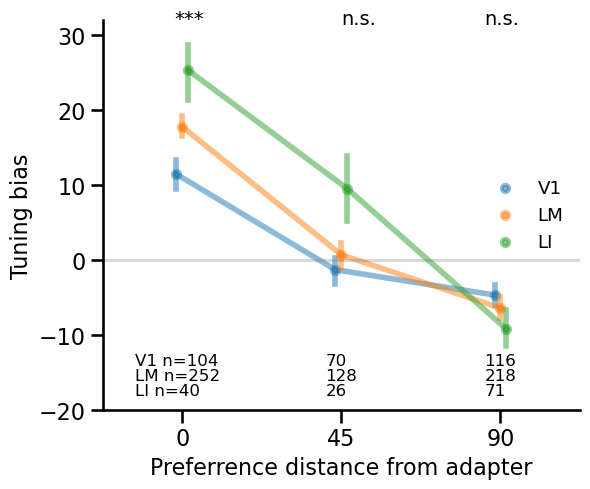

In [151]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
ax = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias', data=df_filter, hue='area',
                   dodge=True, markers='.', 
                   errorbar=('ci', 68), #errwidthfloat=1, capsize=.1,
                   )

ax.text(0.15, 0.99, '***', transform=ax.transAxes, fontsize=14)
ax.text(0.5, 0.99, 'n.s.', transform=ax.transAxes, fontsize=14)
ax.text(0.8, 0.99, 'n.s.', transform=ax.transAxes, fontsize=14)

## ncell in each area for each bin
jitter_large = 0.3
jitter_small = 0.1
y_text = -14
ax.text(-jitter_large, y_text, f'V1 n={df_filter[(df_filter.area == "V1") & (df_filter.pref_unadapted_distance_bin == 0)].cell_id.nunique()}', fontsize=12)
ax.text(1-jitter_small, y_text, f'{df_filter[(df_filter.area == "V1") & (df_filter.pref_unadapted_distance_bin == 45)].cell_id.nunique()}', fontsize=12)
ax.text(2-jitter_small, y_text, f'{df_filter[(df_filter.area == "V1") & (df_filter.pref_unadapted_distance_bin == 90)].cell_id.nunique()}', fontsize=12)
ax.text(-jitter_large, y_text-2, f'LM n={df_filter[(df_filter.area == "LM") & (df_filter.pref_unadapted_distance_bin == 0)].cell_id.nunique()}', fontsize=12)
ax.text(1-jitter_small, y_text-2, f'{df_filter[(df_filter.area == "LM") & (df_filter.pref_unadapted_distance_bin == 45)].cell_id.nunique()}', fontsize=12)
ax.text(2-jitter_small, y_text-2, f'{df_filter[(df_filter.area == "LM") & (df_filter.pref_unadapted_distance_bin == 90)].cell_id.nunique()}', fontsize=12)
ax.text(-jitter_large, y_text-4, f'LI n={df_filter[(df_filter.area == "LI") & (df_filter.pref_unadapted_distance_bin == 0)].cell_id.nunique()}', fontsize=12)
ax.text(1-jitter_small, y_text-4, f'{df_filter[(df_filter.area == "LI") & (df_filter.pref_unadapted_distance_bin == 45)].cell_id.nunique()}', fontsize=12)
ax.text(2-jitter_small, y_text-4, f'{df_filter[(df_filter.area == "LI") & (df_filter.pref_unadapted_distance_bin == 90)].cell_id.nunique()}', fontsize=12)

plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.5);
plt.axhline(0, color='gray', linestyle='-', alpha=.3);
plt.legend(frameon=False, loc='right');
plt.xlabel('Preferrence distance from adapter', fontsize=16);
plt.ylabel('Tuning bias', fontsize=16);
plt.ylim([-20, 32]);
sns.despine();
plt.tight_layout();

plt.savefig(os.path.join(dir_fig, 'tuning_bias_nofit_by_area_grat8_vis_wellmax_ncell.pdf'))

In [133]:
(df_filter
    # .sort_values(by='area')
    # .sort_values(by='pref_unadapted_distance_bin')
    .groupby(['area', 'pref_unadapted_distance_bin'], 
            #  sort=False
             )
    .cell_id.nunique())

area  pref_unadapted_distance_bin
LI    0                               40
      45                              26
      90                              71
LM    0                              252
      45                             128
      90                             218
V1    0                              104
      45                              70
      90                             116
Name: cell_id, dtype: int64

In [53]:
bias_0_V1 = df_filter[(df_filter.pref_unadapted_distance_bin == 0) & (df_filter.area == 'V1')].tuning_bias.values
bias_0_LM = df_filter[(df_filter.pref_unadapted_distance_bin == 0) & (df_filter.area == 'LM')].tuning_bias.values
bias_0_LI = df_filter[(df_filter.pref_unadapted_distance_bin == 0) & (df_filter.area == 'LI')].tuning_bias.values
print(stats.kruskal(bias_0_V1, bias_0_LM, bias_0_LI))

bias_45_V1 = df_filter[(df_filter.pref_unadapted_distance_bin == 45) & (df_filter.area == 'V1')].tuning_bias.values
bias_45_LM = df_filter[(df_filter.pref_unadapted_distance_bin == 45) & (df_filter.area == 'LM')].tuning_bias.values
bias_45_LI = df_filter[(df_filter.pref_unadapted_distance_bin == 45) & (df_filter.area == 'LI')].tuning_bias.values
print(stats.kruskal(bias_45_V1, bias_45_LM, bias_45_LI))

bias_90_V1 = df_filter[(df_filter.pref_unadapted_distance_bin == 90) & (df_filter.area == 'V1')].tuning_bias.values
bias_90_LM = df_filter[(df_filter.pref_unadapted_distance_bin == 90) & (df_filter.area == 'LM')].tuning_bias.values
bias_90_LI = df_filter[(df_filter.pref_unadapted_distance_bin == 90) & (df_filter.area == 'LI')].tuning_bias.values
print(stats.kruskal(bias_90_V1, bias_90_LM, bias_90_LI))

KruskalResult(statistic=17.985508940970647, pvalue=0.00012430722066773063)
KruskalResult(statistic=4.627895691057419, pvalue=0.09887015597193646)
KruskalResult(statistic=3.1529742971933032, pvalue=0.20669993048633928)


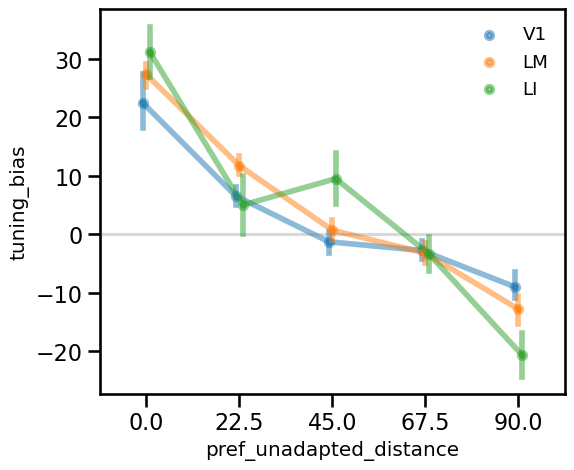

In [23]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5), sharey=True)
ax = sns.pointplot(x='pref_unadapted_distance', y='tuning_bias', data=df_filter, hue='area',
                   dodge=True, markers='.', 
                   errorbar=('ci', 68), #errwidthfloat=1, capsize=.1,
                   )
plt.setp(ax.collections, alpha=.5);
plt.setp(ax.lines, alpha=.5);
plt.axhline(0, color='gray', linestyle='-', alpha=.3);
plt.legend(frameon=False);

In [26]:
df_filter.groupby(['area', 'pref_unadapted_distance']).cell_id.nunique()

area  pref_unadapted_distance
LI    0.0                         31
      22.5                         9
      45.0                        26
      67.5                        47
      90.0                        24
LM    0.0                         97
      22.5                       155
      45.0                       128
      67.5                       146
      90.0                        72
V1    0.0                         32
      22.5                        72
      45.0                        70
      67.5                        81
      90.0                        35
Name: cell_id, dtype: int64

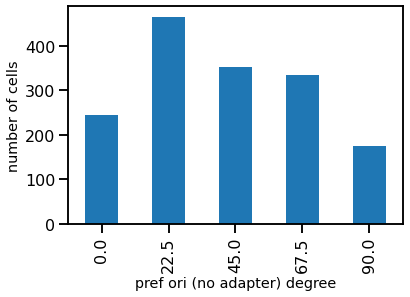

In [ ]:
# df_filter.groupby('pref_unadapted_distance').cell_id.nunique().sort_index().plot(kind='bar')
# # plt.xticks(np.arange(0, 5, 1), np.arange(0, 90+22.5, 22.5), rotation=45)
# plt.xlabel('pref ori (no adapter) degree')
# plt.ylabel('number of cells');

# tuning bias preprocessing
x: distance(pref_ori_unadapted, 0 deg adapter_ori).binned  
y: distance(pref_ori_unadapted, 0 deg) - distance(pref_ori_adapted, 0 deg)

## pref_ori for cell & isi
~~crude preference: take max-resp orientation as the preferred orien~~  
fitted preference: use pref from von mises curve fit

In [10]:
def bin_ori(x):
    # bin pref ori to 0, 45, 90
    if x < 30:
        return 0
    elif x <= 60:
        return 45
    else:
        return 90

def bin_ori_finer(x):
    # bin pref ori to n bins, with equal bin width
    nbin = 4 # n_edge = nbin + 1
    bin_width = 90 / nbin
    return (x // bin_width) * bin_width

def distance_from_adapter(x):
    # adapter is always 0 deg
    # x = 22.5*x # convert from stim id int to degree
    if x > 90:
        x = 180 - x
    return x


df_tidy['pref_unadapted_distance'] = df_tidy['ori_pref_noad'].apply(lambda x: distance_from_adapter(x)) # unadapted pref ori, distance from adapter
df_tidy['pref_unadapted_distance_bin'] = df_tidy['pref_unadapted_distance'].apply(lambda x: bin_ori(x)) # bin the distance to 0, 45, 90
# df_tidy['pref_unadapted_distance_bin'] = df_tidy['pref_unadapted_distance'].apply(lambda x: bin_ori_finer(x)) # bin the distance to 5 edges, 0, 22.5, 45, 67.5, 90

df_tidy.loc[(df_tidy.isi == 250), 'pref_adapted_distance'] = df_tidy['ori_pref_ad_250'].apply(lambda x: distance_from_adapter(x)) # isi 250 adapted pref ori, distance from adapter # TODO: refactor pref_ori_ad_250 similarly, so it's only one column of pref_ori_ad, but can filter by isi
df_tidy.loc[(df_tidy.isi == 750), 'pref_adapted_distance'] = df_tidy['ori_pref_ad_750'].apply(lambda x: distance_from_adapter(x)) # isi 750 adapted pref ori, distance from adapter
df_tidy['tuning_bias'] = df_tidy['pref_adapted_distance'] - df_tidy['pref_unadapted_distance'] # distance from adapter, adapted - unadapted. if tuning repelled from adapter, this is positive; attracted, negative

df_tidy.sample(5, random_state=0)

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,ori_pref_noad2,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias
1535086,0.240415,230302_004_131,195,R1,250,1,6,LM,0,True,...,120.626840,False,False,1373,230302,004,22.411221,0,88.885041,66.473820
1498362,0.018307,230302_004_25,274,R1,750,1,6,LM,0,True,...,81.351494,True,False,1373,230302,004,58.724983,45,53.278383,-5.446600
10251,0.200723,200720_003_31,432,R1,250,1,7,V1,0,True,...,120.642231,False,True,1323,200720,003,43.627369,45,51.436862,7.809493
26153,-0.088930,200720_003_81,217,R1,250,1,3,V1,0,True,...,157.858841,True,False,1323,200720,003,26.301962,0,25.532079,-0.769883
1794444,-0.057807,230307_004_76,294,R1,750,1,0,LM,0,False,...,157.510524,False,True,1381,230307,004,44.647932,45,25.656653,-18.991279


In [11]:
df_control = df_tidy.copy()

df_control['pref_unadapted_distance'] = df_control['ori_pref_noad1'].apply(lambda x: distance_from_adapter(x)) # unadapted pref ori, distance from adapter
df_control['pref_unadapted_distance_bin'] = df_control['pref_unadapted_distance'].apply(lambda x: bin_ori(x)) # bin the distance to 0, 45, 90
# df_control['pref_unadapted_distance_bin'] = df_control['pref_unadapted_distance'].apply(lambda x: bin_ori_finer(x))

df_control['pref_adapted_distance'] = df_control['ori_pref_noad2'].apply(lambda x: distance_from_adapter(x))
df_control['tuning_bias'] = df_control['pref_adapted_distance'] - df_control['pref_unadapted_distance']

df_control.sample(5, random_state=0)

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,ori_pref_noad2,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias
1535086,0.240415,230302_004_131,195,R1,250,1,6,LM,0,True,...,120.626840,False,False,1373,230302,004,22.411221,0,59.373160,36.961939
1498362,0.018307,230302_004_25,274,R1,750,1,6,LM,0,True,...,81.351494,True,False,1373,230302,004,58.724983,45,81.351494,22.626511
10251,0.200723,200720_003_31,432,R1,250,1,7,V1,0,True,...,120.642231,False,True,1323,200720,003,43.627369,45,59.357769,15.730399
26153,-0.088930,200720_003_81,217,R1,250,1,3,V1,0,True,...,157.858841,True,False,1323,200720,003,26.301962,0,22.141159,-4.160803
1794444,-0.057807,230307_004_76,294,R1,750,1,0,LM,0,False,...,157.510524,False,True,1381,230307,004,44.647932,45,22.489476,-22.158456


## merge df real vs control

In [12]:
assert len(df_tidy) == len(df_control) # same number of rows
assert (df_tidy.columns == df_control.columns).all() # all columns are the same
assert np.sum(df_control['pref_unadapted_distance_bin'].values == df_tidy['pref_unadapted_distance_bin'].values) == len(df_tidy) # same pref_unadapted_distance_bin due to ori_pref_noad1 == ori_pref_noad
assert np.sum(df_tidy.tuning_bias.values == df_control.tuning_bias.values) < len(df_tidy) # different tuning bias
print('for tuning bias plot, only tuning bias col differs between control and real df')

for tuning bias plot, only tuning bias col differs between control and real df


In [13]:
df_tidy['tuning_bias_control'] = df_control['tuning_bias']
df_tidy

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias,tuning_bias_control
0,-0.003253,200720_003_0,0,R1,750,1,5,V1,0,True,...,True,True,1323,200720,003,73.675005,90,71.987028,-1.687976,2.857408
1,0.088726,200720_003_0,1,R1,250,1,2,V1,0,True,...,True,True,1323,200720,003,73.675005,90,71.465895,-2.209110,2.857408
2,-0.010485,200720_003_0,2,R1,250,1,2,V1,0,True,...,True,True,1323,200720,003,73.675005,90,71.465895,-2.209110,2.857408
3,-0.050493,200720_003_0,3,R1,750,1,3,V1,0,True,...,True,True,1323,200720,003,73.675005,90,71.987028,-1.687976,2.857408
4,0.052611,200720_003_0,5,R1,750,1,0,V1,0,True,...,True,True,1323,200720,003,73.675005,90,71.987028,-1.687976,2.857408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413843,0.074167,230309_003_32,473,R2,750,1,6,LI,0,False,...,True,False,1381,230309,003,23.145373,0,22.057334,-1.088039,49.018433
2413844,-0.023736,230309_003_32,474,R2,750,1,0,LI,0,False,...,True,False,1381,230309,003,23.145373,0,22.057334,-1.088039,49.018433
2413845,0.060245,230309_003_32,475,R2,250,1,1,LI,0,False,...,True,False,1381,230309,003,23.145373,0,3.533193,-19.612180,49.018433
2413846,0.009333,230309_003_32,476,R2,6000,0,2,LI,0,False,...,True,False,1381,230309,003,23.145373,0,NaN,NaN,49.018433


## save & reload

In [15]:
dir_df = r'\\duhs-user-nc1.dhe.duke.edu\dusom_glickfeldlab\All_Staff\home\lan\Data\2P_images\mat_inter\df tidy for plots/'.replace('\\', '/')
csv_filename = dir_df + 'df_tidy_tuning_bias_diff_exclude_bad_LI.csv'

# chunks = np.array_split(df_tidy.index, 100) # split into 100 chunks
# for chunk, subset in enumerate(tqdm(chunks)):
#     if chunk == 0: # first row
#         df_tidy.loc[subset].to_csv(csv_filename, mode='w', index=True)
#     else:
#         df_tidy.loc[subset].to_csv(csv_filename, header=None, mode='a', index=True)

df_tidy = pd.read_csv(os.path.join(dir_df, csv_filename), index_col=0) # this csv excludes bad LI data
df_tidy

,dfof,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,...,filter_cell_well_fit_ad_250,filter_cell_well_fit_ad_750,mouse,date,sess,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias,tuning_bias_control
0,-0.003253,200720_003_0,0,R1,750,1,5,V1,0,True,...,True,True,1323,200720,3,73.675005,90,71.987028,-1.687976,2.857408
1,0.088726,200720_003_0,1,R1,250,1,2,V1,0,True,...,True,True,1323,200720,3,73.675005,90,71.465895,-2.209110,2.857408
2,-0.010485,200720_003_0,2,R1,250,1,2,V1,0,True,...,True,True,1323,200720,3,73.675005,90,71.465895,-2.209110,2.857408
3,-0.050493,200720_003_0,3,R1,750,1,3,V1,0,True,...,True,True,1323,200720,3,73.675005,90,71.987028,-1.687976,2.857408
4,0.052611,200720_003_0,5,R1,750,1,0,V1,0,True,...,True,True,1323,200720,3,73.675005,90,71.987028,-1.687976,2.857408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413843,0.074167,230309_003_32,473,R2,750,1,6,LI,0,False,...,True,False,1381,230309,3,23.145373,0,22.057334,-1.088039,49.018433
2413844,-0.023736,230309_003_32,474,R2,750,1,0,LI,0,False,...,True,False,1381,230309,3,23.145373,0,22.057334,-1.088039,49.018433
2413845,0.060245,230309_003_32,475,R2,250,1,1,LI,0,False,...,True,False,1381,230309,3,23.145373,0,3.533193,-19.612180,49.018433
2413846,0.009333,230309_003_32,476,R2,6000,0,2,LI,0,False,...,True,False,1381,230309,3,23.145373,0,NaN,NaN,49.018433


## if use all trials, not half trials

In [31]:
df_tidy_all_trials = pd.read_csv(os.path.join(dir_df, 'df_tidy_tuning_bias.csv'), index_col=0)
df_tidy_control_all_trials = pd.read_csv(os.path.join(dir_df, 'df_tidy_tuning_bias_control.csv'), index_col=0)

In [36]:
assert len(df_tidy_all_trials) == len(df_tidy_control_all_trials) # same number of rows
assert (df_tidy_all_trials.columns == df_tidy_control_all_trials.columns).all() # all columns are the same
# assert np.sum(df_tidy_control_all_trials['pref_unadapted_distance_bin'].values == df_tidy_all_trials['pref_unadapted_distance_bin'].values) == len(df_tidy_all_trials) # same pref_unadapted_distance_bin due to ori_pref_noad1 == ori_pref_noad
assert np.sum(df_tidy_all_trials.tuning_bias.values == df_tidy_control_all_trials.tuning_bias.values) < len(df_tidy_all_trials) # different tuning bias
print('for tuning bias plot, only tuning bias and pref_unadapted_distance_bin differs between control and real df')
df_tidy_all_trials['tuning_bias_control'] = df_tidy_control_all_trials['tuning_bias']
df_tidy_all_trials['pref_unadapted_distance_bin_control'] = df_tidy_control_all_trials['pref_unadapted_distance_bin']
df_tidy_all_trials

for tuning bias plot, only tuning bias and pref_unadapted_distance_bin differs between control and real df


,cell_id,trial_id,resp_id,isi,stim1_contrast,stim2_id,area,stim1_id,filter_cell_vis,filter_cell_well_fit,...,filter_cell_well_fit_ad_750,mouse,date,sess,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias,tuning_bias_control,pref_unadapted_distance_bin_control
dfof,,,,,,,,,,,,,,,,,,,,,
-0.003253,200720_003_0,0,R1,750,1,5,V1,0,True,1.0,...,True,1323,200720,3,82.347391,90,73.637094,-8.710298,-1.662357,90
0.088726,200720_003_0,1,R1,250,1,2,V1,0,True,1.0,...,True,1323,200720,3,82.347391,90,68.247541,-14.099850,-1.662357,90
-0.010485,200720_003_0,2,R1,250,1,2,V1,0,True,1.0,...,True,1323,200720,3,82.347391,90,68.247541,-14.099850,-1.662357,90
-0.050493,200720_003_0,3,R1,750,1,3,V1,0,True,1.0,...,True,1323,200720,3,82.347391,90,73.637094,-8.710298,-1.662357,90
0.052611,200720_003_0,5,R1,750,1,0,V1,0,True,1.0,...,True,1323,200720,3,82.347391,90,73.637094,-8.710298,-1.662357,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.056616,230323_003_64,496,R2,6000,0,5,LI,0,False,0.0,...,False,1374,230323,3,7.524045,0,NaN,NaN,32.539719,0
0.077247,230323_003_64,497,R2,6000,0,6,LI,0,False,0.0,...,False,1374,230323,3,7.524045,0,NaN,NaN,32.539719,0
0.026982,230323_003_64,498,R2,250,1,6,LI,0,False,0.0,...,False,1374,230323,3,7.524045,0,31.946264,24.422218,32.539719,0


In [40]:
df_filter = df_tidy_all_trials[(df_tidy_all_trials.trial_id > -1) # placeholder, always true
                            & (df_tidy_all_trials.filter_cell_vis == True)
                            & (df_tidy_all_trials.filter_cell_well_fit == True)
                            & (df_tidy_all_trials.isi == 250)
                            ]
df_filter = df_filter.groupby('cell_id')[['area', 'pref_unadapted_distance_bin', 'pref_unadapted_distance_bin_control', 'tuning_bias', 'tuning_bias_control']].first().reset_index()
df_filter['tuning_bias_diff'] = df_filter['tuning_bias'] - df_filter['tuning_bias_control']
df_filter

,cell_id,area,pref_unadapted_distance_bin,pref_unadapted_distance_bin_control,tuning_bias,tuning_bias_control,tuning_bias_diff
0,200720_003_0,V1,90,90,-14.099850,-1.662357,-12.437493
1,200720_003_2,V1,90,90,-6.375618,0.529648,-6.905266
2,200720_003_22,V1,90,90,7.036726,0.703476,6.333250
3,200720_003_24,V1,0,0,14.101941,2.149425,11.952516
4,200720_003_25,V1,90,90,6.757597,1.970022,4.787575
...,...,...,...,...,...,...,...
632,230307_004_26,LM,0,0,4.357937,-8.113508,12.471445
633,230307_004_45,LM,45,45,-30.671126,5.708120,-36.379246
634,230307_004_47,LM,0,0,-15.573513,-7.068267,-8.505246
635,230309_002_44,LI,90,90,-50.296272,-1.398636,-48.897635


### tuning bias plot (all trials)

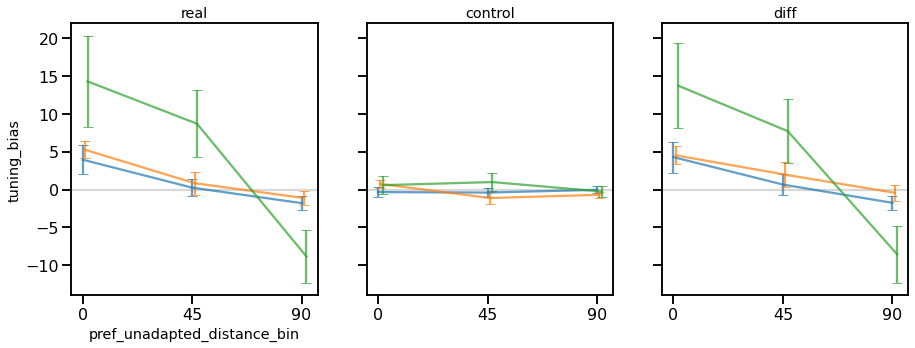

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
jitter = 1
for i, iarea in enumerate(df_filter.area.unique()):
    axes[0].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias.mean(), 
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias.sem(), 
                    capsize=5, alpha=.7)


    axes[1].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin_control.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_control.mean(),
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_control.sem(),
                    capsize=5, alpha=.7)
    
    axes[2].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias.mean() - df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_control.mean(),
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_diff.sem(),
                    capsize=5, alpha=.7)

axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[2].axhline(0, color='gray', linestyle='-', alpha=.3);

axes[0].set_title('real')
axes[0].set_xlabel('pref_unadapted_distance_bin')
axes[0].set_ylabel('tuning_bias')
axes[0].set_xticks([0, 45, 90])
axes[0].set_xticklabels([0, 45, 90])

axes[1].set_title('control');
axes[1].set_xticks([0, 45, 90])
axes[1].set_xticklabels([0, 45, 90])

axes[2].set_title('diff');
axes[2].set_xticks([0, 45, 90])
axes[2].set_xticklabels([0, 45, 90]);

### stats sig

In [50]:
pref_unadapted_distance_bin = 90
data = np.array([
                df_filter[(df_filter.area == 'V1') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                df_filter[(df_filter.area == 'LM') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                df_filter[(df_filter.area == 'LI') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                ], dtype=object)
data.shape, data[0].shape, data[1].shape, data[2].shape

((3,), (85,), (172,), (20,))

In [51]:
## t test
from scipy.stats import ttest_ind

## assumption: equal variance
print(np.var(data[0]), np.var(data[1]),) # assumption not met

t, p = ttest_ind(data[0], data[1], equal_var=False, alternative='less') #, permutations=10000, random_state=0)
t, p

71.34761782293795 185.11324610274514


(-0.9513678466644974, 0.17118402305896058)

In [52]:
## one way ANOVA
from scipy.stats import f_oneway

## assumption: equal variance
print(np.var(data[0]), np.var(data[1]), np.var(data[2]))
## assumption: normality
from scipy.stats import shapiro
print(shapiro(data[0]).pvalue, shapiro(data[1]).pvalue, shapiro(data[2]).pvalue)

f_oneway(data[0], data[1], data[2])

71.34761782293795 185.11324610274514 263.0468090748901
4.286658281671407e-07 1.632584685658505e-14 0.0015573829878121614


F_onewayResult(statistic=3.801247822372638, pvalue=0.023530258467825266)

In [53]:
from scipy.stats import kruskal
kruskal(data[0], data[1], data[2])

KruskalResult(statistic=9.896509703989182, pvalue=0.007095781318701659)

# tuning bias plot

In [16]:
df_filter = df_tidy[(df_tidy.trial_id > -1) # placeholder, always true
                    & (df_tidy.filter_cell_vis == True)
                  #   & (df_tidy.filter_cell_stim == True)
                    & (df_tidy.filter_cell_well_fit == True)
                    # & (df_tidy.filter_cell_well_fit_ad_250 == True)
                    & (df_tidy.isi == 250)
                    # & (df_tidy.filter_cell_well_fit_ad_750 == True)
                    # & (df_tidy.isi == 750)
                    ]
df_filter = df_filter.groupby('cell_id')[['area', 'pref_unadapted_distance_bin', 'tuning_bias', 'tuning_bias_control']].first().reset_index()
df_filter['tuning_bias_diff'] = df_filter['tuning_bias'] - df_filter['tuning_bias_control']
df_filter

,cell_id,area,pref_unadapted_distance_bin,tuning_bias,tuning_bias_control,tuning_bias_diff
0,200720_003_0,V1,90,-2.209110,2.857408,-5.066517
1,200720_003_2,V1,90,1.545071,8.433376,-6.888306
2,200720_003_22,V1,90,10.614124,-3.925642,14.539765
3,200720_003_24,V1,0,11.165754,-4.270538,15.436292
4,200720_003_25,V1,90,-7.029553,-3.337455,-3.692098
...,...,...,...,...,...,...
631,230307_004_24,LM,0,28.209884,6.004743,22.205141
632,230307_004_26,LM,0,-12.258905,3.118108,-15.377012
633,230307_004_45,LM,90,-40.721540,-13.967277,-26.754263
634,230307_004_47,LM,0,7.807087,3.307979,4.499108


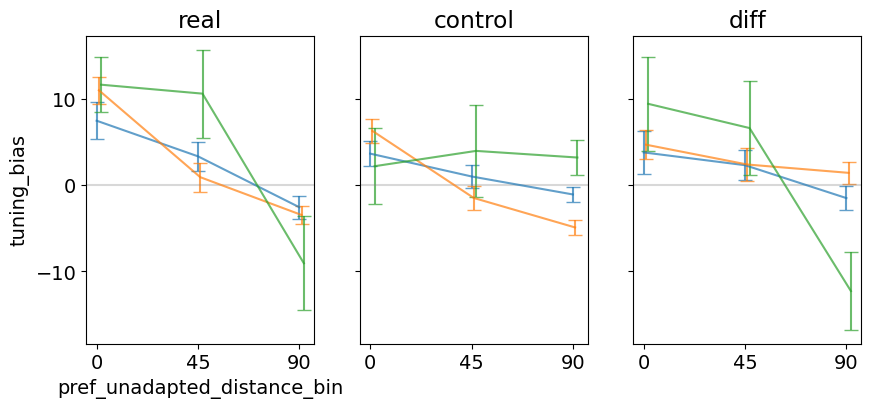

In [17]:
# set plt style to default
plt.style.use('default')

# set font size
plt.rcParams.update({'font.size': 14})

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)
jitter = 1
for i, iarea in enumerate(df_filter.area.unique()):
    axes[0].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias.mean(), 
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias.sem(), 
                    capsize=5, alpha=.7)


    axes[1].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_control.mean(),
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_control.sem(),
                    capsize=5, alpha=.7)
    
    axes[2].errorbar(x=np.array(sorted(df_filter[df_filter.area == iarea].pref_unadapted_distance_bin.unique())) + i * jitter,
                    y=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_diff.mean(),
                    yerr=df_filter[df_filter.area == iarea].groupby('pref_unadapted_distance_bin').tuning_bias_diff.sem(),
                    capsize=5, alpha=.7)

axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[2].axhline(0, color='gray', linestyle='-', alpha=.3);

axes[0].set_title('real')
axes[0].set_xlabel('pref_unadapted_distance_bin')
axes[0].set_ylabel('tuning_bias')
axes[0].set_xticks([0, 45, 90])
axes[0].set_xticklabels([0, 45, 90])

axes[1].set_title('control');
axes[1].set_xticks([0, 45, 90])
axes[1].set_xticklabels([0, 45, 90])

axes[2].set_title('diff');
axes[2].set_xticks([0, 45, 90])
axes[2].set_xticklabels([0, 45, 90]);

# fig.savefig(os.path.join(r'C:\Users\ll357\Documents\inter\results\tuning bias'.replace('\\', '/'), 'tuning_bias_by_area_with_control.pdf'), bbox_inches='tight')

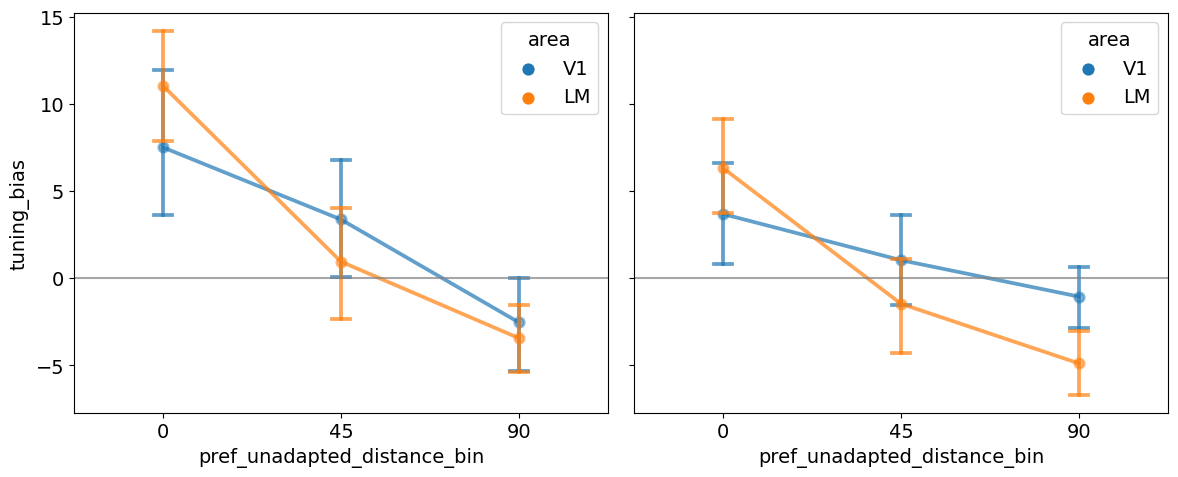

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias', 
                   data=df_filter[df_filter.area != 'LI'], hue='area',
                   errorbar="se", errwidthfloat=1, capsize=.1,
                   ax=axes[0],
                   )
g2 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_control', 
                   data=df_filter[df_filter.area != 'LI'], hue='area',
                   errorbar="se", errwidthfloat=1, capsize=.1,
                   ax=axes[1],
                  )
axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);

g2.set(ylabel=None) # remove ylabel
plt.setp(axes[0].collections, alpha=.5);
plt.setp(axes[1].collections, alpha=.5);
plt.setp(axes[0].lines, alpha=.7);
plt.setp(axes[1].lines, alpha=.7);
fig.tight_layout();

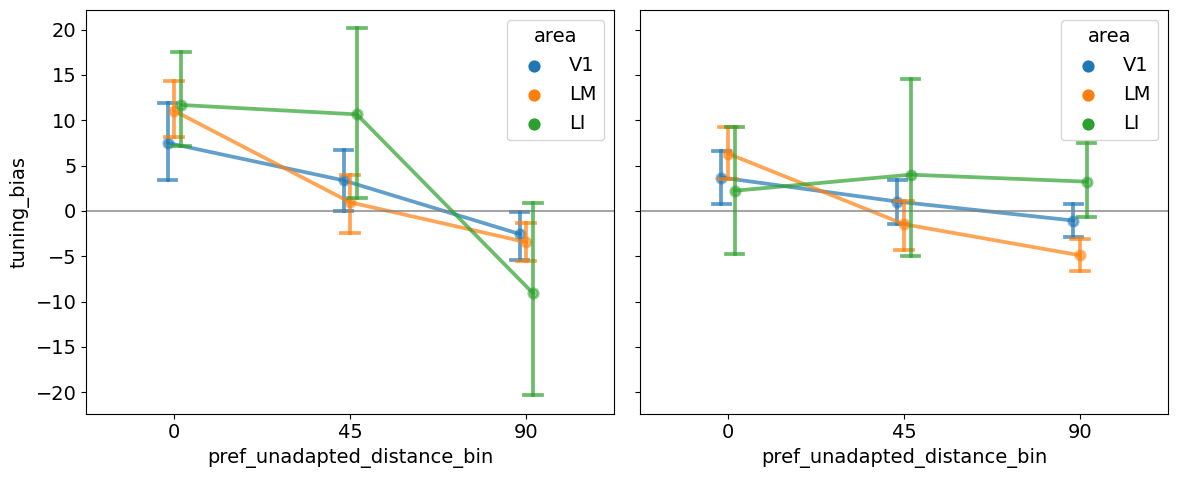

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias', data=df_filter, hue='area',
                   errorbar="se", errwidthfloat=1, capsize=.1,
                   ax=axes[0], dodge=True,
                   )
g2 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_control', data=df_filter, hue='area',
                  errorbar="se", errwidthfloat=1, capsize=.1,
                  ax=axes[1], dodge=True,
                  )
axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);

g2.set(ylabel=None) # remove ylabel
plt.setp(axes[0].collections, alpha=.5);
plt.setp(axes[1].collections, alpha=.5);
plt.setp(axes[0].lines, alpha=.7);
plt.setp(axes[1].lines, alpha=.7);
fig.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'tuning_bias_by_area.pdf'))

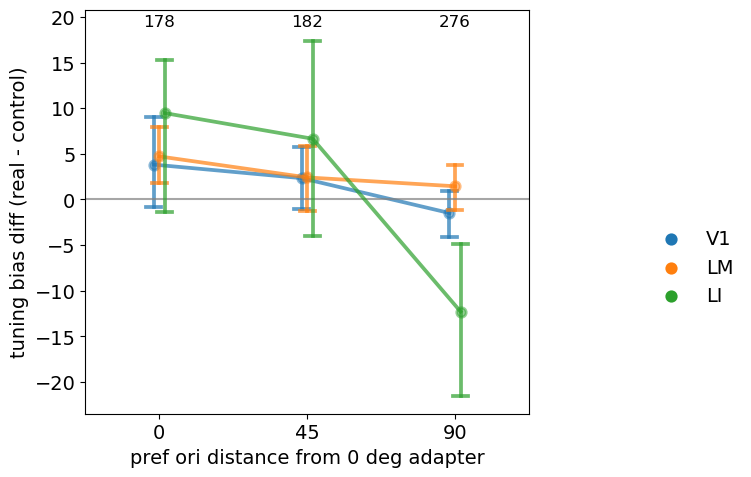

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_diff', data=df_filter, hue='area',
                   errorbar='se', 
                #    errorbar=('ci', 68), 
                   errwidthfloat=1, capsize=.1,
                   ax=axes, dodge=True,
                   )

# annotation above each dot, ncell
ncell_bin = df_filter.groupby('pref_unadapted_distance_bin').cell_id.nunique().sort_index().values
ylim = axes.get_ylim()
axes.set_ylim(ylim[0], ylim[1] + 1.5)
for i in range(len(ncell_bin)):
    axes.annotate(str(ncell_bin[i]), (i, ylim[1] + 0.1), ha='center', va='center', size=12)

axes.legend(frameon=False, bbox_to_anchor=(1.5, 0.5))
g1.set(xlabel='pref ori distance from 0 deg adapter')
g1.set(ylabel='tuning bias diff (real - control)')
axes.axhline(0, color='gray', linestyle='-', alpha=.3);
plt.setp(axes.collections, alpha=.5);
plt.setp(axes.lines, alpha=.7);
fig.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'tuning_bias_control_diff_by_area.pdf'))

### stats sig

In [25]:
pref_unadapted_distance_bin = 90
data = np.array([
                df_filter[(df_filter.area == 'V1') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                df_filter[(df_filter.area == 'LM') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                df_filter[(df_filter.area == 'LI') & (df_filter.pref_unadapted_distance_bin == pref_unadapted_distance_bin)].tuning_bias_diff.values,
                ], dtype=object)
data.shape, data[0].shape, data[1].shape, data[2].shape

((3,), (84,), (175,), (17,))

In [26]:
## t test
from scipy.stats import ttest_ind

## assumption: equal variance
print(np.var(data[0]), np.var(data[1]),) # assumption not met

t, p = ttest_ind(data[0], data[1], equal_var=False, alternative='less') #, permutations=10000, random_state=0)
t, p

159.55193074673565 277.28870767509255


(-1.5635064143636679, 0.05972281688189927)

In [27]:
## one way ANOVA
from scipy.stats import f_oneway

## assumption: equal variance
print(np.var(data[0]), np.var(data[1]), np.var(data[2]))
## assumption: normality
from scipy.stats import shapiro
print(shapiro(data[0]).pvalue, shapiro(data[1]).pvalue, shapiro(data[2]).pvalue)

f_oneway(data[0], data[1], data[2])

159.55193074673565 277.28870767509255 322.2720352824679
8.062943201991857e-09 6.215306314061309e-08 0.0006468608044087887


F_onewayResult(statistic=6.259144877158457, pvalue=0.002198717293043121)

In [28]:
from scipy.stats import kruskal
kruskal(data[0], data[1], data[2])

KruskalResult(statistic=13.168785484999262, pvalue=0.0013817662007700436)

### ncell by area & well fit %

In [29]:
df_filter.groupby(['pref_unadapted_distance_bin', 'area']).cell_id.nunique(), \
df_tidy.groupby(['pref_unadapted_distance_bin', 'area']).cell_id.nunique(), 

(pref_unadapted_distance_bin  area
 0                            LI        5
                              LM      117
                              V1       57
 45                           LI       10
                              LM       87
                              V1       85
 90                           LI       17
                              LM      175
                              V1       84
 Name: cell_id, dtype: int64,
 pref_unadapted_distance_bin  area
 0                            LI      327
                              LM      739
                              V1      216
 45                           LI      238
                              LM      417
                              V1      176
 90                           LI      305
                              LM      559
                              V1      191
 Name: cell_id, dtype: int64)

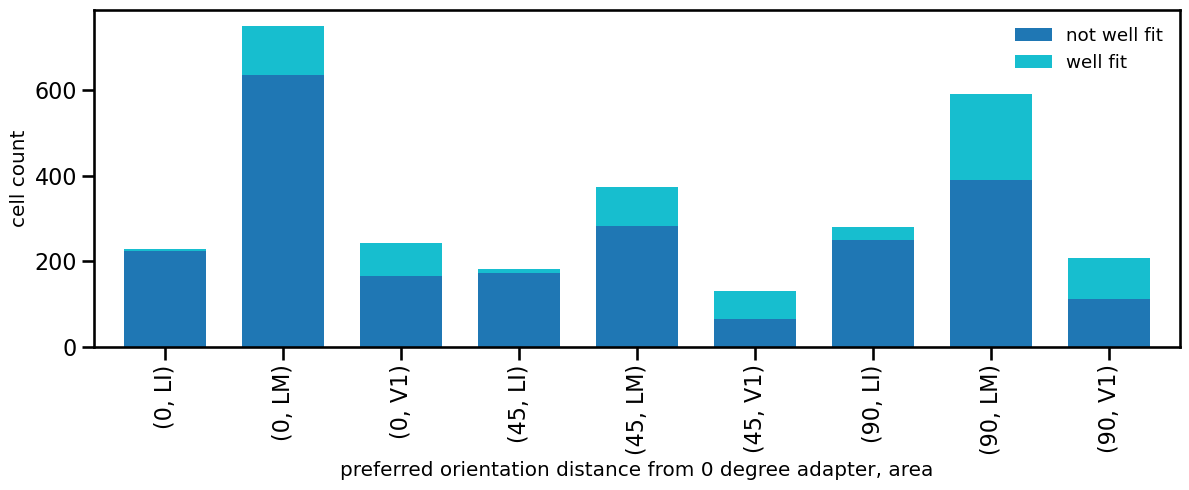

In [63]:
# stacked bar plot, colored by well_fit, for each area
df_tidy.groupby(['pref_unadapted_distance_bin', 'area', 'filter_cell_well_fit']).cell_id.nunique().unstack().plot(kind='bar', stacked=True, figsize=(12, 5), title='well_fit', colormap='tab10', legend='reverse', width=0.7);

# set legend frameon=False
plt.legend(frameon=False);

# set legend text content
plt.legend(['not well fit', 'well fit'], frameon=False);

plt.xlabel('preferred orientation distance from 0 degree adapter, area')
plt.ylabel('cell count')
plt.title('');
plt.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'well_fit_by_area.pdf'))

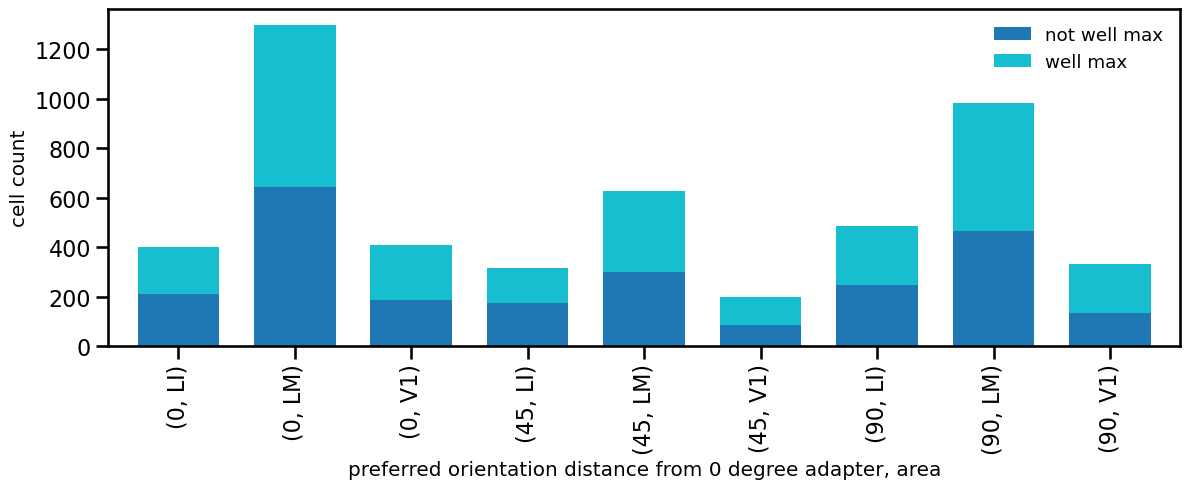

In [66]:
# stacked bar plot, colored by well_fit, for each area
(df_tidy.groupby(['pref_unadapted_distance_bin', 'area', 'filter_cell_well_max'])
 .cell_id.nunique().unstack()
 .plot(kind='bar', stacked=True, 
       figsize=(12, 5), title='well_max', 
       colormap='tab10', legend='reverse', width=0.7))

# set legend frameon=False
plt.legend(frameon=False);

# set legend text content
plt.legend(['not well max', 'well max'], frameon=False);

plt.xlabel('preferred orientation distance from 0 degree adapter, area')
plt.ylabel('cell count')
plt.title('');
plt.tight_layout();

plt.savefig(os.path.join(dir_fig, 'well_max_by_area.pdf'))

# df for tuning curve

In [154]:
df_tuning = df_tidy[['dfof', 'cell_id', 'resp_id', 'isi', 'stim2_id', 
                    'area', 'filter_cell_vis', 'filter_cell_well_fit', 'filter_cell_well_fit_ad_250', 
                    'ori_pref_ad_250', 'ori_pref_noad', 
                    'pref_unadapted_distance', 'pref_unadapted_distance_bin', 'pref_adapted_distance', 
                    'tuning_bias', #'tuning_bias_control',
                    ]]
df_tuning = df_tuning[(df_tuning.isi > -1) # placeholder, always true
                    # & (df_tuning.area == 'LI')
                    & (df_tuning.filter_cell_vis == True)
                    & (df_tuning.filter_cell_well_fit == True)
                    # & (df_tuning.filter_cell_well_fit_ad_250 == True) # only use cells that are well fit in both conditions: noad and ad 250
                    & ((df_tuning.isi == 250) | (df_tuning.isi == 6000))
                    # & (df_tuning.pref_unadapted_distance_bin == 90)
                    ]
                    
df_tuning['tuning_noad'] = np.pi
df_tuning['tuning_250'] = np.pi

for icell in tqdm(df_tuning.cell_id.unique()):
    ## tuning curve when isi = 6000, no adapter
    tuning_noad = df_tuning.loc[(df_tuning.cell_id == icell) & (df_tuning.isi == 6000) & (df_tuning.resp_id == 'R2'), :].groupby(['stim2_id'], sort=True).agg(np.nanmean)['dfof'].values# groupby sort: sorted by key, aka stim2_id. take R2 of no adapter trials to get tuning curve when no adapter
    df_tuning.loc[(df_tuning.cell_id == icell), 'tuning_noad'] = df_tuning.loc[(df_tuning.cell_id == icell), 'tuning_noad'].apply(lambda x: tuning_noad)
    
    ## tuning curve when isi = 250
    tuning_250 = df_tuning.loc[(df_tuning.cell_id == icell) & (df_tuning.isi == 250) & (df_tuning.resp_id == 'R2'), :].groupby(['stim2_id'], sort=True).agg(np.nanmean)['dfof'].values
    df_tuning.loc[(df_tuning.cell_id == icell), 'tuning_250'] = df_tuning.loc[(df_tuning.cell_id == icell), 'tuning_250'].apply(lambda x: tuning_250)

df_tuning.sort_values(by=['tuning_bias'], inplace=True) # df_tuning sort by tuning_bias_distance
df_tuning.sample(5, random_state=0) # NOTE: where isi=6000, pref_adapted_distance and tuning_bias are NaN

100%|██████████| 636/636 [02:41<00:00,  3.94it/s]


,dfof,cell_id,resp_id,isi,stim2_id,area,filter_cell_vis,filter_cell_well_fit,filter_cell_well_fit_ad_250,ori_pref_ad_250,ori_pref_noad,pref_unadapted_distance,pref_unadapted_distance_bin,pref_adapted_distance,tuning_bias,tuning_noad,tuning_250
20277,0.177746,200720_003_25,R2,250,2,V1,True,1.0,False,99.188945,92.159392,67.5,90,90.0,22.5,"[-0.0018507992276713045, 0.06215882017835943, ...","[-0.037093575337656774, -0.026934926615661957,..."
1025811,-0.006025,210805_002_18,R2,250,6,LM,True,1.0,True,45.131557,48.995404,45.0,45,45.0,0.0,"[0.025523786334807154, 0.03592235858228637, 0....","[0.00045834750380095203, 0.008241683892145468,..."
1382193,0.035764,230302_003_13,R2,250,5,LM,True,1.0,True,85.769124,78.532751,90.0,90,67.5,-22.5,"[0.0022148492839876664, 0.02465958053766841, 0...","[0.003837844959831291, 0.00513778493864718, 0...."
243999,0.125984,201015_004_17,R2,6000,7,V1,True,1.0,True,67.522685,68.143864,67.5,90,NaN,NaN,"[0.019385999593291615, 0.008579004641462154, 0...","[-0.024580455714557033, -0.005500357654778451,..."
480160,-0.038404,200721_002_26,R2,250,5,LM,True,1.0,True,35.939160,39.992416,45.0,45,45.0,0.0,"[0.037888198455414746, 0.13223266003314707, 0....","[0.10636026684330444, 0.1805371811926468, 0.26..."


## polar plot of tuning
before and after adaptation  
filter cells 

In [161]:
for icell in tqdm(df_tuning[df_tuning.area != 'V1'].cell_id.unique()):

    gOSI_noad = df_tuning[df_tuning.cell_id == icell].gOSI_noad.values[0]
    gOSI_250 = df_tuning[df_tuning.cell_id == icell].gOSI_250.values[0]

    tuning_noad = df_tuning[df_tuning.cell_id == icell].tuning_noad.values[0]
    tuning_noad = np.append(tuning_noad, tuning_noad) # repeat 8 values twice to make 16 values for polar plot
    tuning_noad = np.append(tuning_noad, tuning_noad[0]) # repeat first value at the end to close the circle
    ori_pref_noad = df_tuning[df_tuning.cell_id == icell].ori_pref_noad.values[0]
    # print('ori_pref_noad deg: ', np.round(ori_pref_noad, 2))
    ori_pref_noad = ori_pref_noad * np.pi / 180 # degree to radian

    tuning_250 = df_tuning[df_tuning.cell_id == icell].tuning_250.values[0]
    tuning_250 = np.append(tuning_250, tuning_250)
    tuning_250 = np.append(tuning_250, tuning_250[0])
    ori_pref_ad_250 = df_tuning[df_tuning.cell_id == icell].ori_pref_ad_250.values[0]
    # print('ori_pref_ad_250 deg: ', np.round(ori_pref_ad_250, 2))
    ori_pref_ad_250 = ori_pref_ad_250 * np.pi / 180

    tuning_bias = df_tuning[df_tuning.cell_id == icell].tuning_bias.values[0]
    # print('no adapter: ', np.round(tuning_noad, 2))
    # print('250 ms: ', np.round(tuning_250, 2))
    # print('tuning_bias: ', np.round(tuning_bias, 2))

    fig, ax = plt.subplots(1, 1, figsize=(12, 12), subplot_kw=dict(projection='polar'))
    ax.plot(np.linspace(0, 2*np.pi, 17), tuning_noad, alpha=.5, linewidth=10)
    ax.plot(np.linspace(0, 2*np.pi, 17), tuning_250, alpha=.5, linewidth=10)

    # plot adapter ori as a line
    min_val = np.min([np.min(tuning_noad), np.min(tuning_250)])
    max_val = np.max([np.max(tuning_noad), np.max(tuning_250)])
    # ax.plot([0, np.pi], [max_val, max_val], color='gray', linewidth=5, alpha=.5, label='adapter ori')

    # ## plot 90 deg as a line
    # ax.plot([np.pi/2, np.pi/2], [min_val, max_val], color='cyan', linewidth=5, alpha=.5, linestyle='-')
    # ax.plot([np.pi*3/2, np.pi*3/2], [min_val, max_val], color='cyan', linewidth=5, alpha=.5, linestyle='-')

    ## plot pref ori (noad) as a line
    ax.plot([ori_pref_noad, ori_pref_noad], [min_val, max_val], color='blue', linewidth=5, alpha=.5, label='pref ori no adapter')
    ori_pref_noad_opp = ori_pref_noad + np.pi # find opposite orientation of pref ori
    if ori_pref_noad_opp > 2*np.pi:
        ori_pref_noad_opp = ori_pref_noad_opp - 2*np.pi
    ax.plot([ori_pref_noad_opp, ori_pref_noad_opp], [min_val, max_val], color='blue', linewidth=5, alpha=.5, linestyle='-')

    ## plot pref ori (ad 250) as a line
    ax.plot([ori_pref_ad_250, ori_pref_ad_250], [min_val, max_val], color='orange', linewidth=5, alpha=.5, label='pref ori isi=250')
    ori_pref_ad_250_opp = ori_pref_ad_250 + np.pi
    if ori_pref_ad_250_opp > 2*np.pi:
        ori_pref_ad_250_opp = ori_pref_ad_250_opp - 2*np.pi
    ax.plot([ori_pref_ad_250_opp, ori_pref_ad_250_opp], [min_val, max_val], color='orange', linewidth=5, alpha=.5, linestyle='-')

    ## add text at top left
    bias_color = 'blue'
    minus_flag = 'pos'
    if tuning_bias < 0: # attractive bias
        bias_color = 'red'
        minus_flag = 'neg'
    plt.text(0.05, 0.9, f'tuning_bias: {np.round(tuning_bias, 2)}', transform=plt.gcf().transFigure, color=bias_color, fontsize=16) # in cartesian coordinates
    gOSI_color = 'green'
    if gOSI_noad < 0.5 or gOSI_250 < 0.5:
        gOSI_color = 'orange'
    if gOSI_noad < 0.5 and gOSI_250 < 0.5:
        gOSI_color = 'red'
    plt.text(0.05, 0.85, f'gOSI_noad: {np.round(gOSI_noad, 2)}', transform=plt.gcf().transFigure, color=gOSI_color, fontsize=16) # in cartesian coordinates
    plt.text(0.05, 0.8, f'gOSI_250: {np.round(gOSI_250, 2)}', transform=plt.gcf().transFigure, color=gOSI_color, fontsize=16) # in cartesian coordinates

    rticks = np.arange(0, max_val, step=0.05)
    ax.set_rticks(rticks)  # fewer radial ticks

    ax.set_xticks(np.linspace(0, 2*np.pi, 17))
    ax.set_xticklabels(np.arange(0, 360+22.5, 22.5))
    xticklabels = [label.get_text() for label in ax.get_xticklabels()]
    xticklabels[-1] = '' # set final xticklabel invisible
    ax.set_xticklabels(xticklabels)
    ax.set_ylim(min_val, max_val)

    area = df_tuning[df_tuning.cell_id == icell].area.values[0]
    ax.set_title(f'cell_id {icell} in {area}')
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False); # set legend position out of the way

    # break

    # save figure
    dir_result = r'C:\Users\lan\Documents\repos\inter\results\tuning bias single cell'.replace('\\', '/')
    fig.savefig(os.path.join(dir_result, f'gOSI_{np.round(gOSI_noad, 2)}_{icell}_tuning_curve.pdf'), bbox_inches='tight')
    plt.close(fig)
    clear_output(wait=True)

100%|██████████| 410/410 [07:40<00:00,  1.12s/it]


## filter cell gOSI
for well fit cells, calculate global orientation selectivity index (gOSI)  
formula taken from [Causal importance of orientation selectivity for generalization in image recognition](https://openreview.net/pdf?id=Bkx_Dj09tQ)

In [156]:
for icell in tqdm(df_tuning.cell_id.unique()):
    df_cell = df_tuning[df_tuning.cell_id == icell]

    tuning_noad = df_cell.tuning_noad.values[0] - min(df_cell.tuning_noad.values[0]) # ensure all values are non negative
    tuning_250 = df_cell.tuning_250.values[0] - min(df_cell.tuning_250.values[0])

    theta_arr = np.linspace(0, 180-22.5, 8) # according to formula: unit deg, not rad
    sin_arr = np.sin(2 * theta_arr)
    cos_arr = np.cos(2 * theta_arr)

    gOSI_noad = np.sqrt((np.sum(tuning_noad * sin_arr))**2 + (np.sum(tuning_noad * cos_arr))**2) / np.sum(tuning_noad)
    gOSI_250 = np.sqrt((np.sum(tuning_250 * sin_arr))**2 + (np.sum(tuning_250 * cos_arr))**2) / np.sum(tuning_250)

    df_tuning.loc[df_tuning.cell_id == icell, 'gOSI_noad'] = gOSI_noad
    df_tuning.loc[df_tuning.cell_id == icell, 'gOSI_250'] = gOSI_250

df_tuning = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False)
df_tuning.groupby('cell_id', sort=False)['area', 'gOSI_noad', 'gOSI_250'].first()#.head(20)

100%|██████████| 636/636 [01:14<00:00,  8.53it/s]


,area,gOSI_noad,gOSI_250
cell_id,,,
200728_003_33,V1,0.866154,0.729479
201015_004_12,V1,0.846736,0.789616
220228_002_16,LM,0.845744,0.809035
201127_002_3,LM,0.843627,0.700373
201015_004_6,V1,0.841990,0.720656
...,...,...,...
201127_002_28,LM,0.173120,0.316416
210805_002_21,LM,0.171098,0.127466
200720_003_65,V1,0.161497,0.068662


In [26]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# df_tuning.sort_values(by='area', ascending=False).groupby(['area', 'cell_id'], sort=False).gOSI_noad.hist(bins=20, alpha=.5, ax=axes[0]);
# df_tuning.sort_values(by='area', ascending=False).groupby(['area', 'cell_id'], sort=False).gOSI_250.hist(bins=20, alpha=.5, ax=axes[1]);

# axes[0].legend(['V1', 'LM', 'LI',], frameon=False) # sorted area descending
# plt.tight_layout();
# ## indeed, gOSI is between 0 and 1. higher gOSI means more orientation selective

In [27]:
df_tuning.groupby('area').gOSI_noad.describe() # df tuning is well-fit cells only. even so, LI gOSI is much worse than V1 and LM

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
LI,15111.0,0.493826,0.105991,0.289015,0.419533,0.491224,0.563361,0.709965
LM,186036.0,0.547436,0.148353,0.114256,0.444634,0.553049,0.661415,0.845744
V1,104642.0,0.547458,0.155385,0.139127,0.426200,0.559070,0.654359,0.866154


In [28]:
df_tidy.groupby('area').filter_cell_well_fit.describe() # well fit cell filter discards most cells in LI already

,count,mean,std,min,25%,50%,75%,max
area,,,,,,,,
LI,561185.0,0.061358,0.239985,0.0,0.0,0.0,0.0,1.0
LM,1393600.0,0.238967,0.426453,0.0,0.0,0.0,0.0,1.0
V1,459063.0,0.408351,0.491529,0.0,0.0,0.0,1.0,1.0


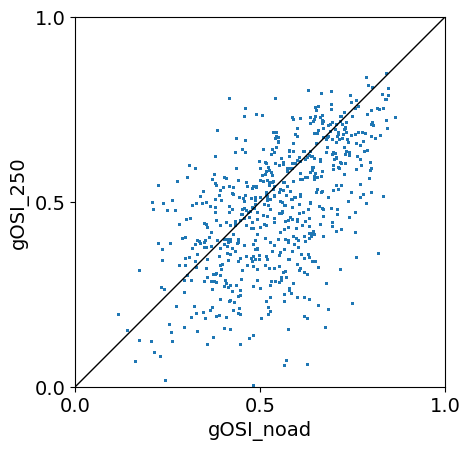

In [29]:
tmp1 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).gOSI_noad.values
tmp2 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).gOSI_250.values
tmp3 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).tuning_bias.values

plt.scatter(tmp1, tmp2, alpha=.1, s=1);
plt.plot([0, 1], [0, 1], color='k', linestyle='-', linewidth=1); # draw diagonal line

plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.xticks([0, .5, 1]);
plt.yticks([0, .5, 1]);
plt.xlabel('gOSI_noad');
plt.ylabel('gOSI_250');
plt.gca().set_aspect('equal', adjustable='box'); # set axis square

## gOSI noad is usually higher. gOSI noad vs 250 is correlated

r2 score of gOSI_noad vs tuning_bias:  0.019663151965021997
r2 score of gOSI_250 vs tuning_bias:  0.003738889210329721
slope:  15.16351373942225
intercept:  -6.25223627335961
positive correlation between gOSI and tuning_bias


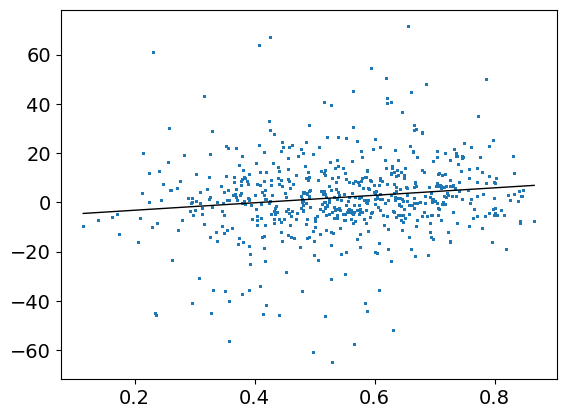

In [30]:
## regression: gOSI vs tuning_bias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

tmp1 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).gOSI_noad.values
tmp2 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).gOSI_250.values
tmp3 = df_tuning.sort_values(by=['gOSI_noad', 'gOSI_250'], ascending=False).tuning_bias.values
tmp1 = tmp1[~np.isnan(tmp3)]
tmp2 = tmp2[~np.isnan(tmp3)]
tmp3 = tmp3[~np.isnan(tmp3)]
tmp1 = tmp1.reshape(-1, 1)
tmp2 = tmp2.reshape(-1, 1)
tmp3 = tmp3.reshape(-1, 1)

reg1 = LinearRegression().fit(tmp1, tmp3)
reg2 = LinearRegression().fit(tmp2, tmp3)
print('r2 score of gOSI_noad vs tuning_bias: ', r2_score(tmp3, reg1.predict(tmp1)))
print('r2 score of gOSI_250 vs tuning_bias: ', r2_score(tmp3, reg2.predict(tmp2)))

plt.scatter(tmp1, tmp3, alpha=.1, s=1);
plt.plot(tmp1, reg1.predict(tmp1), color='k', linestyle='-', linewidth=1);
print('slope: ', reg1.coef_[0][0])
print('intercept: ', reg1.intercept_[0])

print('positive correlation between gOSI and tuning_bias')

### tuning bias plot - high gOSI
didnt seem to help

In [265]:
gOSI_thres = 0.5 # In visual neuroscience, neurons with gOSI > 0.33 are often considered to be orientation-selective (Piscopo et al., 2013; Kondo & Ohki, 2015).
df_tuning_gOSI = df_tuning[(df_tuning.gOSI_noad > gOSI_thres) & (df_tuning.gOSI_250 > gOSI_thres)]
print(df_tuning_gOSI.groupby('area').cell_id.nunique())

df_tuning_gOSI = df_tuning_gOSI.groupby('cell_id')[['area', 'pref_unadapted_distance_bin', 'tuning_bias', 'tuning_bias_control']].first().reset_index()
df_tuning_gOSI

area
LI     10
LM    152
V1     94
Name: cell_id, dtype: int64


,cell_id,area,pref_unadapted_distance_bin,tuning_bias,tuning_bias_control
0,200720_003_24,V1,0,11.165754,-4.270538
1,200720_003_29,V1,0,4.465665,6.922370
2,200720_003_57,V1,0,13.236476,0.945789
3,200720_003_59,V1,45,54.626962,7.780432
4,200720_003_61,V1,45,-0.369852,-10.973383
...,...,...,...,...,...
251,230307_004_24,LM,0,28.209884,6.004743
252,230307_004_26,LM,0,-12.258905,3.118108
253,230307_004_45,LM,90,-40.721540,-13.967277
254,230307_004_47,LM,0,7.807087,3.307979


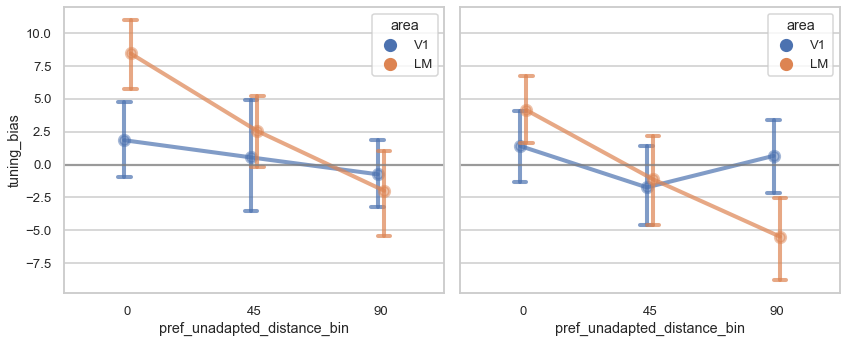

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias', 
                   data=df_tuning_gOSI[df_tuning_gOSI.area != 'LI'], hue='area',
                   errorbar='sd', # ('ci', 68), 
                   errwidthfloat=1, capsize=.1,
                   ax=axes[0], dodge=True,
                   )
g2 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_control', 
                   data=df_tuning_gOSI[df_tuning_gOSI.area != 'LI'], hue='area',
                  errorbar=('ci', 68), errwidthfloat=1, capsize=.1,
                  ax=axes[1], dodge=True, legend=False,
                  )
axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);

g2.set(ylabel=None) # remove ylabel
plt.setp(axes[0].collections, alpha=.5);
plt.setp(axes[1].collections, alpha=.5);
plt.setp(axes[0].lines, alpha=.7);
plt.setp(axes[1].lines, alpha=.7);
fig.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'tuning_bias_by_area.pdf'))

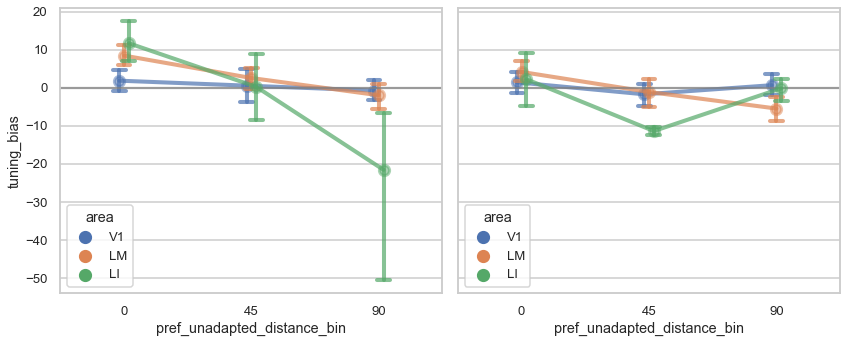

In [267]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias', data=df_tuning_gOSI, hue='area',
                   errorbar='sd', # ('ci', 68), 
                   errwidthfloat=1, capsize=.1,
                   ax=axes[0], dodge=True,
                   )
g2 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_control', data=df_tuning_gOSI, hue='area',
                  errorbar=('ci', 68), errwidthfloat=1, capsize=.1,
                  ax=axes[1], dodge=True, legend=False,
                  )
axes[0].axhline(0, color='gray', linestyle='-', alpha=.3);
axes[1].axhline(0, color='gray', linestyle='-', alpha=.3);

g2.set(ylabel=None) # remove ylabel
plt.setp(axes[0].collections, alpha=.5);
plt.setp(axes[1].collections, alpha=.5);
plt.setp(axes[0].lines, alpha=.7);
plt.setp(axes[1].lines, alpha=.7);
fig.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'tuning_bias_by_area.pdf'))

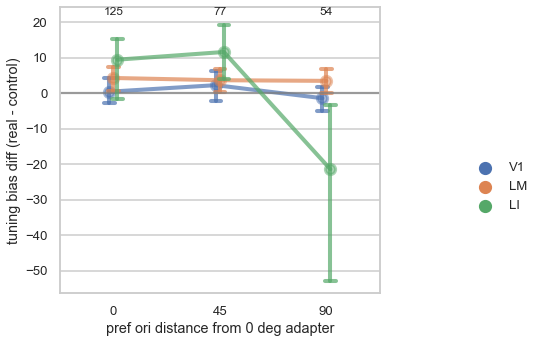

In [268]:
df_tuning_gOSI['tuning_bias_diff'] = df_tuning_gOSI['tuning_bias'] - df_tuning_gOSI['tuning_bias_control']

fig, axes = plt.subplots(1, 1, figsize=(9, 5), sharey=True)
g1 = sns.pointplot(x='pref_unadapted_distance_bin', y='tuning_bias_diff', data=df_tuning_gOSI, hue='area',
                   errorbar=('ci', 68), errwidthfloat=1, capsize=.1,
                   ax=axes, dodge=True,
                   )

# annotation above each dot, ncell
ncell_bin = df_tuning_gOSI.groupby('pref_unadapted_distance_bin').cell_id.nunique().sort_index().values
ylim = axes.get_ylim()
axes.set_ylim(ylim[0], ylim[1] + 1.5)
for i in range(len(ncell_bin)):
    axes.annotate(str(ncell_bin[i]), (i, ylim[1] + 0.1), ha='center', va='center', size=12)

axes.legend(frameon=False, bbox_to_anchor=(1.5, 0.5))
g1.set(xlabel='pref ori distance from 0 deg adapter')
g1.set(ylabel='tuning bias diff (real - control)')
axes.axhline(0, color='gray', linestyle='-', alpha=.3);
plt.setp(axes.collections, alpha=.5);
plt.setp(axes.lines, alpha=.7);
fig.tight_layout();

# plt.savefig(os.path.join(dir_fig, 'tuning_bias_control_diff_by_area.pdf'))

## filter cell ori-mod
dont fit tuning curve, dont filter well fit cells.  
find orientation-modulated cells by anova across all orientations responses

In [31]:
## construct tuning_vec column

cell_property = (df_tidy[['cell_id', 'isi', 'area', 'filter_cell_vis']] # need cell info: area, vis driven
                 .groupby(['cell_id', 'isi']) # prepare to match with df_ori_mod
                 .first() # only take first value. all values should be the same for each cell and isi combination
                 .reset_index())

df_ori_mod = (df_tidy[df_tidy.resp_id == 'R2'] # only R2 has diff ori
            [['dfof', 'cell_id', 'resp_id', 'isi', 'stim2_id']]
              .groupby(['cell_id', 'isi', 'stim2_id']).agg({'dfof': 'mean'}) # aggregate resp by cell, isi, ori
              .groupby(['cell_id', 'isi']).agg({'dfof':lambda x: list(x)}) # each row is a list of aggregated resp across ori
              .reset_index()
              .rename(columns={'dfof': 'tuning_vec'})
              .merge(cell_property, on=['cell_id', 'isi'], how='left') # merge with cell info
            )
df_ori_mod

,cell_id,isi,tuning_vec,area,filter_cell_vis
0,200720_003_0,250,"[0.016361998006661493, 0.010278129175002568, 0...",V1,True
1,200720_003_0,750,"[0.025038532340778488, 0.027538047461942633, 0...",V1,True
2,200720_003_0,6000,"[0.020152732636819985, -0.0013945580654881541,...",V1,True
3,200720_003_1,250,"[0.036562610558938564, 0.057022308981587506, 0...",V1,False
4,200720_003_1,750,"[0.050733120887446, 0.03534524443593661, 0.035...",V1,False
...,...,...,...,...,...
8962,230309_003_8,750,"[0.010098233103305406, 0.00922235218530763, 0....",LI,False
8963,230309_003_8,6000,"[-0.0007265278837471503, -0.010356049984017944...",LI,False
8964,230309_003_9,250,"[0.002111642689842034, -0.03229428397250415, -...",LI,False
8965,230309_003_9,750,"[-0.020504815243051422, -0.012417518632523836,...",LI,False


In [32]:
## construct ori_mod column

from scipy.stats import kruskal
p_threshold = 0.05

df_kruskal = (df_tidy[df_tidy.resp_id == 'R2'] # only R2 has diff ori
            [['dfof', 'cell_id', 'isi', 'stim2_id']]
            .groupby(['cell_id', 'isi', 'stim2_id']) # for each cell, each isi condition, calc responses to each ori
            .agg({'dfof':lambda x: list(x)}) # each row, dfof col contains a list of ori responses across trials
            .reset_index()
            .groupby(['cell_id', 'isi']) # for each cell, each isi condition, calc ori modulation
            .apply(lambda x: kruskal(*x.dfof.values).pvalue < p_threshold) # kruskal, where each ori is a group
            .reset_index()
            )
df_kruskal = df_kruskal.rename(columns={0: 'ori_mod'}) # bool col for ori modulation

df_ori_mod = df_ori_mod.merge(df_kruskal, on=['cell_id', 'isi'], how='left')
df_ori_mod

,cell_id,isi,tuning_vec,area,filter_cell_vis,ori_mod
0,200720_003_0,250,"[0.016361998006661493, 0.010278129175002568, 0...",V1,True,False
1,200720_003_0,750,"[0.025038532340778488, 0.027538047461942633, 0...",V1,True,True
2,200720_003_0,6000,"[0.020152732636819985, -0.0013945580654881541,...",V1,True,True
3,200720_003_1,250,"[0.036562610558938564, 0.057022308981587506, 0...",V1,False,False
4,200720_003_1,750,"[0.050733120887446, 0.03534524443593661, 0.035...",V1,False,False
...,...,...,...,...,...,...
8962,230309_003_8,750,"[0.010098233103305406, 0.00922235218530763, 0....",LI,False,False
8963,230309_003_8,6000,"[-0.0007265278837471503, -0.010356049984017944...",LI,False,False
8964,230309_003_9,250,"[0.002111642689842034, -0.03229428397250415, -...",LI,False,True
8965,230309_003_9,750,"[-0.020504815243051422, -0.012417518632523836,...",LI,False,False


In [33]:
## construct max_ori and max_ori_distance column

df_ori_mod['max_ori'] = df_ori_mod.tuning_vec.apply(lambda x: np.argmax(x)) # NOTE: even though we calculated max_ori for isi 250 and 750, only isi 6000 was actually used below (inherited by df_lineplot)
df_ori_mod['max_ori_dist'] = df_ori_mod.max_ori.apply(lambda x: 22.5*(8-x) if x > 4 else 22.5*x) # distance from 0 deg, hard coded for 8 ori. TODO: modify if needed

# df_ori_mod.groupby('max_ori').max_ori_distance.value_counts()
# df_ori_mod.groupby('max_ori_distance').max_ori.value_counts()
df_ori_mod.groupby('max_ori').max_ori_dist.unique()

max_ori
0     [0.0]
1    [22.5]
2    [45.0]
3    [67.5]
4    [90.0]
5    [67.5]
6    [45.0]
7    [22.5]
Name: max_ori_dist, dtype: object

In [34]:
## prepare for lineplot. don't need tuning vec, but need (stim2_id, dfof) observations
df_lineplot = (df_tidy[df_tidy.resp_id == 'R2'] # only R2 has diff ori
                      [['dfof', 'cell_id', 
                        'area', 'filter_cell_vis',
                        'resp_id', 'isi', 'stim2_id']]
                        .reset_index(drop=True)
                        )
## inherit ori_mod, max_ori, max_ori_distance from df_ori_mod
df_lineplot = df_lineplot.merge(
      df_ori_mod[df_ori_mod.isi == 6000]
      [['cell_id', 'ori_mod', 'max_ori', 'max_ori_dist']], 
      on=['cell_id'], how='left') # only use isi 6000 (no adapter condition) to determine ori_mod, max_ori and max_ori_dist for each cell

## inherit tuning_vec from df_ori_mod, for each isi
df_lineplot = df_lineplot.merge(
      df_ori_mod
      [['cell_id', 'tuning_vec', 'isi']],
      on=['cell_id', 'isi'], how='left') # take tuning_vec from df_ori_mod, for each cell and isi

df_lineplot

,dfof,cell_id,area,filter_cell_vis,resp_id,isi,stim2_id,ori_mod,max_ori,max_ori_dist,tuning_vec
0,0.000877,200720_003_0,V1,True,R2,750,5,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0..."
1,-0.055881,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0..."
2,0.037413,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0..."
3,0.512942,200720_003_0,V1,True,R2,750,3,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0..."
4,0.046603,200720_003_0,V1,True,R2,6000,2,True,4,90.0,"[0.020152732636819985, -0.0013945580654881541,..."
...,...,...,...,...,...,...,...,...,...,...,...
1420146,0.074167,230309_003_32,LI,False,R2,750,6,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216..."
1420147,-0.023736,230309_003_32,LI,False,R2,750,0,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216..."
1420148,0.060245,230309_003_32,LI,False,R2,250,1,False,5,67.5,"[0.027510405271565317, 0.009753824245836214, 0..."
1420149,0.009333,230309_003_32,LI,False,R2,6000,2,False,5,67.5,"[-0.04039721066009392, 0.005847991523749155, 0..."


In [35]:
# for each cell_id, divide tuning_vec of isi 250 by tuning_vec of isi 6000
tmp = df_lineplot.groupby(['cell_id', 'isi']).tuning_vec.first().to_frame()
tmp

## split tuning_vec into 8 columns
tmp = tmp.tuning_vec.apply(pd.Series)
tmp

tmp_noad = (tmp.groupby(level=['cell_id']).transform('last'))
tmp_noad

result = tmp - tmp_noad
result

## merge 8 columns back to tuning_vec
result['tuning_diff']= result.values.tolist()
result

0         1         2         3         4         5  \
cell_id      isi                                                                
200720_003_0 250  -0.003791  0.011673  0.033518 -0.012615 -0.032216 -0.022168   
             750   0.004886  0.028933  0.010938  0.076091  0.014486 -0.035019   
             6000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
200720_003_1 250   0.030914  0.049451  0.023036 -0.031079 -0.050838 -0.000731   
             750   0.045084  0.027774  0.037137  0.029714 -0.001707  0.023756   
...                     ...       ...       ...       ...       ...       ...   
230309_003_8 750   0.010825  0.019578 -0.018142 -0.121883 -0.017589  0.013620   
             6000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
230309_003_9 250   0.006161 -0.012827  0.012561  0.040171  0.047026 -0.037958   
             750  -0.016455  0.007050  0.000591 -0.025480  0.056306  0.007642   
             6000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                          6         7  \
cell_id      isi                        
200720_003_0 250  -0.027436 -0.012193   
             750  -0.034831 -0.028225   
             6000  0.000000  0.000000   
200720_003_1 250  -0.018446 -0.041205   
             750  -0.034462 -0.000538   
...                     ...       ...   
230309_003_8 750   0.001717  0.005170   
             6000  0.000000  0.000000   
230309_003_9 250   0.022852 -0.017974   
             750   0.017519  0.009197   
             6000  0.000000  0.000000   

                                                         tuning_diff  
cell_id      isi                                                      
200720_003_0 250   [-0.003790734630158492, 0.011672687240490722, ...  
             750   [0.004885799703958502, 0.028932605527430787, 0...  
             6000           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
200720_003_1 250   [0.030913819139125755, 0.04945062365731872, 0....  
             750   [0.04508432946763319, 0.027773559111667828, 0....  
...                                                              ...  
230309_003_8 750   [0.010824760987052555, 0.019578402169325576, -...  
             6000           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  
230309_003_9 250   [0.006161116563746717, -0.012827232925645988, ...  
             750   [-0.01645534136914674, 0.007049532414334323, 0...  
             6000           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]  

[8967 rows x 9 columns]

(-0.10174320629244175, 1.1575233159863254, 0.19320843091334894)

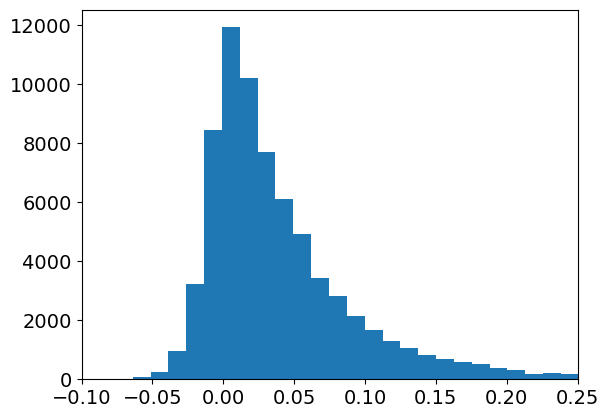

In [36]:
plt.hist(tmp_noad.values.flatten(), bins=100);
plt.xlim([-0.1, 0.25])

np.min(tmp_noad.values.flatten()), np.max(tmp_noad.values.flatten()), \
    sum(tmp_noad.values.flatten() < 0) / len(tmp_noad.values.flatten())

## tuning curve bias
no fitting, just align max response ori

In [37]:
## merge tuning_diff back to df_lineplot
df_lineplot = df_lineplot.merge(
        result.loc[:, 'tuning_diff'].reset_index(), # NOTE tuning_diff is (tuning_ad250 - tuning_noad)
        on=['cell_id', 'isi'], how='left')
df_lineplot

,dfof,cell_id,area,filter_cell_vis,resp_id,isi,stim2_id,ori_mod,max_ori,max_ori_dist,tuning_vec,tuning_diff
0,0.000877,200720_003_0,V1,True,R2,750,5,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0...","[0.004885799703958502, 0.028932605527430787, 0..."
1,-0.055881,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0...","[-0.003790734630158492, 0.011672687240490722, ..."
2,0.037413,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0...","[-0.003790734630158492, 0.011672687240490722, ..."
3,0.512942,200720_003_0,V1,True,R2,750,3,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0...","[0.004885799703958502, 0.028932605527430787, 0..."
4,0.046603,200720_003_0,V1,True,R2,6000,2,True,4,90.0,"[0.020152732636819985, -0.0013945580654881541,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
1420146,0.074167,230309_003_32,LI,False,R2,750,6,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216...","[0.04021489990038407, -0.01651206029167132, -0..."
1420147,-0.023736,230309_003_32,LI,False,R2,750,0,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216...","[0.04021489990038407, -0.01651206029167132, -0..."
1420148,0.060245,230309_003_32,LI,False,R2,250,1,False,5,67.5,"[0.027510405271565317, 0.009753824245836214, 0...","[0.06790761593165924, 0.003905832722087059, 0...."
1420149,0.009333,230309_003_32,LI,False,R2,6000,2,False,5,67.5,"[-0.04039721066009392, 0.005847991523749155, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"


In [49]:
df_lineplot['date'] = df_lineplot.cell_id.apply(lambda x: x.split('_')[0])
df_lineplot['sess'] = df_lineplot.cell_id.apply(lambda x: x.split('_')[1])
df_lineplot[df_lineplot.area == 'V1'].date.unique()

array(['200720', '200728', '200803', '201015', '201209', '210120'],
      dtype=object)

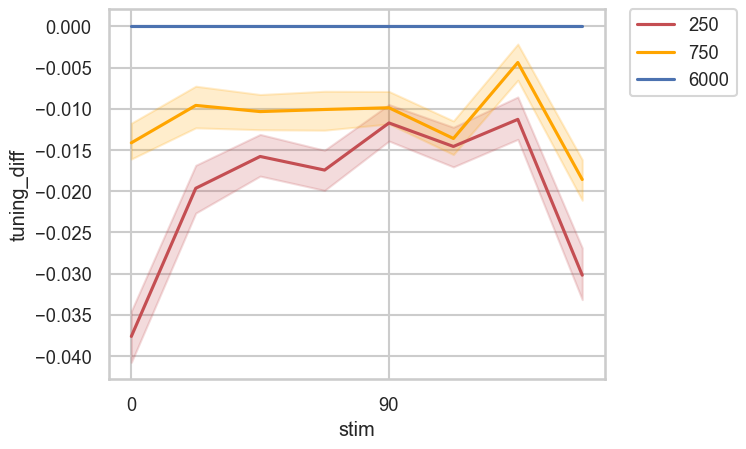

In [54]:
df_filter = df_lineplot[(df_lineplot.filter_cell_vis == True)
                       & (df_lineplot.ori_mod == True)
                    #    & (df_lineplot.isi != 750)
                       & (df_lineplot.area == 'LM')
                     ##  & (df_lineplot.date == '201015') # temporary filter to date, to match matlab san check for TC
                      #  & (df_lineplot.date == '210120') # temporary filter to date, to match matlab san check for TC
                       ]
# print(df_filter.groupby('max_ori').cell_id.nunique())
# 
df_tuning_diff = df_filter.groupby(['cell_id', 'isi']).tuning_diff.first().to_frame()
df_tuning_diff = df_tuning_diff.tuning_diff.apply(pd.Series)

# rename columns by adding 'stim' to each column
df_tuning_diff = df_tuning_diff.rename(columns={i: 'stim' + str(i) for i in range(8)})
df_tuning_diff = df_tuning_diff.reset_index()
df_tuning_diff

# pivot table so stim is row
df_tuning_diff = df_tuning_diff.melt(id_vars=['cell_id', 'isi'], var_name='stim', value_name='tuning_diff')
df_tuning_diff

# for stim col, take only the last char
df_tuning_diff['stim'] = df_tuning_diff.stim.apply(lambda x: x[-1])
df_tuning_diff.stim = df_tuning_diff.stim.astype(int)
df_tuning_diff

## set sns color palette
sns.lineplot(data=df_tuning_diff, x='stim', y='tuning_diff', hue='isi', ci=68, #alpha=0.9,
            # estimator=np.median, 
            palette=['r', 'orange', 'b'],
            )
plt.xticks([0, 4], ['0', '90'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

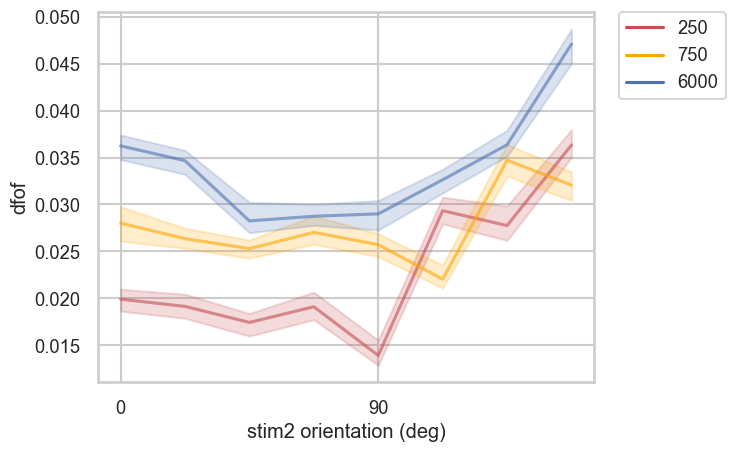

In [55]:
df_filter = df_lineplot[(df_lineplot.area == 'V1') # check V1 only
                       & (df_lineplot.ori_mod == True)
                       & (df_lineplot.filter_cell_vis == True)
                       ]

sns.lineplot(data=df_filter, x='stim2_id', y='dfof', hue='isi', ci=68, alpha=0.6, 
            estimator=np.median, 
            palette=['r', 'orange', 'b'],)
plt.xticks([0, 4], ['0', '90'])
plt.xlabel('stim2 orientation (deg)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

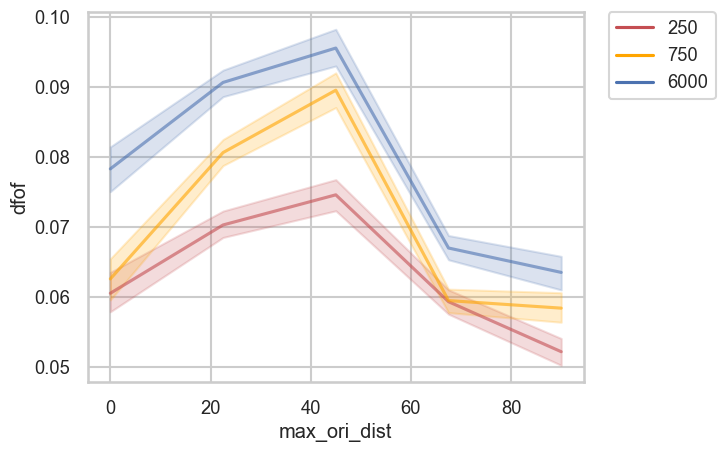

In [56]:
sns.lineplot(data=df_filter, x='max_ori_dist', y='dfof', hue='isi', ci=68, alpha=0.6, 
            estimator=np.mean, 
            palette=['r', 'orange', 'b'],)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

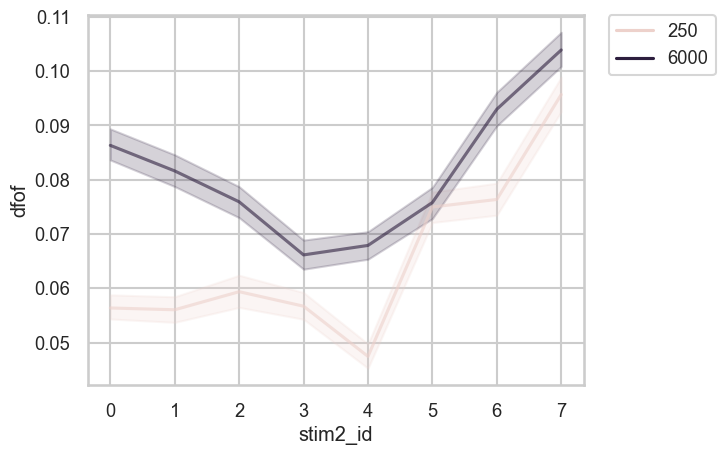

In [47]:
df_filter = df_lineplot[(df_lineplot.filter_cell_vis == True)
                       & (df_lineplot.ori_mod == True)
                       & (df_lineplot.isi != 750)
                       & (df_lineplot.area == 'V1')
                     ##  & (df_lineplot.date == '201015') # temporary filter to date, to match matlab san check for TC
                      #  & (df_lineplot.date == '210120') # temporary filter to date, to match matlab san check for TC
                       ]

sns.set(font_scale=0.8, context='talk', style='whitegrid')
sns.lineplot(data=df_filter, x='stim2_id', y='dfof', hue='isi', ci=68, alpha=0.6, 
            # estimator=np.median
            )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# sns.set(font_scale=0.8, context='talk', style='whitegrid')
# g = sns.FacetGrid(df_filter, row="date", hue="isi")
# g.map_dataframe(sns.lineplot, x="stim2_id", y="dfof", alpha=0.6)
# g.figure.subplots_adjust(wspace=0.1, hspace=0.3)
# g.add_legend();

# # set xticks to 0, 4
# for ax in g.axes.flat:
#     ax.set_xticks([0, 4])
#     ax.set_xticklabels(['0', '90'])


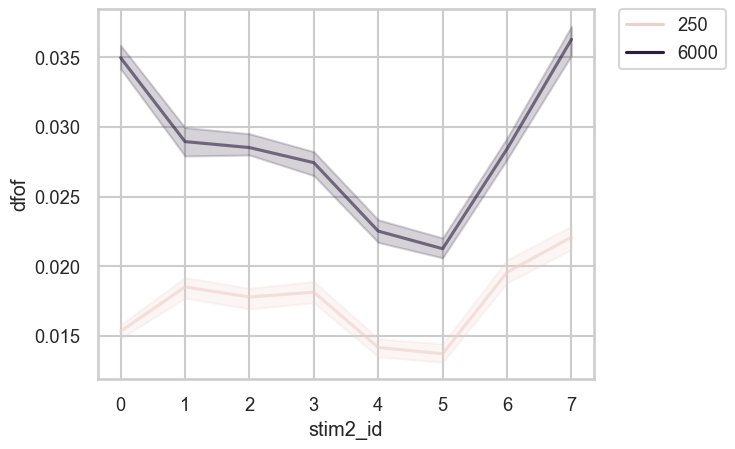

In [394]:
df_filter = df_lineplot[(df_lineplot.filter_cell_vis == True)
                       & (df_lineplot.ori_mod == True)
                       & (df_lineplot.isi != 750)
                       & (df_lineplot.area == 'LM')
                     ##  & (df_lineplot.date == '201015') # temporary filter to date, to match matlab san check for TC
                      #  & (df_lineplot.date == '210120') # temporary filter to date, to match matlab san check for TC
                       ]

sns.set(font_scale=0.8, context='talk', style='whitegrid')
sns.lineplot(data=df_filter, x='stim2_id', y='dfof', hue='isi', ci=68, alpha=0.6, estimator=np.median)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

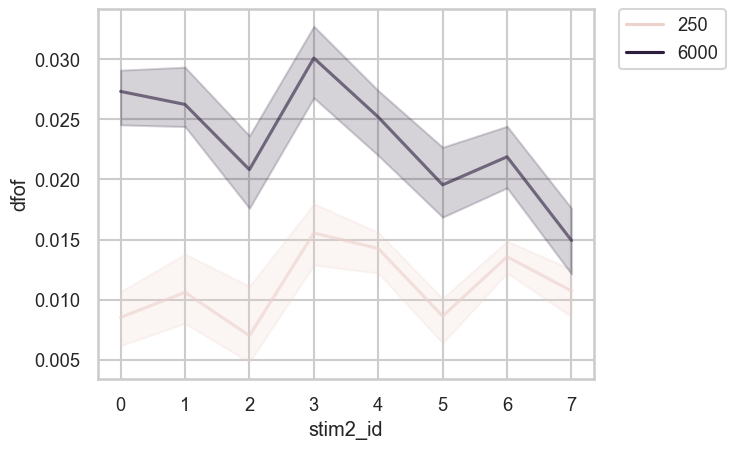

In [395]:
df_filter = df_lineplot[(df_lineplot.filter_cell_vis == True)
                       & (df_lineplot.ori_mod == True)
                       & (df_lineplot.isi != 750)
                       & (df_lineplot.area == 'LI')
                     ##  & (df_lineplot.date == '201015') # temporary filter to date, to match matlab san check for TC
                      #  & (df_lineplot.date == '210120') # temporary filter to date, to match matlab san check for TC
                       ]

sns.set(font_scale=0.8, context='talk', style='whitegrid')
sns.lineplot(data=df_filter, x='stim2_id', y='dfof', hue='isi', ci=68, alpha=0.6, estimator=np.median)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

## Jin 2019 Fig 2

In [66]:
df_lineplot.area.unique()

array(['V1', 'LM', 'LI'], dtype=object)

In [76]:
## construct df for tuning_diff lineplot:
## for each cell_id, subtract tuning_vec of isi 250 by tuning_vec of isi 6000
tmp = df_lineplot.groupby(['cell_id', 'isi']).tuning_vec.first().to_frame()
tmp.head(6)

tmp_noad_shift = tmp.copy()
tmp_noad_shift['tuning_vec'] = tmp_noad_shift.tuning_vec.apply(lambda x: [min(x) for i in range(len(x))])
tmp_noad_shift.head(6)

tmp_noad_shift = (tmp_noad_shift.groupby(level=['cell_id']).transform('last')) # last isi is 6000
epsilon = 0.001
tmp_noad_shift.tuning_vec = tmp_noad_shift.tuning_vec.apply(lambda x: [-min(0, i) + epsilon for i in x])
tmp_noad_shift.head(6)

## split tuning_vec into 8 columns
tmp = tmp.tuning_vec.apply(pd.Series)
tmp.head(6)
# plt.hist(tmp.values.flatten(), bins=100);
# min(tmp.values.flatten()), max(tmp.values.flatten())

tmp_noad_shift = tmp_noad_shift.tuning_vec.apply(pd.Series)
tmp_noad_shift.head(6)

tmp = tmp + tmp_noad_shift # shift tuning_vec of all isi by min(tuning_vec) of isi 6000
tmp.head(6)

tmp_noad = (tmp.groupby(level=['cell_id']).transform('last'))
tmp_noad.head(6)

result = tmp / tmp_noad
result
# plt.hist(result.values.flatten(), bins=100);
# min(result.values.flatten()), max(result.values.flatten())

thresh = 5
result = result.applymap(lambda x: x if abs(x) < thresh else np.nan) # threshold too large values - change to nan
result

## merge 8 columns back to tuning_vec
result['tuning_diff']= result.values.tolist()
result

## merge tuning_diff back to df_lineplot
df_lineplot = df_lineplot.loc[:, df_lineplot.columns != 'tuning_diff'].merge( # prevent duplicate column
        result.loc[:, 'tuning_diff'].reset_index(), # NOTE tuning_diff is (tuning_ad250 - tuning_noad)
        on=['cell_id', 'isi'], how='left')
df_lineplot

,dfof,cell_id,area,filter_cell_vis,resp_id,isi,stim2_id,ori_mod,max_ori,max_ori_dist,tuning_vec,date,sess,tuning_diff
0,0.000877,200720_003_0,V1,True,R2,750,5,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0...",200720,003,"[1.2166912099757665, nan, 1.4257613946367818, ..."
1,-0.055881,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0...",200720,003,"[0.8318762692951647, nan, 2.3047409011535818, ..."
2,0.037413,200720_003_0,V1,True,R2,250,2,True,4,90.0,"[0.016361998006661493, 0.010278129175002568, 0...",200720,003,"[0.8318762692951647, nan, 2.3047409011535818, ..."
3,0.512942,200720_003_0,V1,True,R2,750,3,True,4,90.0,"[0.025038532340778488, 0.027538047461942633, 0...",200720,003,"[1.2166912099757665, nan, 1.4257613946367818, ..."
4,0.046603,200720_003_0,V1,True,R2,6000,2,True,4,90.0,"[0.020152732636819985, -0.0013945580654881541,...",200720,003,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420146,0.074167,230309_003_32,LI,False,R2,750,6,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216...",230309,003,"[nan, 0.6505029182133945, -0.9093955642052809,..."
1420147,-0.023736,230309_003_32,LI,False,R2,750,0,False,5,67.5,"[-0.00018231075970984991, -0.01066406876792216...",230309,003,"[nan, 0.6505029182133945, -0.9093955642052809,..."
1420148,0.060245,230309_003_32,LI,False,R2,250,1,False,5,67.5,"[0.027510405271565317, 0.009753824245836214, 0...",230309,003,"[nan, 1.0826715209491216, 1.0962224815562718, ..."
1420149,0.009333,230309_003_32,LI,False,R2,6000,2,False,5,67.5,"[-0.04039721066009392, 0.005847991523749155, 0...",230309,003,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]"


In [94]:
df_filter = df_lineplot[(df_lineplot.area == 'V1')
                       & (df_lineplot.ori_mod == True)
                       & (df_lineplot.filter_cell_vis == True)
                       ]
# df_filter

df_tuning_diff = df_filter.groupby(['cell_id', 'isi']).tuning_diff.first().to_frame()
df_tuning_diff = df_tuning_diff.tuning_diff.apply(pd.Series)

# rename columns by adding 'stim' to each column
df_tuning_diff = df_tuning_diff.rename(columns={i: 'stim' + str(i) for i in range(8)})
df_tuning_diff = df_tuning_diff.reset_index()
df_tuning_diff

# pivot table so stim is row
df_tuning_diff = df_tuning_diff.melt(id_vars=['cell_id', 'isi'], var_name='stim', value_name='tuning_diff')
df_tuning_diff

# for stim col, take only the last char
df_tuning_diff['stim'] = df_tuning_diff.stim.apply(lambda x: x[-1])
df_tuning_diff.stim = df_tuning_diff.stim.astype(int)
df_tuning_diff['ori_dist'] = df_tuning_diff.stim.apply(lambda x: 22.5*(8-x) if x > 4 else 22.5*x) # stim2 distance from 0 deg, hard coded for 8 ori. TODO: modify if needed. here, we dont align by max ori of cells (to group cells), instead we plot all cells
df_tuning_diff

## inherit max_ori from df_lineplot
df_tuning_diff = df_tuning_diff.merge(df_filter[['cell_id', 'isi', 'max_ori', 'max_ori_dist']], on=['cell_id', 'isi'], how='inner')
df_tuning_diff = df_tuning_diff.drop_duplicates() # TODO: why are there duplicates?
df_tuning_diff

,cell_id,isi,stim,tuning_diff,ori_dist,max_ori,max_ori_dist
0,200720_003_0,250,0,0.831876,0.0,4,90.0
149,200720_003_0,250,1,NaN,22.5,4,90.0
298,200720_003_0,250,2,2.304741,45.0,4,90.0
447,200720_003_0,250,3,0.857256,67.5,4,90.0
596,200720_003_0,250,4,0.638013,90.0,4,90.0
...,...,...,...,...,...,...,...
966835,210120_003_8,6000,3,1.000000,67.5,7,22.5
966972,210120_003_8,6000,4,1.000000,90.0,7,22.5
967109,210120_003_8,6000,5,1.000000,67.5,7,22.5
967246,210120_003_8,6000,6,1.000000,45.0,7,22.5


In [95]:
df_tuning_diff.cell_id.nunique() # how many cells

261

In [96]:
## map with dict
ori_dist_bin = {0:0, 
                22.5:45,
                45:45,
                67.5:90,
                90:90,}

df_tuning_diff['ori_dist_bin'] = df_tuning_diff.ori_dist.map(ori_dist_bin)
df_tuning_diff['max_ori_dist_bin'] = df_tuning_diff.max_ori_dist.map(ori_dist_bin)

df_tuning_diff

,cell_id,isi,stim,tuning_diff,ori_dist,max_ori,max_ori_dist,ori_dist_bin,max_ori_dist_bin
0,200720_003_0,250,0,0.831876,0.0,4,90.0,0,90
149,200720_003_0,250,1,NaN,22.5,4,90.0,45,90
298,200720_003_0,250,2,2.304741,45.0,4,90.0,45,90
447,200720_003_0,250,3,0.857256,67.5,4,90.0,90,90
596,200720_003_0,250,4,0.638013,90.0,4,90.0,90,90
...,...,...,...,...,...,...,...,...,...
966835,210120_003_8,6000,3,1.000000,67.5,7,22.5,90,45
966972,210120_003_8,6000,4,1.000000,90.0,7,22.5,90,45
967109,210120_003_8,6000,5,1.000000,67.5,7,22.5,90,45
967246,210120_003_8,6000,6,1.000000,45.0,7,22.5,45,45


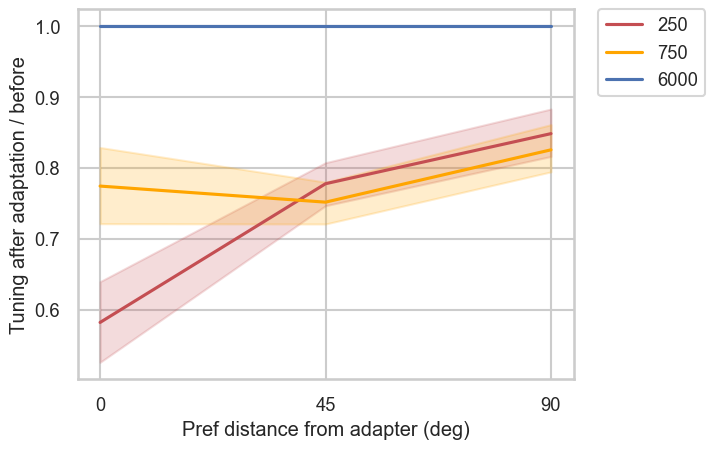

In [97]:
tmp = df_tuning_diff[df_tuning_diff.max_ori == df_tuning_diff.stim] # only take rows with max ori = stim2 ori
tmp

sns.lineplot(data=tmp, x='max_ori_dist_bin', y='tuning_diff', hue='isi', ci=68, #alpha=0.9,
            # estimator=np.median, 
            palette=['r', 'orange', 'b'],
            )

# set xticks 0, 45, 90
plt.xticks([0, 45, 90], [0, 45, 90])

plt.xlabel('Pref distance from adapter (deg)')
plt.ylabel('Tuning after adaptation / before')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# dir_fig = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check/'.replace('\\', '/')
# plt.savefig(dir_fig + 'Fig2E Jin2019.pdf', bbox_inches='tight')

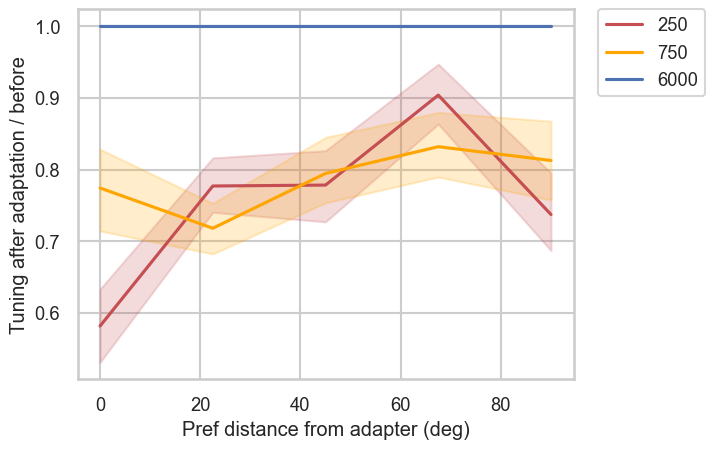

In [98]:
sns.lineplot(data=tmp, x='max_ori_dist', y='tuning_diff', hue='isi', ci=68, #alpha=0.9,
            # estimator=np.median, 
            palette=['r', 'orange', 'b'],
            )
plt.xlabel('Pref distance from adapter (deg)')
plt.ylabel('Tuning after adaptation / before')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# dir_fig = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check/'.replace('\\', '/')
# plt.savefig(dir_fig + 'tuning_diff_lineplot_binned.pdf', bbox_inches='tight')

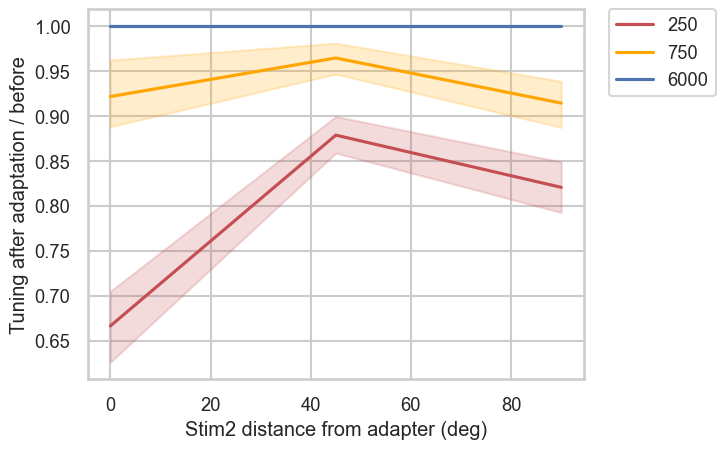

In [89]:
sns.lineplot(data=df_tuning_diff, x='ori_dist_bin', y='tuning_diff', hue='isi', ci=68, #alpha=0.9,
            # estimator=np.median, 
            palette=['r', 'orange', 'b'],
            )
plt.xlabel('Stim2 distance from adapter (deg)')
plt.ylabel('Tuning after adaptation / before')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# dir_fig = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check/'.replace('\\', '/')
# plt.savefig(dir_fig + 'tuning vs stim2_binned-adapter dist.pdf', bbox_inches='tight')

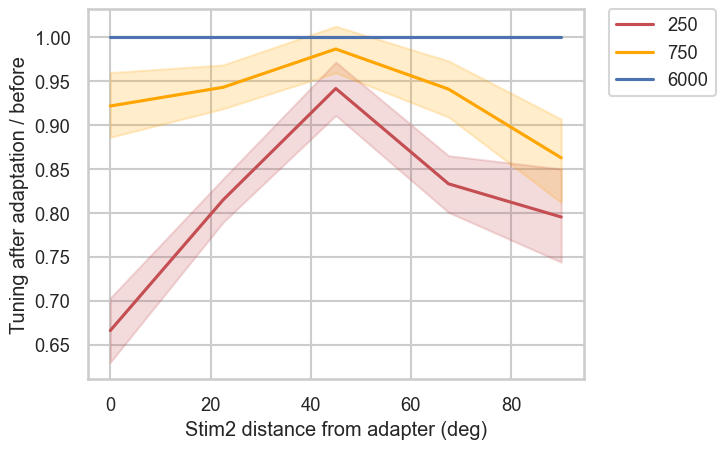

In [90]:
## set sns color palette
sns.lineplot(data=df_tuning_diff, x='ori_dist', y='tuning_diff', hue='isi', ci=68, #alpha=0.9,
            # estimator=np.median, 
            palette=['r', 'orange', 'b'],
            )
plt.xlabel('Stim2 distance from adapter (deg)')
plt.ylabel('Tuning after adaptation / before')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# dir_fig = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check/'.replace('\\', '/')
# # plt.savefig(dir_fig + 'tuning vs stim2-adapter dist.pdf', bbox_inches='tight')
# plt.savefig(dir_fig + 'Fig2D Jin2019.pdf', bbox_inches='tight')

## facet grid

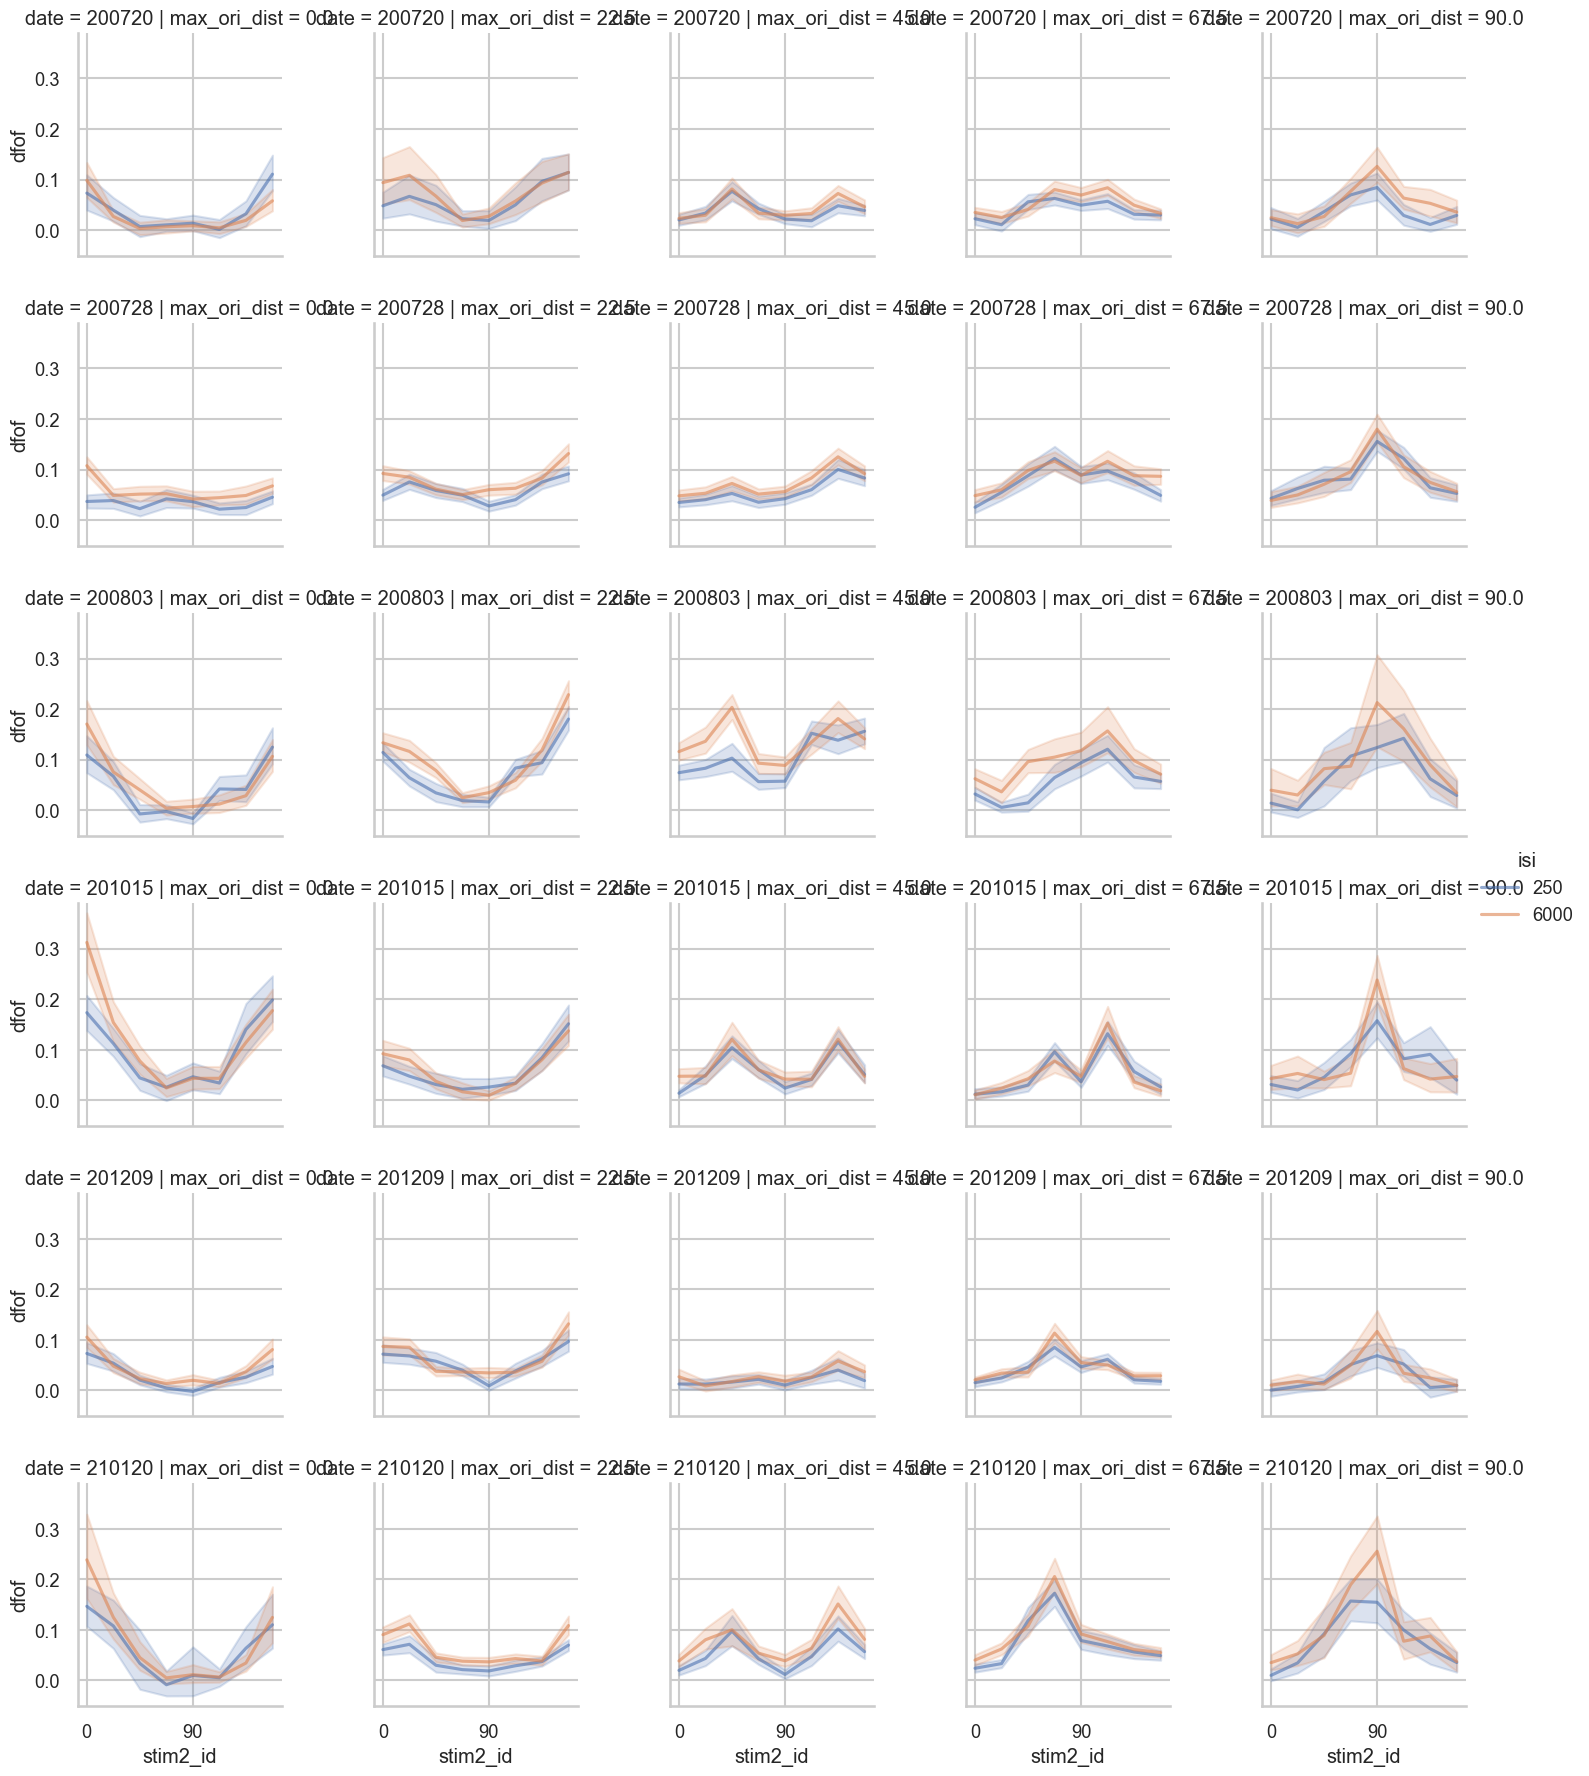

In [378]:
df_filter = df_lineplot[(df_lineplot.filter_cell_vis == True)
                      #  & (df_lineplot.ori_mod == True)
                       & (df_lineplot.isi != 750)
                       & (df_lineplot.area == 'V1')
                     ##  & (df_lineplot.date == '201015') # temporary filter to date, to match matlab san check for TC
                      #  & (df_lineplot.date == '210120') # temporary filter to date, to match matlab san check for TC
                       ]

sns.set(font_scale=0.8, context='talk', style='whitegrid')
# g = sns.FacetGrid(df_filter, col="area", row="max_ori_dist", hue="isi")
g = sns.FacetGrid(df_filter, col="max_ori_dist", row="date", hue="isi")
# g = sns.FacetGrid(df_filter, col="date", row="max_ori_dist", hue="isi") # which date has the most outrageous adp at orthogonal ori relative to adapter ori
g.map_dataframe(sns.lineplot, x="stim2_id", y="dfof", alpha=0.6)
g.figure.subplots_adjust(wspace=0.45, hspace=0.3)
g.add_legend();

# set xticks to 0, 4
for ax in g.axes.flat:
    ax.set_xticks([0, 4])
    ax.set_xticklabels(['0', '90'])


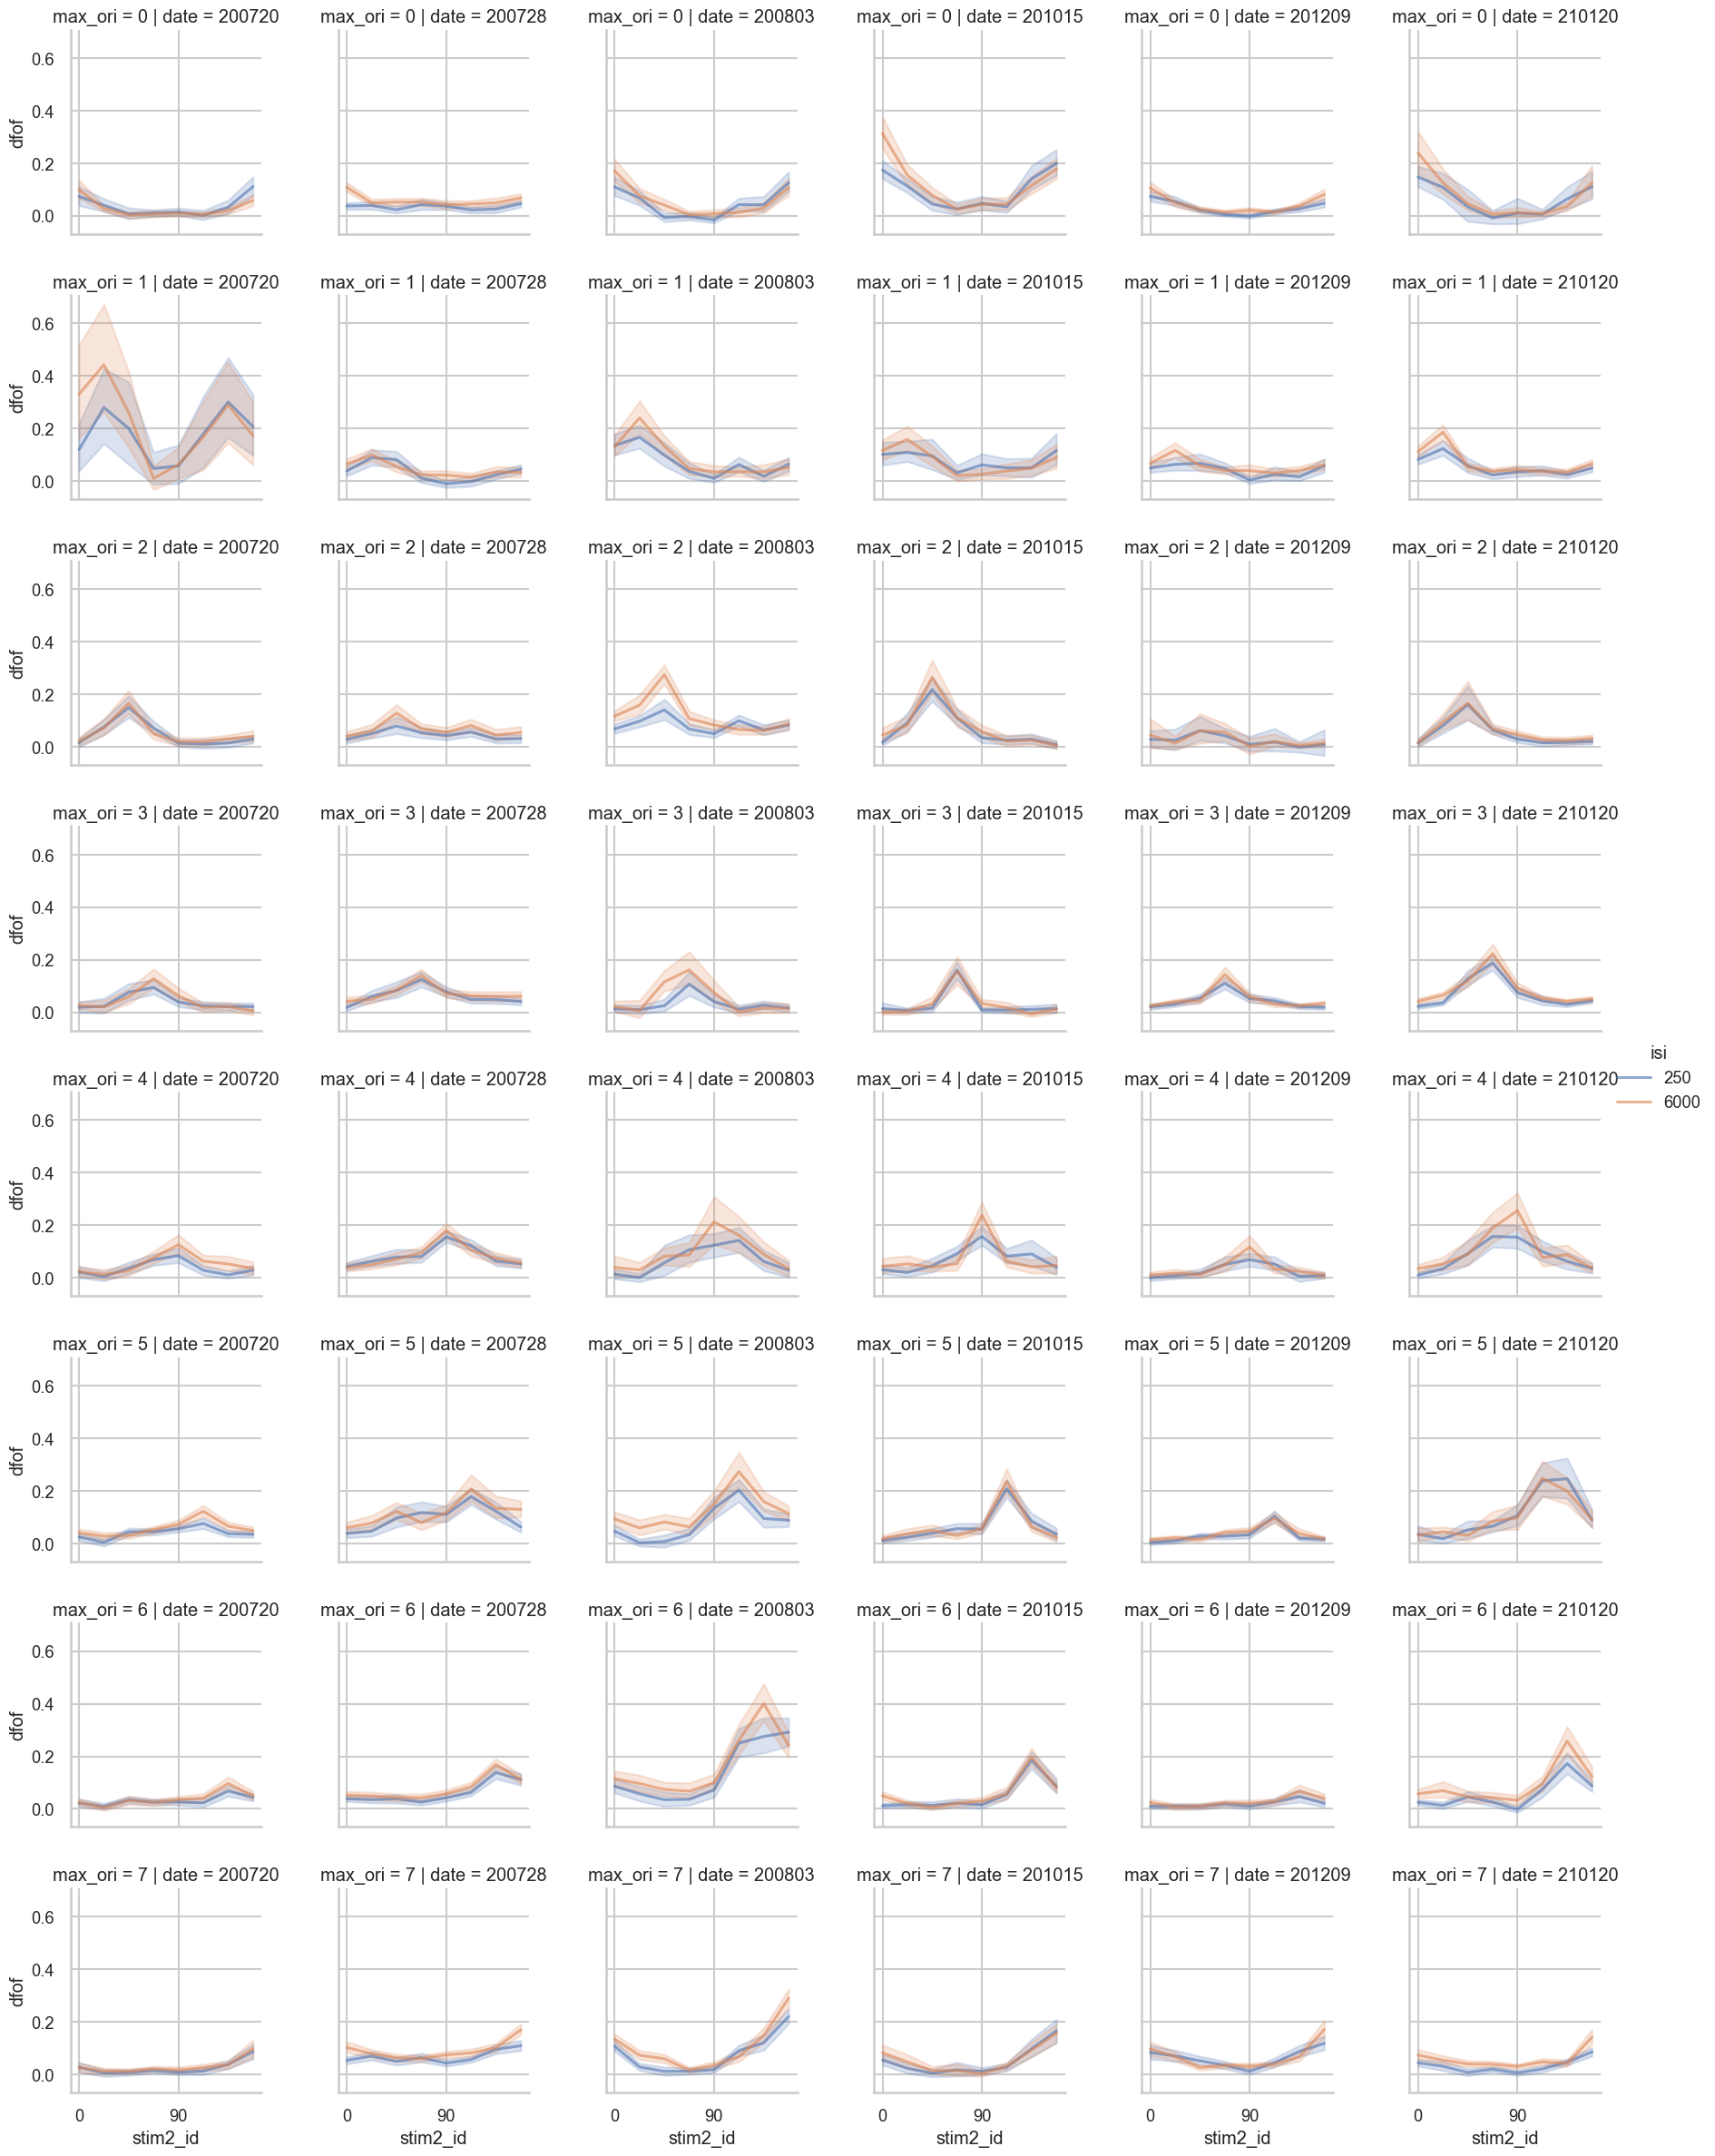

In [379]:
sns.set(font_scale=0.8, context='talk', style='whitegrid')
# g = sns.FacetGrid(df_filter, col="area", row="max_ori", hue="isi")
g = sns.FacetGrid(df_filter, col="date", row="max_ori", hue="isi")
g.map_dataframe(sns.lineplot, x="stim2_id", y="dfof", alpha=0.6)
g.figure.subplots_adjust(wspace=0.4, hspace=0.3)
g.add_legend();

for ax in g.axes.flat:
    ax.set_xticks([0, 4])
    ax.set_xticklabels(['0', '90'])

dir_result = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check'.replace('\\', os.sep)
g.savefig(os.path.join(dir_result, 'tuning_before_vs_after_adp.pdf'), bbox_inches='tight')

# san check
what can generate possibly fake adp when adapter vs target are orthogonal?  
check if bin=90 tuning curve is real: plot timecourse for stim2=90, noad vs 250

In [335]:
df_test = df_lineplot[(df_lineplot.date == '210120')] # use this date and sess for sanity check
df_test.cell_id = df_test.cell_id.apply(lambda x: x.split('_')[-1]) # temporarily remove date from cell_id
df_test

C:\Users\ll357\AppData\Local\Temp\6\ipykernel_43944\1917010594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.cell_id = df_test.cell_id.apply(lambda x: x.split('_')[-1]) # temporarily remove date from cell_id


,dfof,cell_id,area,filter_cell_vis,resp_id,isi,stim2_id,ori_mod,max_ori,max_ori_dist,date,sess
241305,-0.059959,0,V1,True,R2,250,4,False,1,22.5,210120,003
241306,-0.066803,0,V1,True,R2,250,3,False,1,22.5,210120,003
241307,0.055740,0,V1,True,R2,6000,4,False,1,22.5,210120,003
241308,-0.104743,0,V1,True,R2,250,0,False,1,22.5,210120,003
241309,0.035202,0,V1,True,R2,750,4,False,1,22.5,210120,003
...,...,...,...,...,...,...,...,...,...,...,...,...
270068,-0.015048,61,V1,True,R2,250,5,True,6,45.0,210120,003
270069,0.027682,61,V1,True,R2,750,2,True,6,45.0,210120,003
270070,0.091247,61,V1,True,R2,750,1,True,6,45.0,210120,003
270071,-0.030568,61,V1,True,R2,250,0,True,6,45.0,210120,003


In [369]:
df_filter = df_test[(df_test.filter_cell_vis == True)
                    # & (df_test.ori_mod == True)
                    & (df_test.isi != 750)
                    ]
df_filter.cell_id.nunique(), df_test.cell_id.nunique()

cell_id_bool = pd.DataFrame(df_test.cell_id.astype(int).unique()).isin(df_filter.cell_id.astype(int).unique())
cell_id_bool.head(20) # whether this cell passes the filter (vis and ori_mod)
cell_id_bool = cell_id_bool.values.astype(int).flatten()
cell_id_bool

import scipy.io as sio
dir_mat = r'C:\Users\ll357\Documents\inter\results\tuning curve bias san check/'.replace('\\', '/')
# sio.savemat(dir_mat+'vis_orimod_cell_bool.mat', {'vis_orimod_cell_bool': cell_id_bool})
sio.savemat(dir_mat+'vis_cell_bool.mat', {'vis_cell_bool': cell_id_bool}) # if only filter by vis, not ori_mod

# decorrelation
cosine similarity

In [1043]:
## suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

df_decorr = df_tidy[['dfof', 
                    'cell_id', 'resp_id', 'isi', 'stim2_id', 
                    'filter_cell_vis', 'filter_cell_stim', 'filter_cell_well_fit', 
                    'area', 'mouse', 'date', 'sess'
                    ]]

df_decorr['stim2_dist'] = df_decorr.stim2_id.apply(lambda x: 22.5*(8-x) if x > 4 else 22.5*x) 
                          # stim2 distance from 0 deg, hard coded for 8 ori. TODO: modify if needed
df_decorr['date_sess'] = df_decorr.date + '_' + df_decorr.sess

current_area = 'LM'
df_decorr = df_decorr[(df_decorr.isi != 750)
                      & (df_decorr.filter_cell_vis == True)
                      # & (df_decorr.filter_cell_stim == True)
                      # & (df_decorr.filter_cell_well_fit == True)
                      & (df_decorr.resp_id == 'R2')
                      & (df_decorr.area == current_area)
                    ]

df_decorr

,dfof,cell_id,resp_id,isi,stim2_id,filter_cell_vis,filter_cell_stim,filter_cell_well_fit,area,mouse,date,sess,stim2_dist,date_sess
471777,-0.010162,200721_002_0,R2,250,3,True,False,0.0,LM,1323,200721,002,67.5,200721_002
471778,0.027918,200721_002_0,R2,6000,0,True,False,0.0,LM,1323,200721,002,0.0,200721_002
471779,0.150566,200721_002_0,R2,6000,1,True,False,0.0,LM,1323,200721,002,22.5,200721_002
471780,0.079614,200721_002_0,R2,250,6,True,False,0.0,LM,1323,200721,002,45.0,200721_002
471781,0.048587,200721_002_0,R2,6000,2,True,True,0.0,LM,1323,200721,002,45.0,200721_002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849656,0.024947,230307_004_93,R2,250,2,True,False,0.0,LM,1381,230307,004,45.0,230307_004
1849657,0.010515,230307_004_93,R2,6000,3,True,False,0.0,LM,1381,230307,004,67.5,230307_004
1849660,-0.016396,230307_004_93,R2,250,7,True,False,0.0,LM,1381,230307,004,22.5,230307_004
1849661,-0.021152,230307_004_93,R2,250,2,True,False,0.0,LM,1381,230307,004,45.0,230307_004


## decorr from self
before vs after adp

In [467]:
cos_sim_sets = []
for iset in tqdm(df_decorr.date_sess.unique()):
    # print(iset)
    
    df_pop_vec = (df_decorr[df_decorr.date_sess == iset]
                  .groupby(['isi', 'stim2_dist', 'cell_id'])
                  .dfof.mean().reset_index()
                  .pivot_table(index=['isi', 'stim2_dist'], columns='cell_id', values='dfof')
                )
    nori = df_decorr.stim2_dist.nunique()
    
    cos_sim_iset = []
    for iori in range(nori):
        pop_vec_ref = df_pop_vec.iloc[nori + iori, :].values # ref is the same ori, but before adp (isi=6000)
        pop_vec_ori = df_pop_vec.iloc[iori, :].values # pop vec after adp (isi=250)
        cos_sim = dot(pop_vec_ref, pop_vec_ori) / (norm(pop_vec_ref) * norm(pop_vec_ori))
        cos_sim_iset.append(cos_sim)
    cos_sim_sets.append(cos_sim_iset)
    
len(cos_sim_sets), len(cos_sim_sets[0]) # n of recording, n of self-decorrelation pairs (nori)

100%|██████████| 6/6 [00:00<00:00, 23.57it/s]


(6, 5)

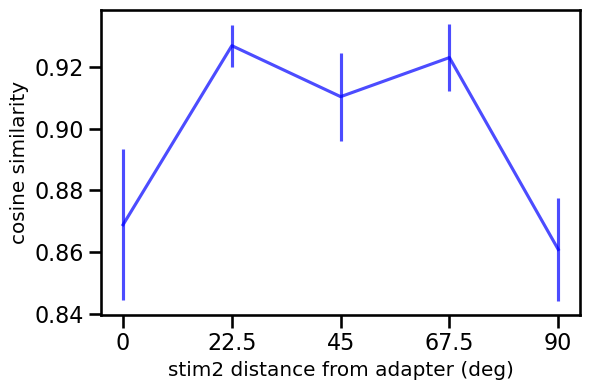

In [468]:
cos_sim_sets = np.array(cos_sim_sets)
cos_sim_sets_avg = np.nanmean(cos_sim_sets, axis=0) # across recordings
cos_sim_sets_sem = np.nanstd(cos_sim_sets, axis=0) / np.sqrt(cos_sim_sets.shape[0])

fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharex=True)
ax.errorbar(x=np.arange(len(cos_sim_sets_avg)),
               y=cos_sim_sets_avg,
               yerr=cos_sim_sets_sem,
               color='blue', # label='isi 250', 
               alpha=0.7)

# ax.legend(frameon=False, loc='lower center')
ax.set_xlabel('stim2 distance from adapter (deg)');
ax.set_ylabel('cosine similarity')
ax.set_xticks(range(nori), ['0', '22.5', '45', '67.5', '90'])

fig.tight_layout();
fig_dir = r'C:\Users\lan\Documents\repos\inter\results\decorrelation vs adp\ref=self before adp'.replace('\\', os.sep)
fig_name = 'decorr_from_self_after_adp_' + current_area + '.pdf'
plt.savefig(os.path.join(fig_dir, fig_name), bbox_inches='tight')

## decorr from ref repre

In [1044]:
(df_tidy[(df_tidy.filter_cell_vis == True)
        #  & (df_tidy.filter_cell_well_fit == True)
         ]
        .groupby('area')
        .cell_id.nunique())

area
LI     288
LM    1098
V1     460
Name: cell_id, dtype: int64

In [ ]:
''' 
if resample cells without affecting trials: 
1. groupby cell_id, then sample n cells. set cell_id as index, use df.reindex(cell_id) to get the resampled df
2. set cell_id as index in df_decorr, df_decorr[df_decorr.cell_id.isin(subsample_cell)] -> df.reindex
3. df_pop_vec. ... .groupby, reset_index, sample n cells, pivot_table
'''

In [1023]:
np.random.seed(iboot)
subsample_cell = np.random.choice(df_decorr.cell_id.unique(), 
                                #   size=int(subsample_cell_ratio*df_decorr.cell_id.nunique()), 
                                #   size=ncell_subsample,
                                    size=df_decorr.cell_id.nunique(), 
                                    replace=True)
np.unique(subsample_cell).__len__(), df_decorr.cell_id.nunique()

(176, 288)

In [1040]:
## bootstrap resample cells to get error bar

nboot = 100
# subsample_cell_ratio = 0.7
# ncell_subsample = (df_tidy[(df_tidy.filter_cell_vis == True)]
#                    .groupby('area')
#                    .cell_id.nunique()
#                    .min()) # min ncells across areas - determine subsample size
cos_sim_boots = []

for iboot in tqdm(range(nboot)):
    
    np.random.seed(iboot)
    subsample_cell = np.random.choice(df_decorr.cell_id.unique(), 
                                    #   size=int(subsample_cell_ratio*df_decorr.cell_id.nunique()), 
                                    #   size=ncell_subsample,
                                      size=df_decorr.cell_id.nunique(), 
                                      replace=True)
    
    # df_pop_vec = df_decorr.sample(frac=1, 
    #                               replace=True, 
    #                               random_state=iboot) # resample cellxtrial (row-wise) with replacement, same size as original
    
    df_pop_vec = (df_decorr # [df_decorr.cell_id.isin(subsample_cell)]
                  .groupby(['isi', 'stim2_dist', 'cell_id'])
                  .dfof.median().reset_index() # cell-level median, under each isi-stim2_dist condition
                  .groupby(['isi', 'stim2_dist'])
                  .sample(frac=2, replace=True, random_state=iboot) # resample cells with replacement in each cond
                  .pivot_table(index=['isi', 'stim2_dist'], columns='cell_id', values='dfof') # df allows duplicate columns
                  .fillna(0) # fill nan with 0, bc some cells are not sampled in some conditions
                )
    nori = df_decorr.stim2_dist.nunique()
    nisi_now = df_decorr.isi.nunique() # discarded isi 750

    cos_sim_iboot = []
    for iisi in range(nisi_now):
        if iisi == 0:
            # iref = 0
            iref = 4
        elif iisi == 1:
            # iref = nori
            iref = nori+4 # -1 (0-based indexing) and +1 (go to next isi) cancel out
        pop_vec_ref = df_pop_vec.iloc[iref, :].values # reference pop vec: 0 deg target resp
        
        for iori in range(nori):
            irow = iisi * nori + iori
            pop_vec_ori = df_pop_vec.iloc[irow, :].values
            cos_sim = dot(pop_vec_ref, pop_vec_ori) / (norm(pop_vec_ref) * norm(pop_vec_ori))
            cos_sim_iboot.append(cos_sim)
    cos_sim_boots.append(cos_sim_iboot)
    
len(cos_sim_boots), len(cos_sim_boots[0]) # n of boot, n of decorrelation pairs (nisi * nori)

100%|██████████| 100/100 [00:07<00:00, 12.66it/s]


(100, 10)

In [1011]:
# tmp = (df_decorr # [df_decorr.cell_id.isin(subsample_cell)]
#         .groupby(['isi', 'stim2_dist', 'cell_id'])
#         .dfof.median().reset_index() # cell-level median, under each isi-stim2_dist condition
#         .groupby(['isi', 'stim2_dist'])
#         .sample(frac=4/122, replace=True, random_state=0) # resample cells with replacement, same size as original
#         .groupby(['isi', 'stim2_dist'])
#         # .pivot_table(index=['isi', 'stim2_dist'], columns='cell_id', values='dfof')
#         )
# tmp#.cell_id.nunique(), df_decorr.cell_id.nunique()

# for key, group in tmp:
#     # print(key)
#     # print(group)
#     break
# group.cell_id.nunique(), df_decorr.cell_id.nunique()
# group

,isi,stim2_dist,cell_id,dfof
44,250,0.0,210203_003_21,0.025144
47,250,0.0,210203_003_30,0.015220
117,250,0.0,230228_003_4,-0.011095
64,250,0.0,230110_002_32,0.025775


In [603]:
## separate recordings to get error bar

# cos_sim_sets = []
# for iset in tqdm(df_decorr.date_sess.unique()):
#     # print(iset)
    
#     df_pop_vec = (df_decorr[df_decorr.date_sess == iset]
#                   .groupby(['isi', 'stim2_dist', 'cell_id'])
#                   .dfof.mean().reset_index()
#                   .pivot_table(index=['isi', 'stim2_dist'], columns='cell_id', values='dfof')
#                 )
#     nori = df_decorr.stim2_dist.nunique()
#     nisi_now = df_decorr.isi.nunique() # discarded isi 750

#     cos_sim_iset = []
#     for iisi in range(nisi_now):
#         if iisi == 0:
#             iref = 0
#             # iref = 4
#         elif iisi == 1:
#             iref = nori
#             # iref = nori+4 # -1 (0-based indexing) and +1 (go to next isi) cancel out
#         pop_vec_ref = df_pop_vec.iloc[iref, :].values # reference pop vec: 0 deg target resp
        
#         for iori in range(nori):
#             irow = iisi * nori + iori
#             pop_vec_ori = df_pop_vec.iloc[irow, :].values
#             cos_sim = dot(pop_vec_ref, pop_vec_ori) / (norm(pop_vec_ref) * norm(pop_vec_ori))
#             cos_sim_iset.append(cos_sim)
#     cos_sim_sets.append(cos_sim_iset)
    
# len(cos_sim_sets), len(cos_sim_sets[0]) # n of recording, n of decorrelation pairs (nisi * nori)

100%|██████████| 18/18 [00:00<00:00, 33.49it/s]


(18, 10)

In [863]:
# ## save boot
# # V1_decorr_boot = cos_sim_boots.copy()
# # LM_decorr_boot = cos_sim_boots.copy()
# # LI_decorr_boot = cos_sim_boots.copy()

# # decorr_boot = {'V1_decorr_boot': V1_decorr_boot,
# #                'LM_decorr_boot': LM_decorr_boot,
# #                'LI_decorr_boot': LI_decorr_boot,}

# # import pickle
# # pickle_dir = r'C:\Users\lan\Documents\repos\inter\results\decorrelation vs adp\ref=90 deg'.replace('\\', os.sep)
# # pickle_name = 'decorr_vs_stim2_dist_errorbar_bootstrap_CI_' + '.pickle'
# # with open(os.path.join(pickle_dir, pickle_name), 'wb') as handle:
# #     pickle.dump(decorr_boot, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
# ## load boot
# with open(os.path.join(pickle_dir, pickle_name), 'rb') as handle:
#     decorr_boot = pickle.load(handle)
# decorr_boot.keys()

# V1_decorr_boot = decorr_boot['V1_decorr_boot']
# LM_decorr_boot = decorr_boot['LM_decorr_boot']
# LI_decorr_boot = decorr_boot['LI_decorr_boot']

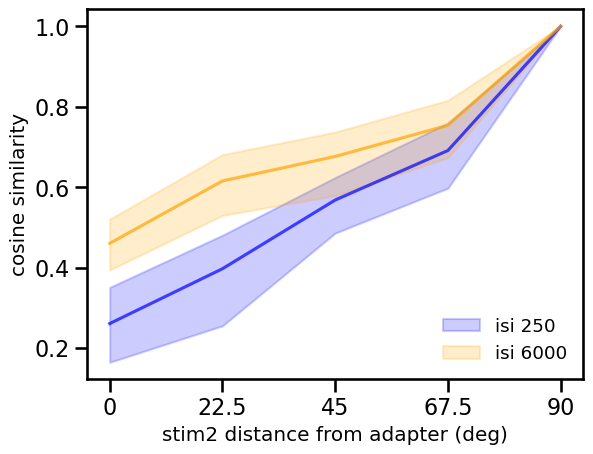

In [1042]:
cos_sim_sets = np.array(cos_sim_boots)
cos_sim_sets_avg = np.mean(cos_sim_sets, axis=0) # across boots

perc = 2.5
plt.plot(cos_sim_sets_avg[:nori], color='blue', alpha=0.7)
plt.fill_between(x=np.arange(nori),
                y1=np.percentile(cos_sim_sets, perc, axis=0)[:nori],
                y2=np.percentile(cos_sim_sets, 100-perc, axis=0)[:nori],
                label='isi 250',
                color='blue', alpha=0.2)

plt.plot(cos_sim_sets_avg[nori:], color='orange', alpha=0.7)
plt.fill_between(x=np.arange(nori),
                y1=np.percentile(cos_sim_sets, perc, axis=0)[nori:],
                y2=np.percentile(cos_sim_sets, 100-perc, axis=0)[nori:],
                label='isi 6000',
                color='orange', alpha=0.2);
plt.legend(frameon=False, loc='lower right')

# ## annotate significance
# for iori in np.arange(nori)[:-1]: # exclude 90 deg
#     plt.annotate(sig_star_list[iori], xy=(iori, 1), fontsize=12, ha='center', va='center')

# plt.ylim(0.2, 1.05)
plt.xlabel('stim2 distance from adapter (deg)');
plt.ylabel('cosine similarity')
plt.xticks(range(nori), ['0', '22.5', '45', '67.5', '90'])

fig.tight_layout();
fig_dir = r'C:\Users\lan\Documents\repos\inter\results\decorrelation vs adp\ref=90 deg'.replace('\\', os.sep)
fig_name = f'decorr_fixed_resample_boot_CI{int(100-2*perc)}_median_' + current_area + '.pdf'
plt.savefig(os.path.join(fig_dir, fig_name), bbox_inches='tight')

### decorr vs stim2_ori

In [397]:
df_pop_vec = (df_decorr.groupby(['isi', 'stim2_id', 'cell_id'])
                .dfof.mean().reset_index()
                .pivot_table(index=['isi', 'stim2_id'], columns='cell_id', values='dfof')
                )
df_pop_vec

cell_id        200723_003_1  200723_003_10  200723_003_11  200723_003_12  \
isi  stim2_id                                                              
250  0            -0.005401       0.007648       0.038531       0.011697   
     1            -0.020624      -0.019151      -0.015456      -0.015368   
     2            -0.007372       0.019836       0.098756       0.040590   
     3             0.063277       0.025829       0.040016      -0.029502   
     4             0.119146       0.001094       0.017127       0.011128   
     5             0.048175       0.032663       0.008627       0.040453   
     6             0.049623       0.059203       0.016605       0.015589   
     7            -0.025040       0.014491      -0.030827       0.034537   
6000 0            -0.004944       0.091272      -0.022213       0.043560   
     1             0.070847       0.062880       0.027504      -0.007658   
     2             0.078720       0.028448       0.171627       0.034132   
     3             0.080553       0.052082       0.114251       0.050209   
     4             0.064168       0.045880       0.047818       0.020374   
     5             0.105954       0.025416       0.005282       0.042583   
     6             0.082480       0.058769       0.002543       0.039387   
     7             0.051929       0.091695       0.000104       0.024366   

cell_id        200723_003_14  200723_003_15  200723_003_16  200723_003_18  \
isi  stim2_id                                                               
250  0             -0.008486       0.046037       0.025867      -0.040432   
     1              0.042805       0.011193       0.007441       0.044029   
     2              0.053564       0.174982       0.046541       0.026134   
     3              0.012289       0.112753       0.122199       0.078819   
     4              0.044916       0.150953      -0.004497       0.060277   
     5              0.057908       0.143648       0.013280       0.033569   
     6             -0.021378       0.127970      -0.060111       0.031628   
     7              0.005427       0.000863      -0.029145      -0.042133   
6000 0              0.068940       0.099363      -0.013935       0.028703   
     1              0.081273       0.135151       0.035943       0.073747   
     2              0.004838       0.104008       0.084809       0.076492   
     3              0.041151       0.123181       0.115130       0.076236   
     4              0.058745       0.143208       0.130853       0.042643   
     5              0.018433       0.117422       0.013840       0.074791   
     6              0.049893       0.185119       0.006089       0.067050   
     7              0.039748       0.074478      -0.026587       0.066704   

cell_id        200723_003_19  200723_003_2  ...  230309_002_55  230309_002_61  \
isi  stim2_id                               ...                                 
250  0              0.004073      0.031216  ...      -0.001467       0.012224   
     1             -0.029450      0.026072  ...      -0.016538       0.034560   
     2              0.004872      0.020765  ...      -0.005001       0.011898   
     3              0.095105      0.079738  ...      -0.001857      -0.006986   
     4              0.081349      0.046425  ...      -0.004717       0.004506   
     5              0.023795      0.051474  ...       0.004787      -0.008856   
     6             -0.009139      0.031187  ...      -0.022175       0.036889   
     7             -0.018550      0.040290  ...      -0.007384       0.019071   
6000 0              0.014449      0.108429  ...      -0.006541       0.004988   
     1              0.056210      0.070822  ...       0.003872       0.016538   
     2              0.053972      0.025485  ...       0.014926       0.025469   
     3              0.151666      0.100909  ...       0.001893       0.060940   
     4              0.100264      0.014833  ...      -0.010514       0.012296   
     5              0.108767 

In [398]:
nori = df_decorr.stim2_id.nunique()
nisi_now = df_decorr.isi.nunique() # discarded isi 750

cos_sim_list = []
for iisi in range(nisi_now):
    
    if iisi == 0:
        iref = 4 # use 90 deg as ref
    elif iisi == 1:
        iref = nori+4 # -1 (0-based indexing) and +1 (go to next isi) cancel out
    pop_vec_ref = df_pop_vec.iloc[iref, :].values # reference pop vec: 0 deg target resp
    
    for iori in range(nori):
        irow = iisi * nori + iori
        # print(iisi, iori, irow)
        pop_vec_ori = df_pop_vec.iloc[irow, :].values
        cos_sim = dot(pop_vec_ref, pop_vec_ori) / (norm(pop_vec_ref) * norm(pop_vec_ori))
        cos_sim_list.append(cos_sim)

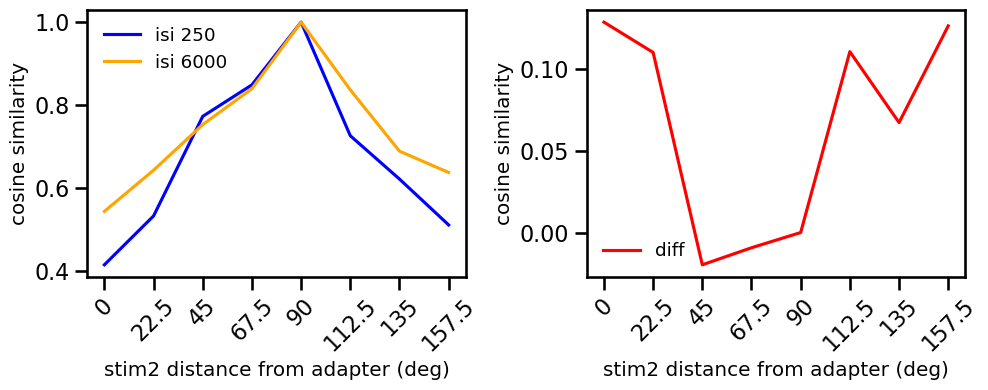

In [399]:
cos_sim_list = np.array(cos_sim_list)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
ax[0].plot(cos_sim_list[:nori], color='blue', label='isi 250')
ax[0].plot(cos_sim_list[nori:2*nori], color='orange', label='isi 6000')
ax[0].legend(frameon=False)

ax[1].plot(cos_sim_list[nori:2*nori] - cos_sim_list[:nori], color='red', label='diff')
ax[1].legend(frameon=False)

ax[0].set_xlabel('stim2 distance from adapter (deg)');
ax[0].set_ylabel('cosine similarity')
ax[0].set_xticks(range(nori), ['0', '22.5', '45', '67.5', '90', '112.5', '135', '157.5'], rotation=45)

ax[1].set_xlabel('stim2 distance from adapter (deg)');
ax[1].set_ylabel('cosine similarity')
ax[1].set_xticks(range(nori), ['0', '22.5', '45', '67.5', '90', '112.5', '135', '157.5'], rotation=45)

plt.tight_layout()
fig_dir = r'C:\Users\lan\Documents\repos\inter\results\decorrelation vs adp\ref=90 deg'.replace('\\', os.sep)
fig_name = 'decorr_vs_stim2_ori_' + current_area + '.pdf'
plt.savefig(os.path.join(fig_dir, fig_name), bbox_inches='tight')

### decorr vs stim2_distance from adapter

In [400]:
df_pop_vec = (df_decorr.groupby(['isi', 'stim2_dist', 'cell_id'])
                .dfof.mean().reset_index()
                .pivot_table(index=['isi', 'stim2_dist'], columns='cell_id', values='dfof')
                )
df_pop_vec

cell_id          200723_003_1  200723_003_10  200723_003_11  200723_003_12  \
isi  stim2_dist                                                              
250  0.0            -0.005401       0.007648       0.038531       0.011697   
     22.5           -0.023024      -0.000867      -0.023810       0.011754   
     45.0            0.024292       0.041707       0.053117       0.026700   
     67.5            0.056694       0.028808       0.026334       0.000991   
     90.0            0.119146       0.001094       0.017127       0.011128   
6000 0.0            -0.004944       0.091272      -0.022213       0.043560   
     22.5            0.061388       0.077287       0.013804       0.008354   
     45.0            0.080654       0.044041       0.084670       0.036834   
     67.5            0.092890       0.039130       0.061323       0.046505   
     90.0            0.064168       0.045880       0.047818       0.020374   

cell_id          200723_003_14  200723_003_15  200723_003_16  200723_003_18  \
isi  stim2_dist                                                               
250  0.0             -0.008486       0.046037       0.025867      -0.040432   
     22.5             0.022491       0.005579      -0.012443      -0.002798   
     45.0             0.011929       0.148864      -0.012710       0.029186   
     67.5             0.032174       0.126220       0.074722       0.059094   
     90.0             0.044916       0.150953      -0.004497       0.060277   
6000 0.0              0.068940       0.099363      -0.013935       0.028703   
     22.5             0.060510       0.104815       0.004678       0.070226   
     45.0             0.028009       0.145722       0.044324       0.071636   
     67.5             0.030116       0.120384       0.065932       0.075534   
     90.0             0.058745       0.143208       0.130853       0.042643   

cell_id          200723_003_19  200723_003_2  ...  230309_002_55  \
isi  stim2_dist                               ...                  
250  0.0              0.004073      0.031216  ...      -0.001467   
     22.5            -0.023526      0.033799  ...      -0.011129   
     45.0            -0.002912      0.026555  ...      -0.013328   
     67.5             0.064021      0.067418  ...       0.001677   
     90.0             0.081349      0.046425  ...      -0.004717   
6000 0.0              0.014449      0.108429  ...      -0.006541   
     22.5             0.037758      0.065268  ...      -0.000398   
     45.0             0.055914      0.019857  ...       0.007564   
     67.5             0.130829      0.072907  ...       0.012154   
     90.0             0.100264      0.014833  ...      -0.010514   

cell_id          230309_002_61  230309_002_79  230309_002_84  230309_002_86  \
isi  stim2_dist                                                               
250  0.0              0.012224      -0.008993       0.008518       0.017217   
     22.5             0.025407       0.001705      -0.005959       0.013086   
     45.0             0.024015       0.093804       0.003821       0.005552   
     67.5            -0.007980       0.049488      -0.000241       0.007012   
     90.0             0.004506       0.033759      -0.000547       0.036242   
6000 0.0              0.004988       0.027172       0.037115      -0.017311   
     22.5             0.011596       0.062406      -0.013651       0.007834   
     45.0             0.022510       0.079908       0.008351       0.022070   
     67.5             0.039286       0.046751       0.021350       0.012354   
     90.0             0.012296       0.068001       0.011025       0.037309   

cell_id          230309_002_89  230309_002_90  230309_003_17  230309_003_29  \
isi  stim2_dist                                                               
250  0.0              0.000927       0.000554       0.033249       0.067000   
     22.5             0.008694       0.003971      -0.003427       0.008000   
     45.0             0.023189  

In [401]:
nori = df_decorr.stim2_dist.nunique()
nisi_now = df_decorr.isi.nunique() # discarded isi 750

cos_sim_list = []
for iisi in range(nisi_now):
    
    if iisi == 0:
        iref = 4
    elif iisi == 1:
        iref = nori+4 # -1 (0-based indexing) and +1 (go to next isi) cancel out
    pop_vec_ref = df_pop_vec.iloc[iref, :].values # reference pop vec: 0 deg target resp
    
    for iori in range(nori):
        irow = iisi * nori + iori
        # print(iisi, iori, irow)
        pop_vec_ori = df_pop_vec.iloc[irow, :].values
        cos_sim = dot(pop_vec_ref, pop_vec_ori) / (norm(pop_vec_ref) * norm(pop_vec_ori))
        cos_sim_list.append(cos_sim)

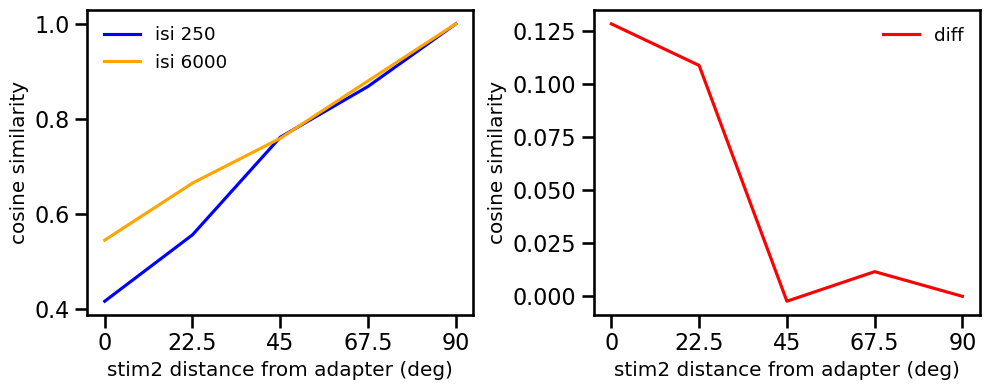

In [402]:
cos_sim_list = np.array(cos_sim_list)

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
ax[0].plot(cos_sim_list[:nori], color='blue', label='isi 250')
ax[0].plot(cos_sim_list[nori:2*nori], color='orange', label='isi 6000')
ax[0].legend(frameon=False)

ax[1].plot(cos_sim_list[nori:2*nori] - cos_sim_list[:nori], color='red', label='diff')
ax[1].legend(frameon=False)

ax[0].set_xlabel('stim2 distance from adapter (deg)');
ax[0].set_ylabel('cosine similarity')
ax[0].set_xticks(range(nori), ['0', '22.5', '45', '67.5', '90'])

ax[1].set_xlabel('stim2 distance from adapter (deg)');
ax[1].set_ylabel('cosine similarity')
ax[1].set_xticks(range(nori), ['0', '22.5', '45', '67.5', '90'])

plt.tight_layout()
fig_dir = r'C:\Users\lan\Documents\repos\inter\results\decorrelation vs adp\ref=90 deg'.replace('\\', os.sep)
fig_name = 'decorr_vs_stim2_dist_' + current_area + '.pdf'
# plt.savefig(os.path.join(fig_dir, fig_name), bbox_inches='tight')

# linear SVC decoder
using function sklearn.svm.LinearSVC:  

Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

## example

In [491]:
from sklearn.svm import LinearSVC # NOTE: current scikit-learn ver: 1.2.2, not newest, beware with doc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X, y = make_classification(n_features=4, random_state=0)
X.shape, y.shape, y[:5]

((100, 4), (100,), array([1, 1, 0, 0, 0]))

In [492]:
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

print(clf.named_steps['linearsvc'].coef_)
print(clf.named_steps['linearsvc'].intercept_)

print(clf.predict([[0, 0, 0, 0]]))

[[0.14144316 0.52678399 0.67978685 0.49307524]]
[0.16935939]
[1]


0.93


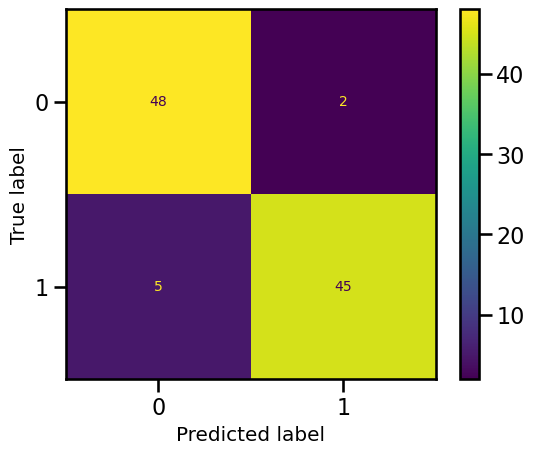

In [490]:
# get accuracy of clf
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X)
acc = accuracy_score(y, y_pred)
print(acc)

# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()

## decode 90 vs another ori

In [950]:
## prepare feature_matrix X and label y

df_svc = df_tidy[['dfof', 
                'cell_id', 'resp_id', 'isi', 'stim2_id', 'trial_id',
                'filter_cell_vis', 'filter_cell_stim', 'area', 
                'mouse', 'date', 'sess'
                ]]

df_svc['stim2_dist'] = df_svc.stim2_id.apply(lambda x: 22.5*(8-x) if x > 4 else 22.5*x) 
                          # stim2 distance from 0 deg, hard coded for 8 ori. TODO: modify if needed
df_svc['date_sess'] = df_svc.date + '_' + df_svc.sess

current_area = 'V1' # TODO: area = subplot
current_datesess = df_svc.date_sess.unique()[0] # TODO: date_sess = errorbar

df_svc = df_svc[(df_svc.isi != 750)
                & (df_svc.filter_cell_vis == True)
                # & (df_svc.filter_cell_stim == True) # nsample (nrep trial) too small, need to reduce nfeature (ncell)
                & (df_svc.resp_id == 'R2')
                & (df_svc.area == current_area)
                & (df_svc.date_sess == current_datesess)
                # & ((df_svc.stim2_dist == 0) | (df_svc.stim2_dist == 22.5))
                ]
# df_svc.tail()
df_svc.cell_id.nunique()

26

In [970]:
def df_to_train_test(df):
    # input: filtered df_svc
    # output: X_train, X_test, y_train, y_test (of the filter condition)
    
    label_arr = df.groupby('trial_id').stim2_dist.first().values
    label_arr = (label_arr == 90) # 1 = 90 deg, 0 = other ori
    
    feature_mat = (df
                   .pivot_table(index=['trial_id'], columns='cell_id', values='dfof')
                   .fillna(0).to_numpy())
    
    assert feature_mat.shape[0] == label_arr.shape[0]
    # print(label_arr.shape) # ntrial
    # print(feature_mat.shape) # ntrial x ncell
    
    X_train, X_test, y_train, y_test = train_test_split(
        feature_mat, label_arr, test_size=0.2, random_state=0, shuffle=True)
    # print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # ntrial x ncell
    
    return X_train, X_test, y_train, y_test

In [971]:
acc_train_250_arr = []
acc_train_6000_arr = []
acc_test_250_arr = []
acc_test_6000_arr = []

other_dist = sorted(df_svc.stim2_dist.unique())[:-1] # [0, 22, 45, 67]
for idist in other_dist: # exclude 90 deg
    df_pair = df_svc[((df_svc.stim2_dist == 90) | (df_svc.stim2_dist == idist))] # 90 deg vs another ori
    
    df_pair_250 = df_pair[df_pair.isi == 250]
    df_pair_6000 = df_pair[df_pair.isi == 6000]
    
    ## split train vs test for each isi
    X_train_250, X_test_250, y_train_250, y_test_250 = df_to_train_test(df_pair_250)
    X_train_6000, X_test_6000, y_train_6000, y_test_6000 = df_to_train_test(df_pair_6000)
    
    ## stack training data across isi - ntrial per isi mostly balanced (30% vs 35%)
    X_train = np.vstack((X_train_250, X_train_6000))
    y_train = np.hstack((y_train_250, y_train_6000))
    
    ## shuffle trials in the same way
    np.random.seed(42)
    np.random.shuffle(X_train) # shuffled along the first axis, aka trials
    np.random.shuffle(y_train)
    
    ## fit train (merge isi)
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42, tol=1e-5, max_iter=10000, 
                                  penalty='l2', dual=False, C=0.1))
    clf.fit(X_train, y_train)
    
    ## predict test (separate isi)
    # y_pred_train_250 = clf.predict(X_train_250)
    # y_pred_train_6000 = clf.predict(X_train_6000)
    # y_pred_test_250 = clf.predict(X_test_250)
    # y_pred_test_6000 = clf.predict(X_test_6000)
    
    acc_train_250 = clf.score(X_train_250, y_train_250)
    acc_train_6000 = clf.score(X_train_6000, y_train_6000)
    acc_test_250 = clf.score(X_test_250, y_test_250)
    acc_test_6000 = clf.score(X_test_6000, y_test_6000)
    
    acc_train_250_arr.append(acc_train_250)
    acc_train_6000_arr.append(acc_train_6000)
    acc_test_250_arr.append(acc_test_250)
    acc_test_6000_arr.append(acc_test_6000)
    
    # ## confusion matrix
    # cm_train = confusion_matrix(y_train, y_pred_train, labels=clf.classes_)
    # cm_test_250 = confusion_matrix(y_test_250, y_pred_250, labels=clf.classes_)
    # cm_test_6000 = confusion_matrix(y_test_6000, y_pred_6000, labels=clf.classes_)
    
    # break

# other_dist, acc_train_arr

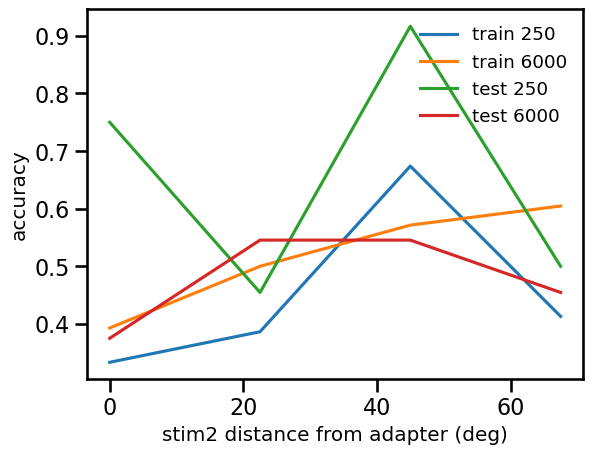

In [972]:
plt.plot(other_dist, acc_train_250_arr, label='train 250')
plt.plot(other_dist, acc_train_6000_arr, label='train 6000')
plt.plot(other_dist, acc_test_250_arr, label='test 250')
plt.plot(other_dist, acc_test_6000_arr, label='test 6000')
plt.legend(frameon=False);
plt.xlabel('stim2 distance from adapter (deg)');
plt.ylabel('accuracy');

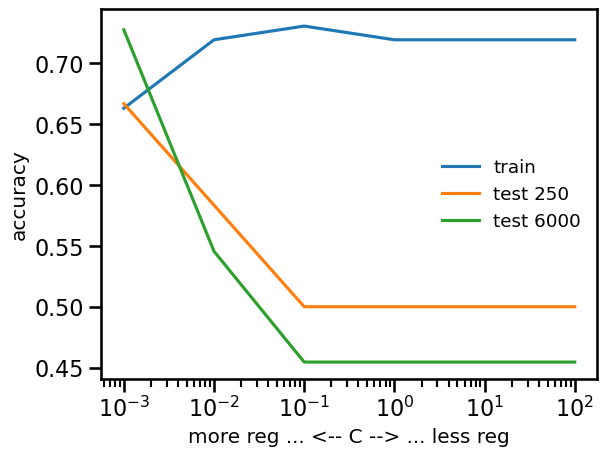

In [973]:
## find optimal reg param C
acc_train_arr = []
acc_test_250_arr = []
acc_test_6000_arr = []
C_arr = [0.001 * 10**i for i in range(6)]

for C_val in C_arr:
    clf = make_pipeline(StandardScaler(),
                        LinearSVC(random_state=42, tol=1e-5, max_iter=10000, 
                                  penalty='l2', dual=False, C=C_val))
    clf.fit(X_train, y_train)
    
    acc_train = clf.score(X_train, y_train)
    acc_test_250 = clf.score(X_test_250, y_test_250)
    acc_test_6000 = clf.score(X_test_6000, y_test_6000)
    
    acc_train_arr.append(acc_train)
    acc_test_250_arr.append(acc_test_250)
    acc_test_6000_arr.append(acc_test_6000)
    
    
plt.plot(C_arr, acc_train_arr, label='train')
plt.plot(C_arr, acc_test_250_arr, label='test 250')
plt.plot(C_arr, acc_test_6000_arr, label='test 6000')

# set x axis to log scale
plt.xscale('log')

plt.legend(frameon=False);
plt.xlabel('more reg ... <-- C --> ... less reg');
plt.ylabel('accuracy');

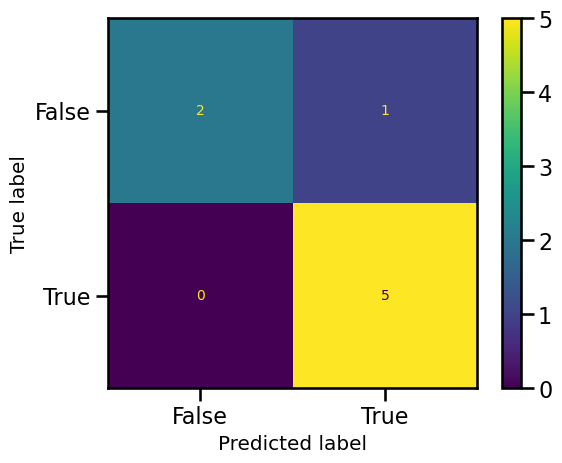

In [698]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_6000,
                              display_labels=clf.classes_)
disp.plot()
plt.show()